In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt, ticker as mticker

In [2]:
# Define your data for EF at 1%
dekois_sf_data_ef1 = pd.read_csv("./DEKOIS_RESULTS/results_dockm8_EF_1%.csv")
dekois_sf_data_ef1["consensus"].fillna("None", inplace=True)
dekois_sf_data_ef1["Average"] = dekois_sf_data_ef1.iloc[:, 4:].mean(axis=1)
dekois_sf_data_ef1.sort_values("Average", ascending=False)
dekois_top_1_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.01), "Average")
dekois_top_01_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.001), "Average")
dekois_top_001_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.0001), "Average")

In [3]:
expected_consensus_value = list(set(dekois_sf_data_ef1["consensus"]))
# Count occurrences in 'consensus' for both subsets
dekois_consensus_counts_1 = (
    dekois_top_1_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)
dekois_consensus_counts_01 = (
    dekois_top_01_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)
dekois_consensus_counts_001 = (
    dekois_top_001_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)

# Convert counts to DataFrame for plotting
dekois_consensus_df_1 = dekois_consensus_counts_1.reset_index()
dekois_consensus_df_1.columns = ["Consensus", "Count"]
dekois_consensus_df_01 = dekois_consensus_counts_01.reset_index()
dekois_consensus_df_01.columns = ["Consensus", "Count"]
dekois_consensus_df_001 = dekois_consensus_counts_001.reset_index()
dekois_consensus_df_001.columns = ["Consensus", "Count"]

# Concatenate the DataFrames
combined_dekois_consensus_df = pd.concat(
    [
        dekois_consensus_df_001.assign(Percentile="Top 0.01%"),
        dekois_consensus_df_01.assign(Percentile="Top 0.1%"),
        dekois_consensus_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_dekois_consensus_df["PercentileRank"] = combined_dekois_consensus_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_dekois_combined_consensus_df = combined_dekois_consensus_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed_consensus
sorted_dekois_combined_consensus_df.drop(columns=["PercentileRank"], inplace=True)

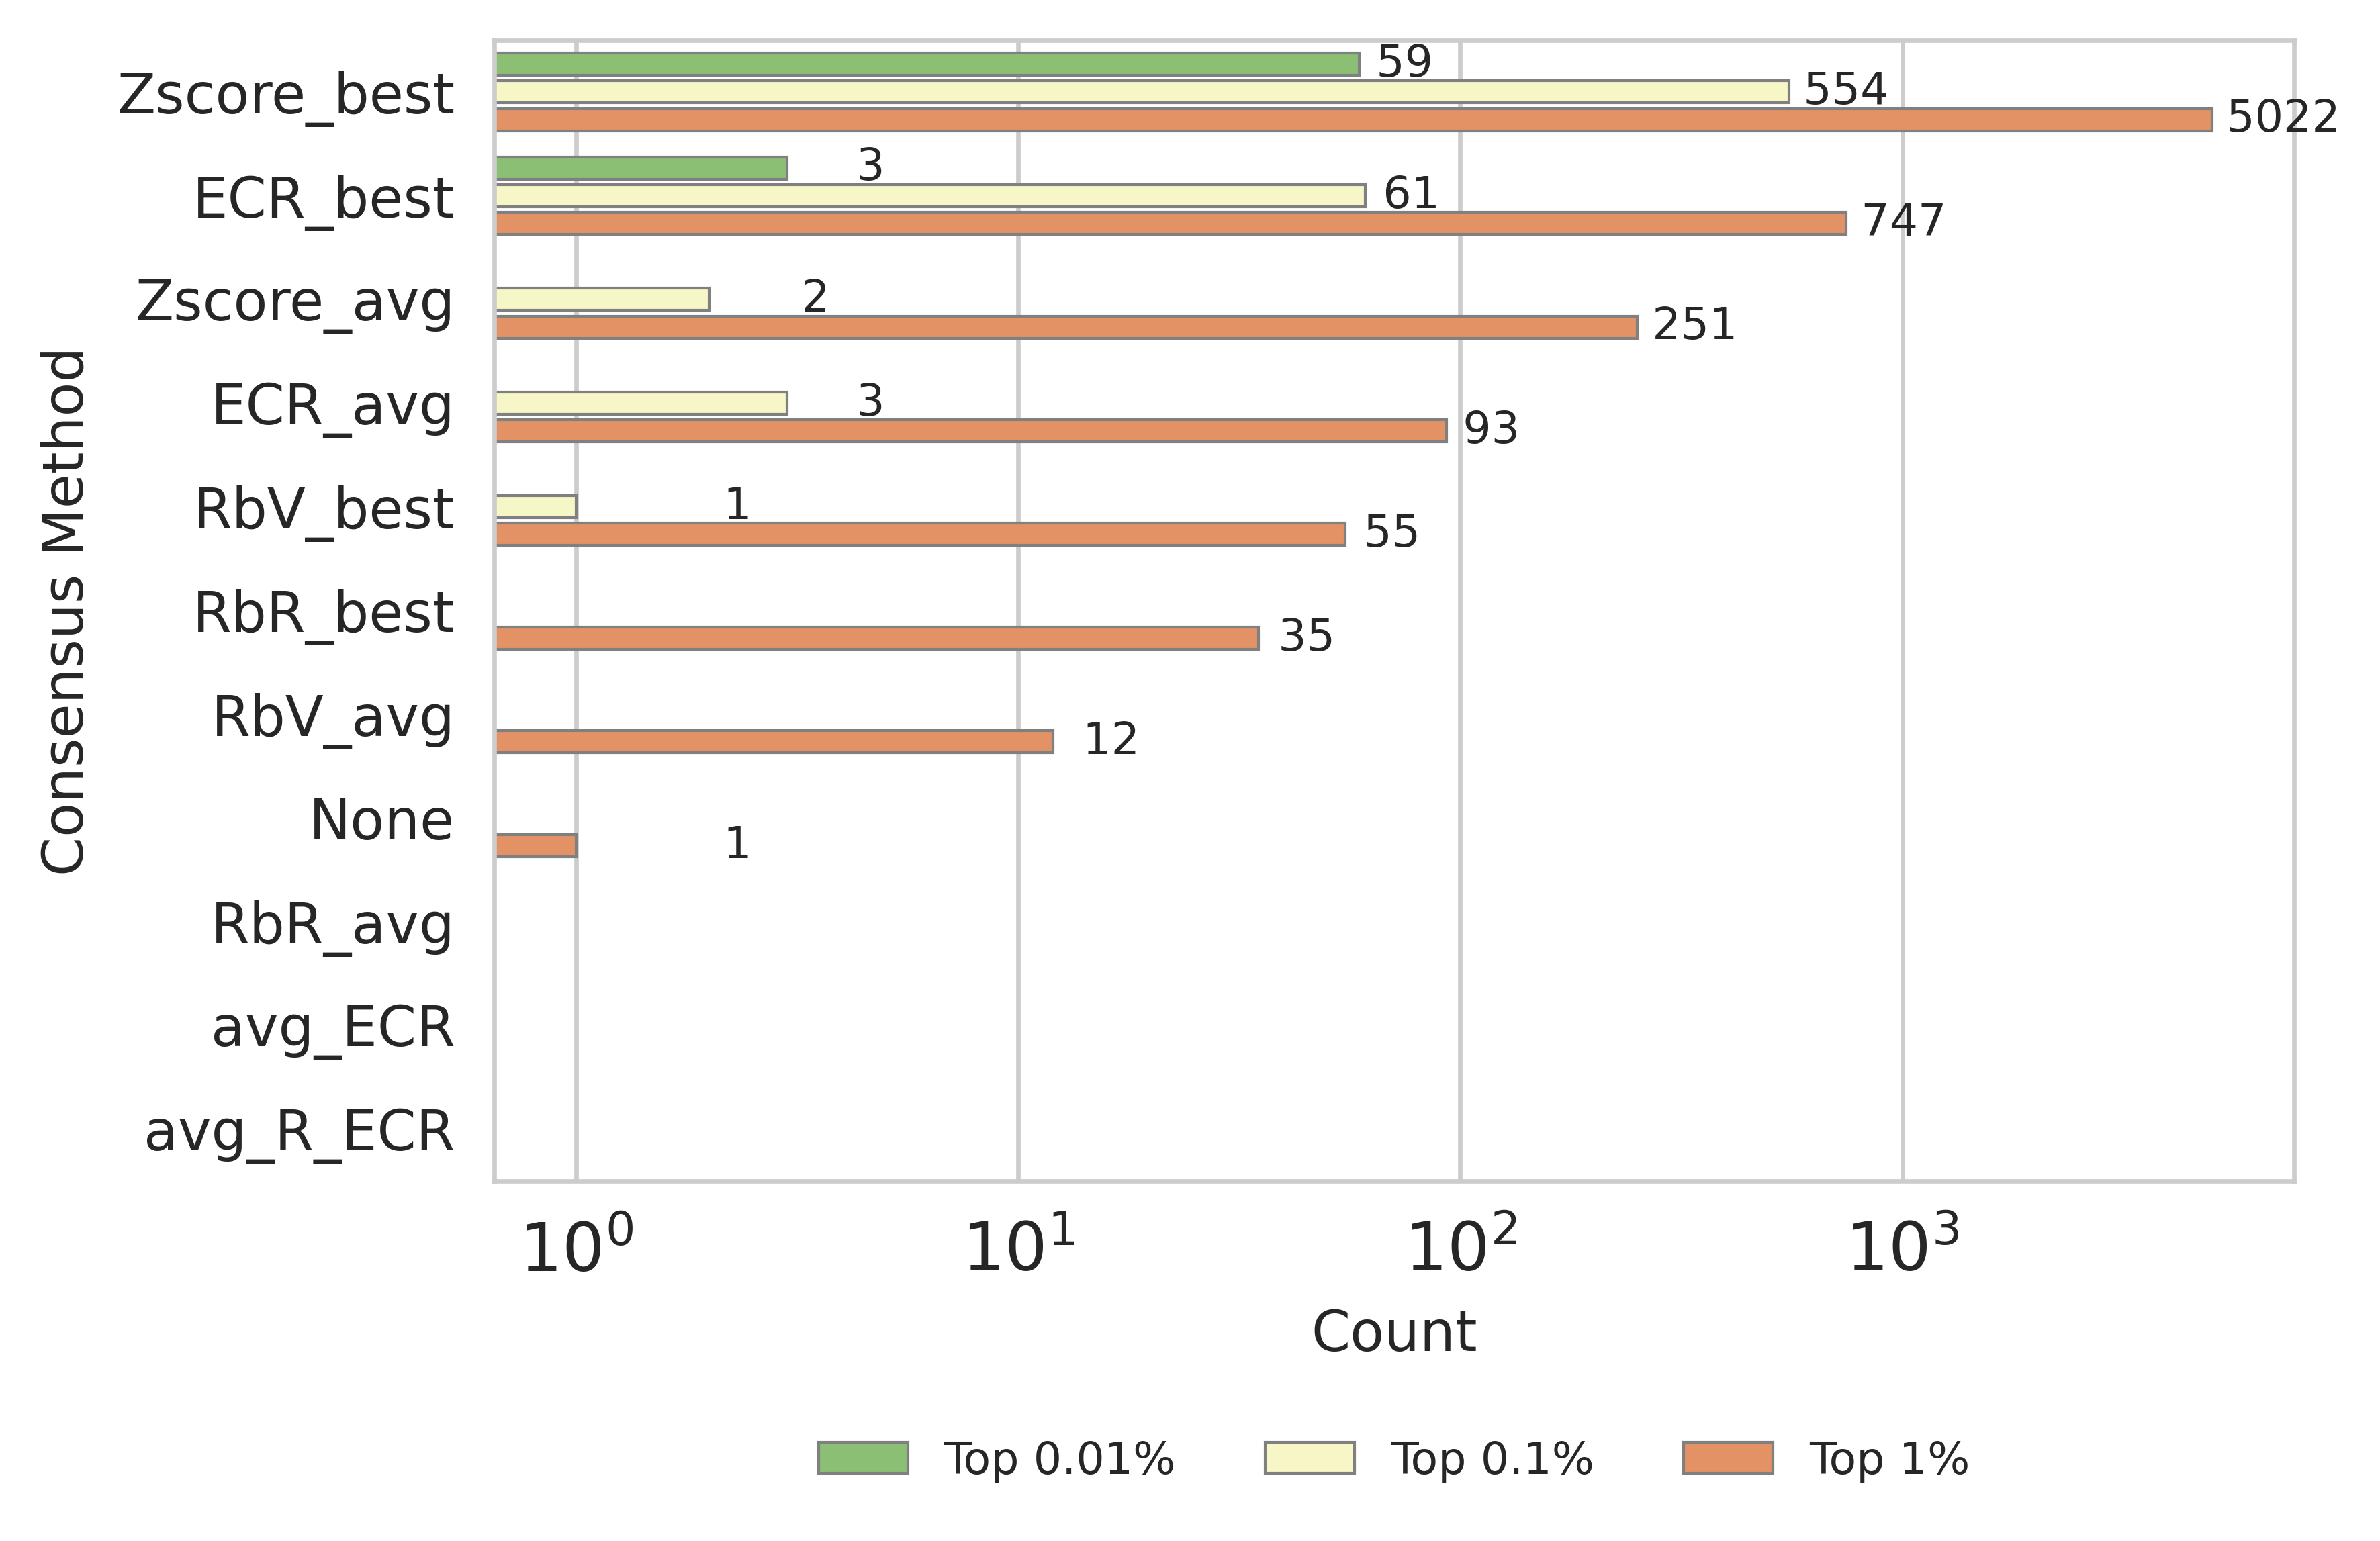

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Consensus",
    hue="Percentile",
    order=sorted_dekois_combined_consensus_df["Consensus"].unique(),
    data=combined_dekois_consensus_df,
    palette="RdYlGn_r",  # Reverse the palette
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Consensus Method")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [5]:
expected_clustering_value = list(set(dekois_sf_data_ef1["clustering"]))
# Count occurrences in 'consensus' for both subsets
dekois_clustering_counts_1 = (
    dekois_top_1_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
dekois_clustering_counts_01 = (
    dekois_top_01_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
dekois_clustering_counts_001 = (
    dekois_top_001_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)

# Convert counts to DataFrame for plotting
dekois_clustering_df_1 = dekois_clustering_counts_1.reset_index()
dekois_clustering_df_1.columns = ["Clustering", "Count"]
dekois_clustering_df_01 = dekois_clustering_counts_01.reset_index()
dekois_clustering_df_01.columns = ["Clustering", "Count"]
dekois_clustering_df_001 = dekois_clustering_counts_001.reset_index()
dekois_clustering_df_001.columns = ["Clustering", "Count"]

combined_dekois_clustering_df = pd.concat(
    [
        dekois_clustering_df_001.assign(Percentile="Top 0.01%"),
        dekois_clustering_df_01.assign(Percentile="Top 0.1%"),
        dekois_clustering_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_dekois_clustering_df["PercentileRank"] = combined_dekois_clustering_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_dekois_combined_clustering_df = combined_dekois_clustering_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed
sorted_dekois_combined_clustering_df.drop(columns=["PercentileRank"], inplace=True)

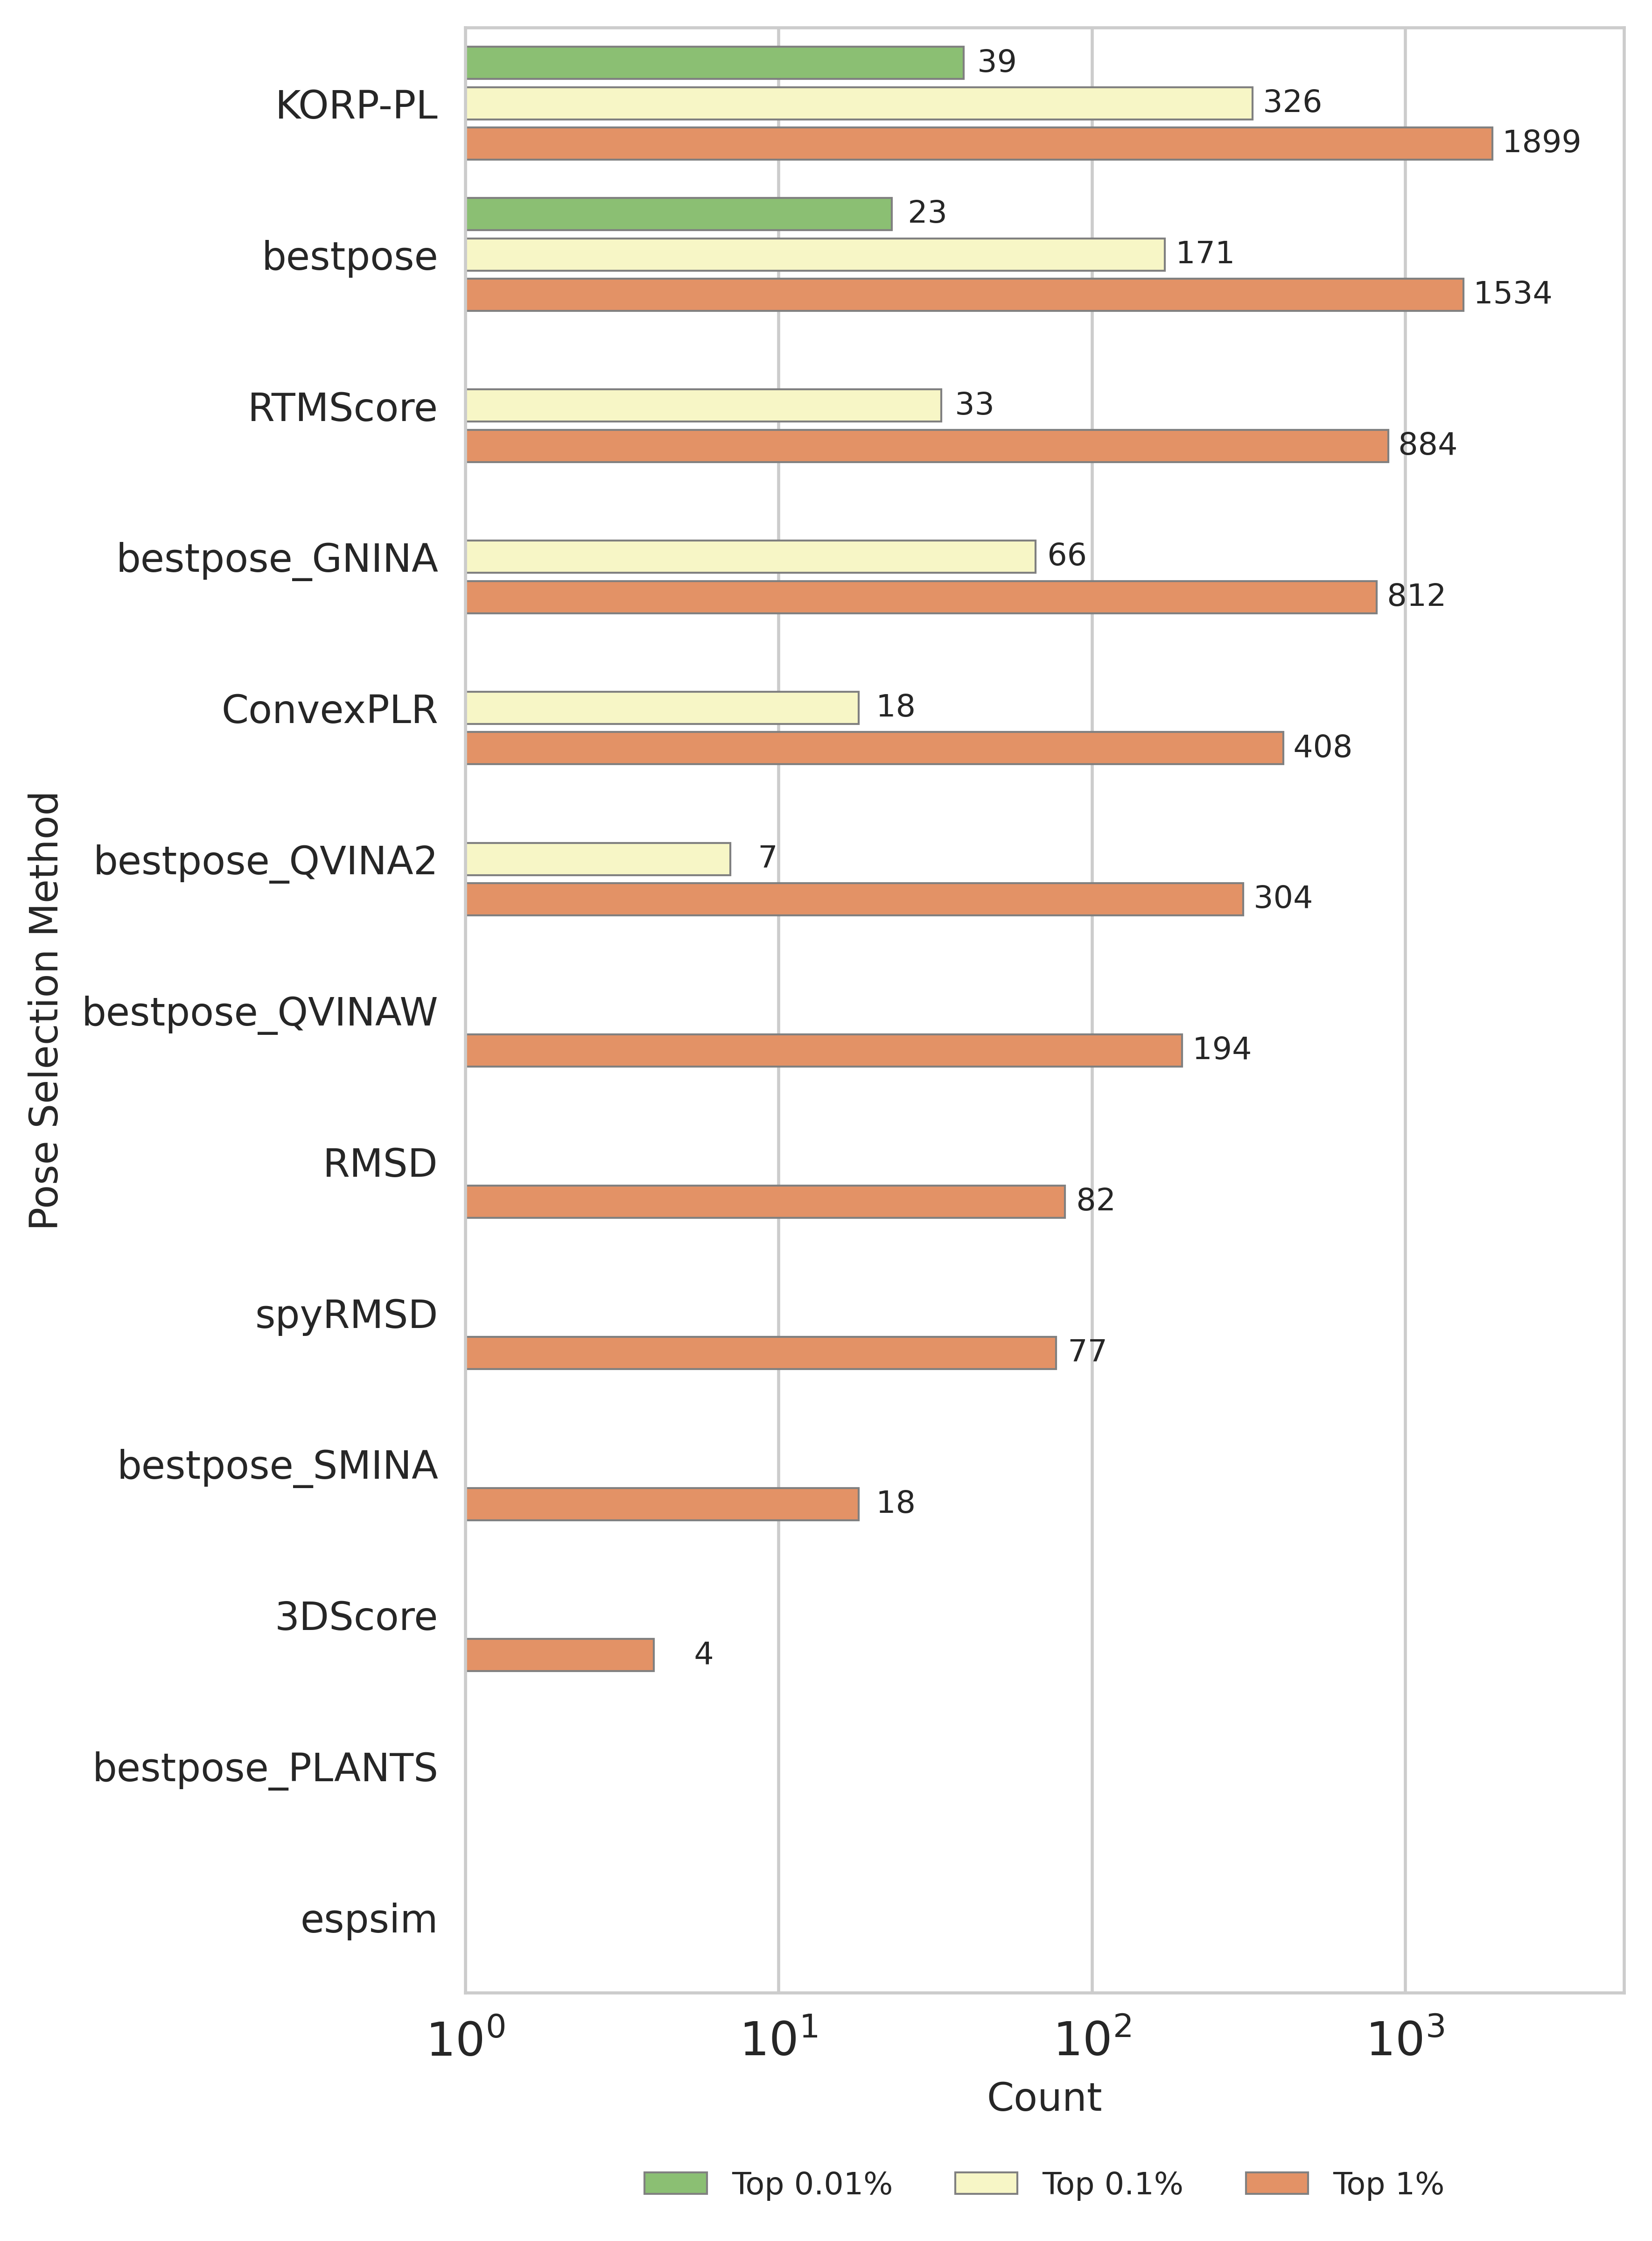

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Clustering",
    hue="Percentile",
    data=combined_dekois_clustering_df,
    order=sorted_dekois_combined_clustering_df["Clustering"].unique(),
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Pose Selection Method")
plt.xticks(fontsize=12)
plt.xlim(1, 5000)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [7]:
# Function to split the 'scoring' column and count occurrences
def count_scoring_functions(df):
    scoring_functions = df["scoring"].str.split("_", expand=True).stack()
    return scoring_functions.value_counts(dropna=False).fillna(0)


dekois_scoring_counts_1 = count_scoring_functions(dekois_top_1_percent)
dekois_scoring_counts_01 = count_scoring_functions(dekois_top_01_percent)
dekois_scoring_counts_001 = count_scoring_functions(dekois_top_001_percent)

# Convert counts to DataFrame for plotting
dekois_scoring_df_1 = dekois_scoring_counts_1.reset_index()
dekois_scoring_df_1.columns = ["Scoring Function", "Count"]
dekois_scoring_df_01 = dekois_scoring_counts_01.reset_index()
dekois_scoring_df_01.columns = ["Scoring Function", "Count"]
dekois_scoring_df_001 = dekois_scoring_counts_001.reset_index()
dekois_scoring_df_001.columns = ["Scoring Function", "Count"]

# Combine for comparison in one plot
dekois_scoring_df_1["Percentile"] = "Top 1%"
dekois_scoring_df_01["Percentile"] = "Top 0.1%"
dekois_scoring_df_001["Percentile"] = "Top 0.01%"
combined_dekois_scoring_df = pd.concat([dekois_scoring_df_001, dekois_scoring_df_01, dekois_scoring_df_1]).reset_index(
    drop=True
)

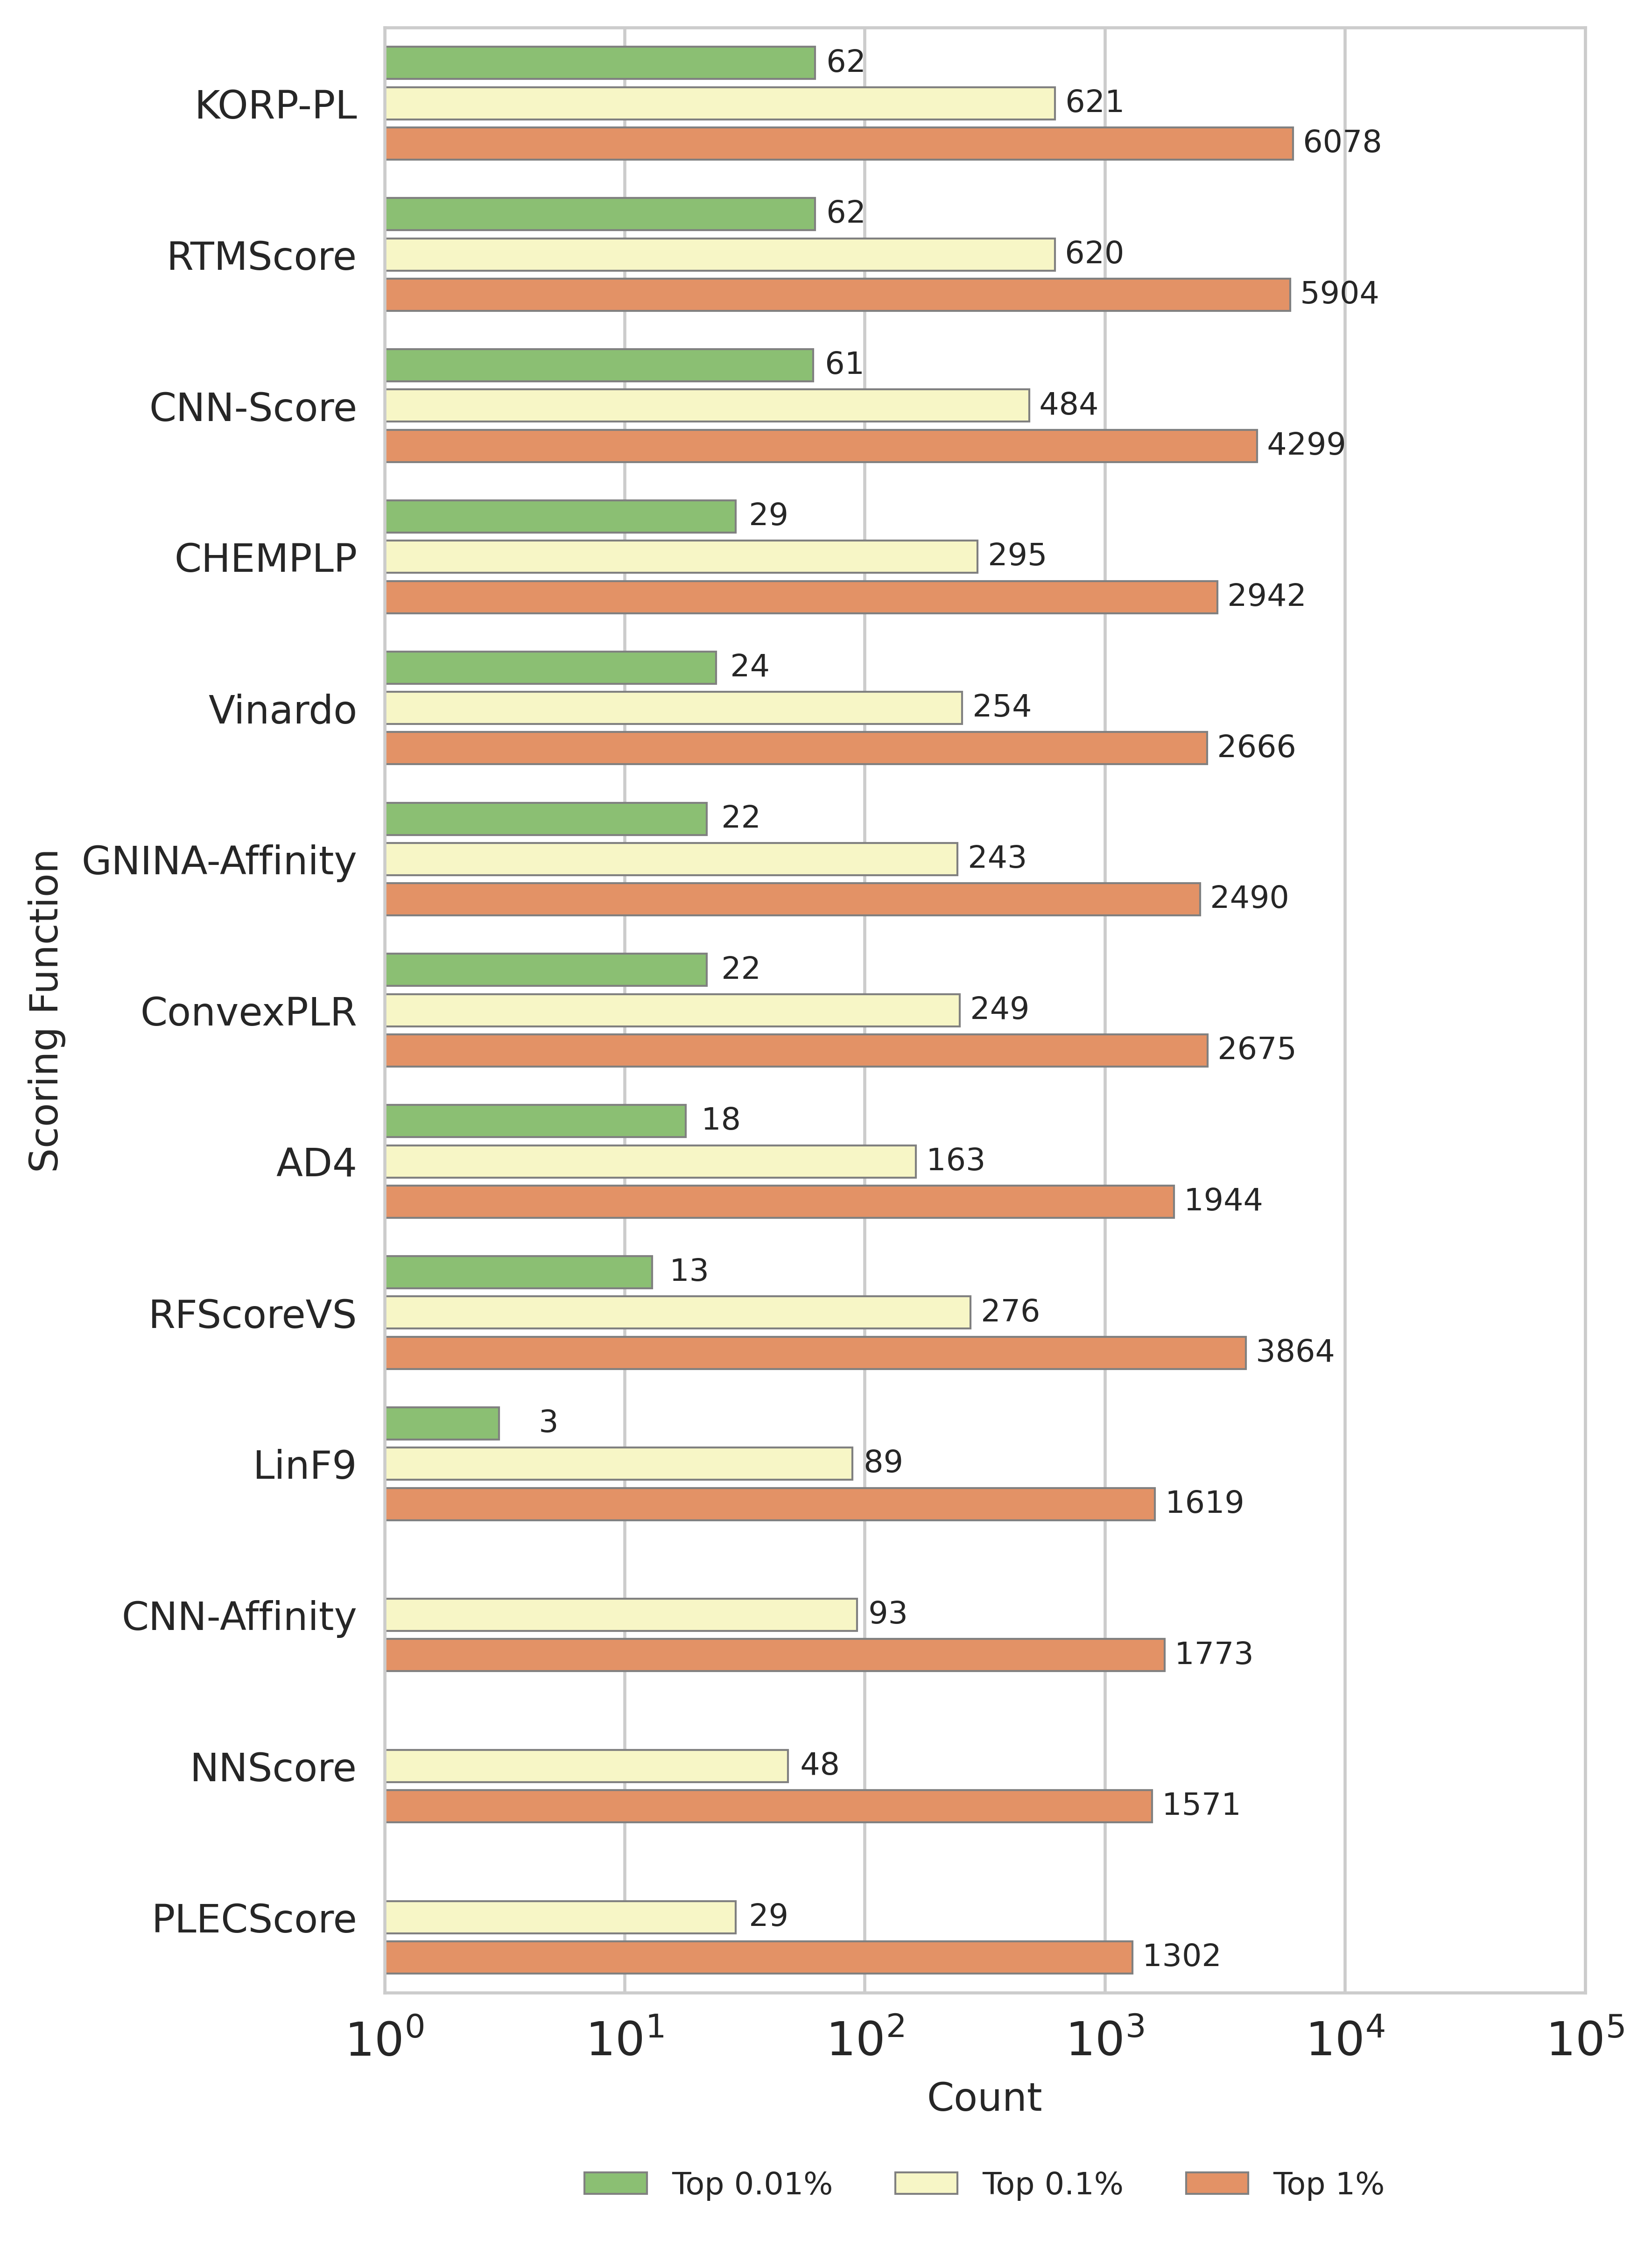

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Scoring Function",
    hue="Percentile",
    data=combined_dekois_scoring_df,
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Scoring Function")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 100000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [9]:
def get_number_of_scoring_functions(df):
    numbers = df["scoring"].apply(lambda x: str(x.count("_") + 1) if "_" in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)


# Count occurrences in both subsets
dekois_scoringnumber_counts_1 = get_number_of_scoring_functions(dekois_top_1_percent)
dekois_scoringnumber_counts_01 = get_number_of_scoring_functions(dekois_top_01_percent)
dekois_scoringnumber_counts_001 = get_number_of_scoring_functions(dekois_top_001_percent)

# Convert counts to DataFrame for plotting
dekois_scoringnumber_df_1 = dekois_scoringnumber_counts_1.reset_index()
dekois_scoringnumber_df_1.columns = ["Amount of Scoring Functions", "Count"]
dekois_scoringnumber_df_01 = dekois_scoringnumber_counts_01.reset_index()
dekois_scoringnumber_df_01.columns = ["Amount of Scoring Functions", "Count"]
dekois_scoringnumber_df_001 = dekois_scoringnumber_counts_001.reset_index()
dekois_scoringnumber_df_001.columns = ["Amount of Scoring Functions", "Count"]

# Combine for comparison in one plot
dekois_scoringnumber_df_1["Percentile"] = "Top 1%"
dekois_scoringnumber_df_01["Percentile"] = "Top 0.1%"
dekois_scoringnumber_df_001["Percentile"] = "Top 0.01%"
combined_dekois_scoringnumber_df = pd.concat(
    [dekois_scoringnumber_df_001, dekois_scoringnumber_df_01, dekois_scoringnumber_df_1]
).reset_index(drop=True)

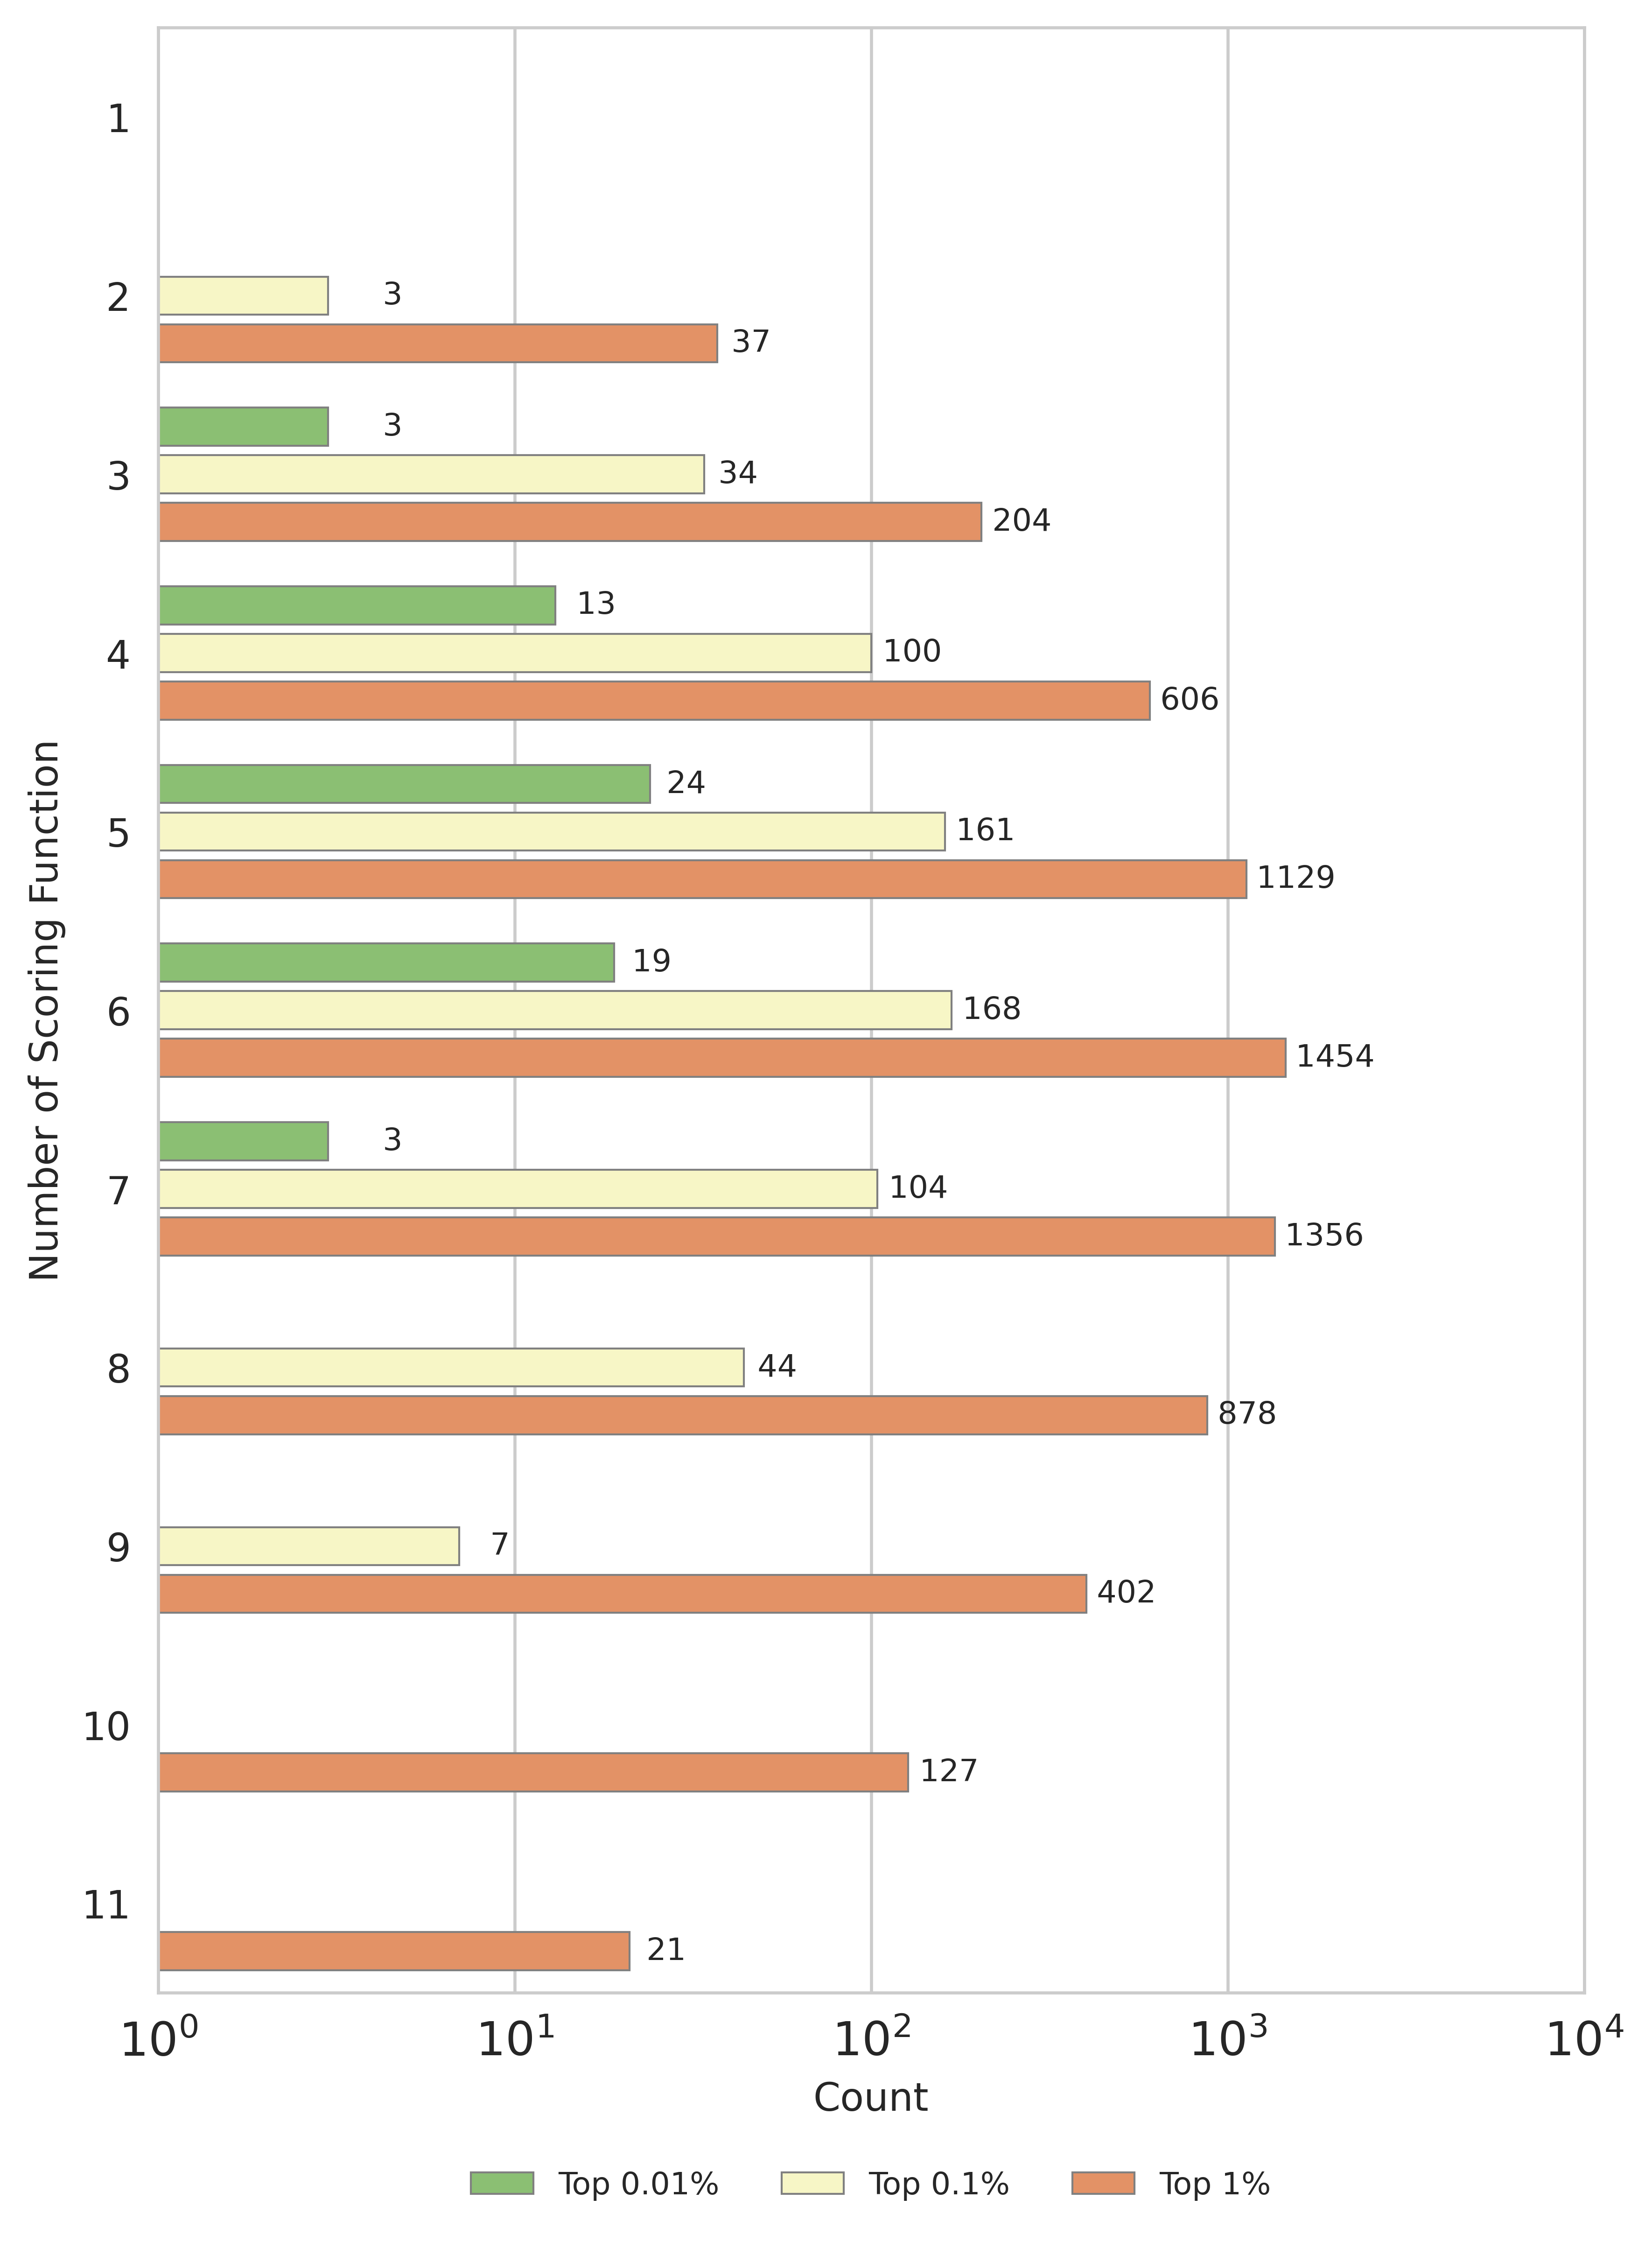

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Amount of Scoring Functions",
    hue="Percentile",
    data=combined_dekois_scoringnumber_df,
    order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"],
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Number of Scoring Function")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 10000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [11]:
# Define your data for EF at 1%
dude_sf_data_ef1 = pd.read_csv("./DUD-E_RESULTS/results_dockm8_EF_1%.csv")
dude_sf_data_ef1["consensus"].fillna("None", inplace=True)
dude_sf_data_ef1["Average"] = dude_sf_data_ef1.iloc[:, 4:].mean(axis=1)
dude_sf_data_ef1.sort_values("Average", ascending=False)
dude_top_1_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.01), "Average")
dude_top_01_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.001), "Average")
dude_top_001_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.0001), "Average")

In [12]:
expected_consensus_value = list(set(dude_sf_data_ef1["consensus"]))
# Count occurrences in 'consensus' for both subsets
dude_consensus_counts_1 = (
    dude_top_1_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)
dude_consensus_counts_01 = (
    dude_top_01_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)
dude_consensus_counts_001 = (
    dude_top_001_percent["consensus"]
    .value_counts()
    .reindex(expected_consensus_value, fill_value=0)
    .sort_values(ascending=False)
)

# Convert counts to DataFrame for plotting
dude_consensus_df_1 = dude_consensus_counts_1.reset_index()
dude_consensus_df_1.columns = ["Consensus", "Count"]
dude_consensus_df_01 = dude_consensus_counts_01.reset_index()
dude_consensus_df_01.columns = ["Consensus", "Count"]
dude_consensus_df_001 = dude_consensus_counts_001.reset_index()
dude_consensus_df_001.columns = ["Consensus", "Count"]

combined_dude_consensus_df = pd.concat(
    [
        dude_consensus_df_001.assign(Percentile="Top 0.01%"),
        dude_consensus_df_01.assign(Percentile="Top 0.1%"),
        dude_consensus_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_dude_consensus_df["PercentileRank"] = combined_dude_consensus_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_dude_combined_consensus_df = combined_dude_consensus_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed
sorted_dude_combined_consensus_df.drop(columns=["PercentileRank"], inplace=True)

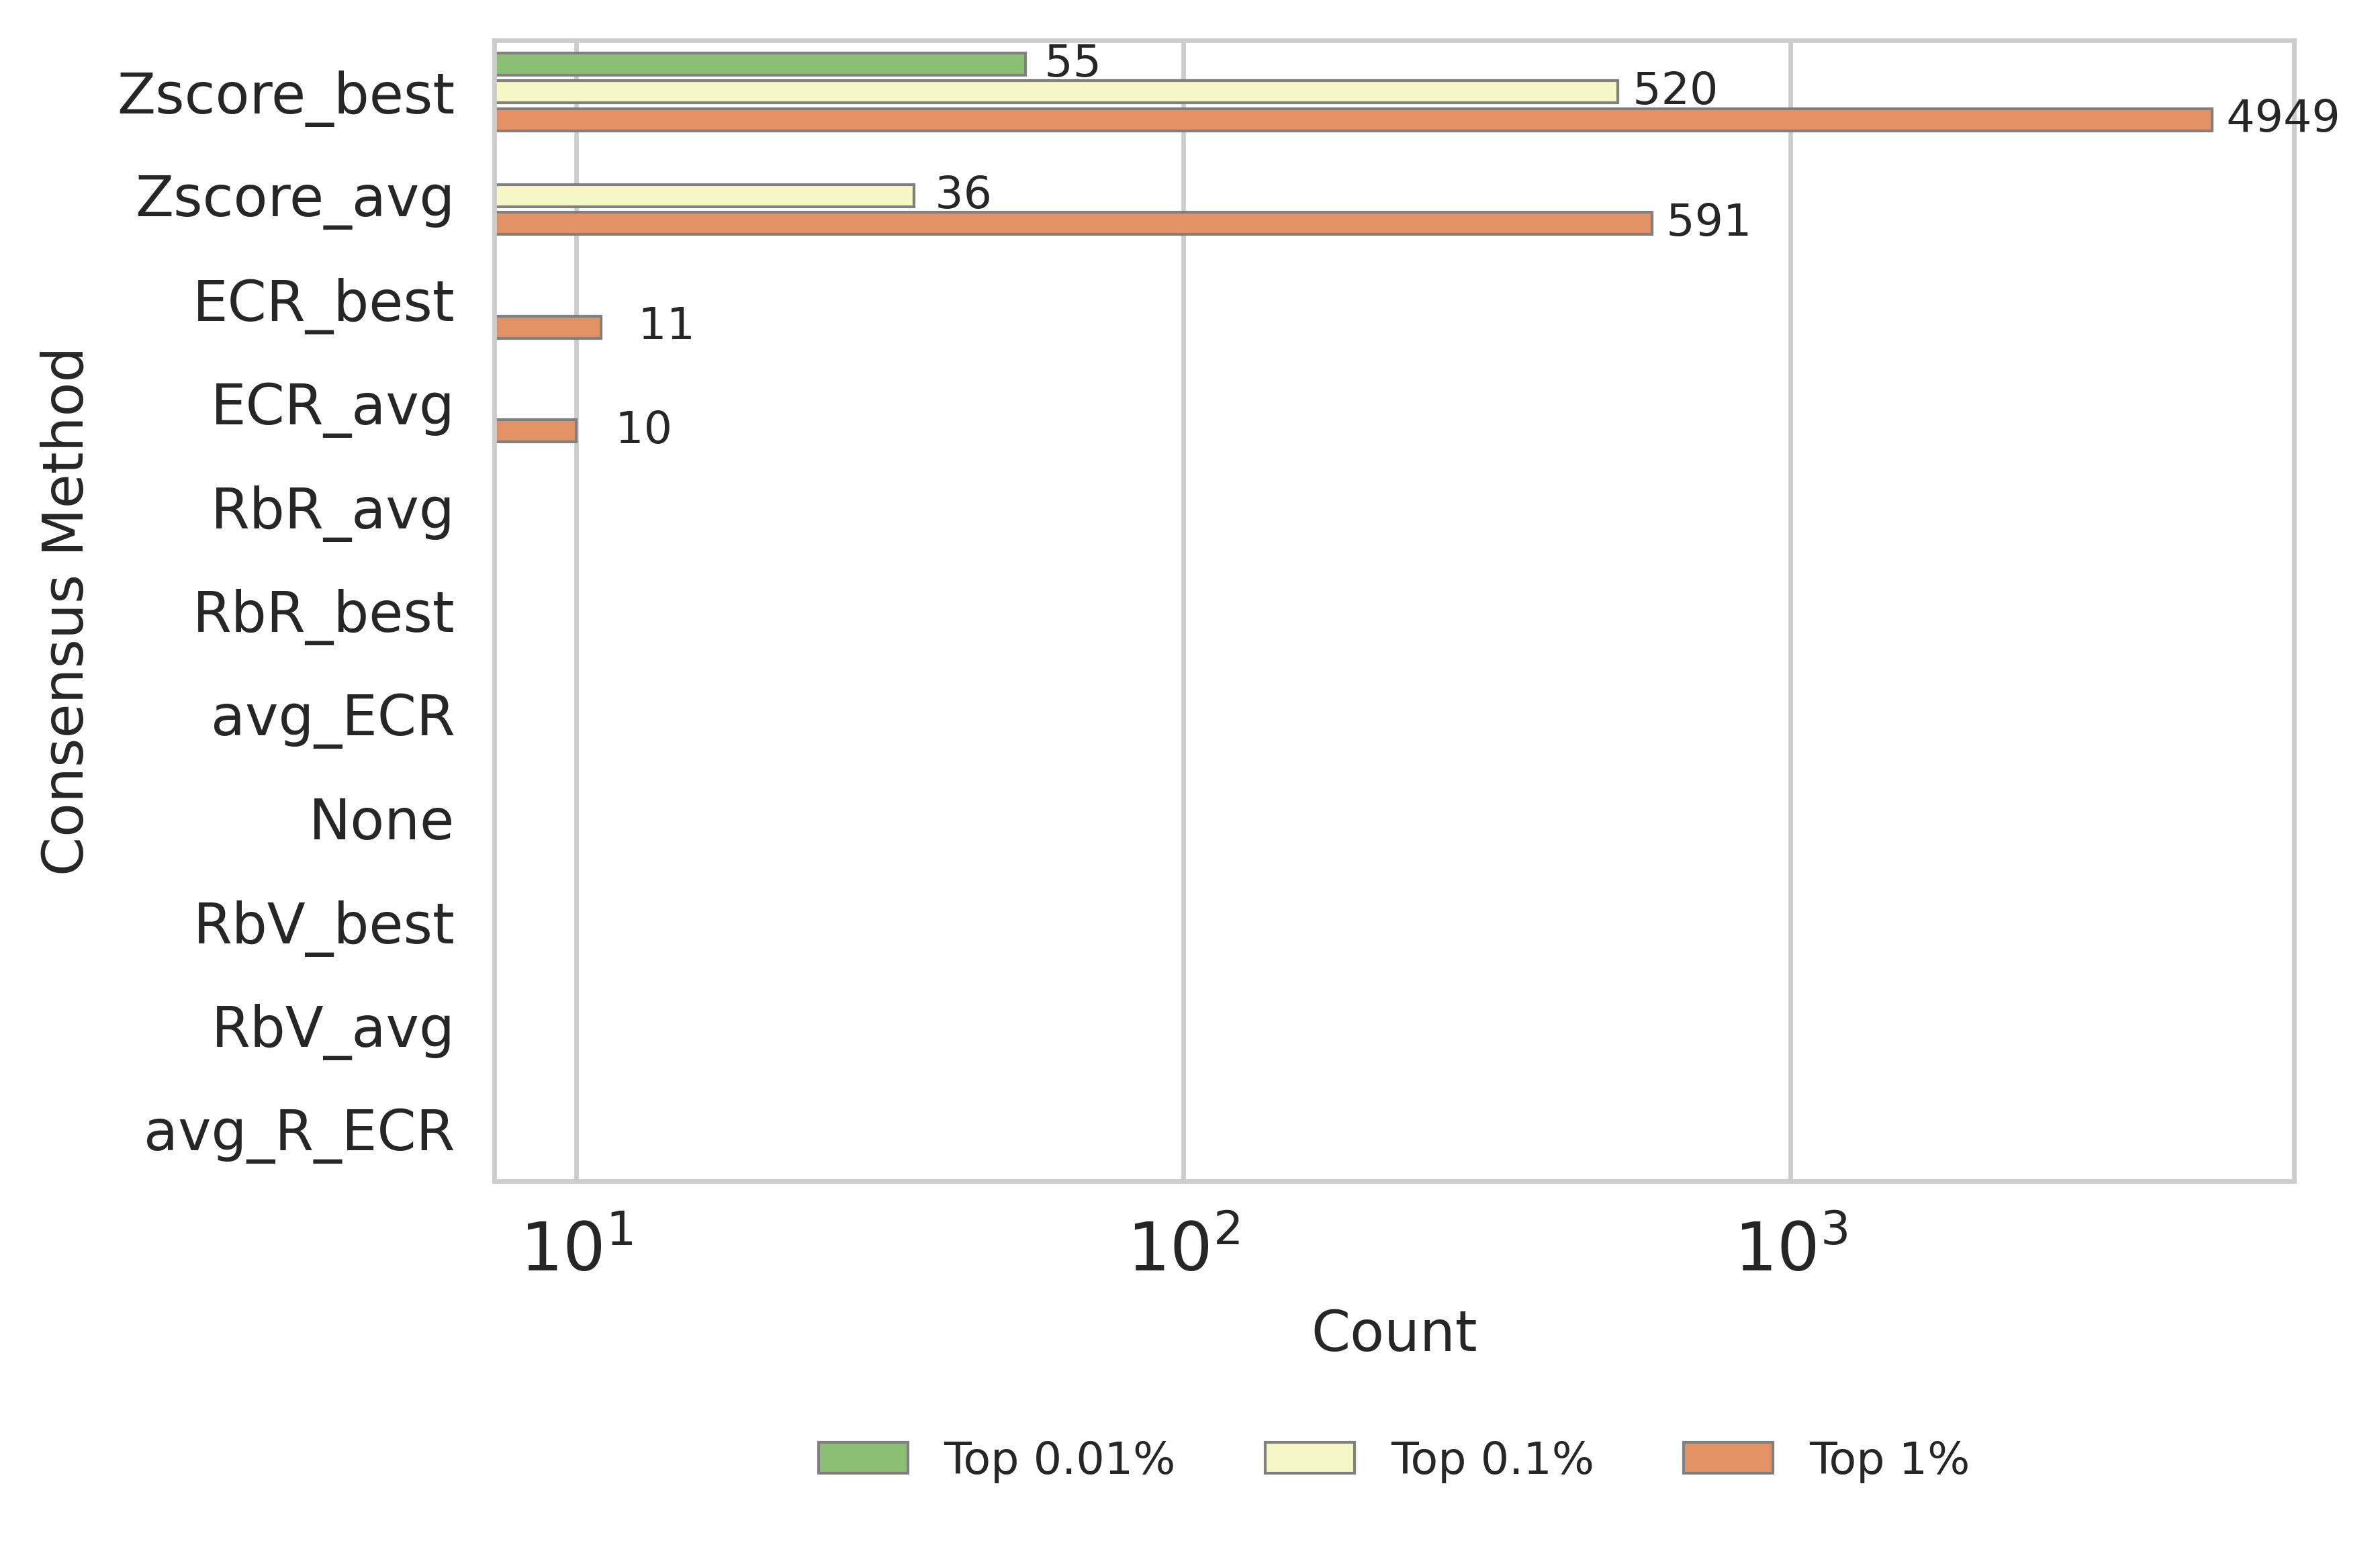

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Consensus",
    hue="Percentile",
    data=combined_dude_consensus_df,
    order=sorted_dude_combined_consensus_df["Consensus"].unique(),
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Consensus Method")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [14]:
expected_clustering_value = list(set(dude_sf_data_ef1["clustering"]))
# Count occurrences in 'consensus' for both subsets
dude_clustering_counts_1 = (
    dude_top_1_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
dude_clustering_counts_01 = (
    dude_top_01_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
dude_clustering_counts_001 = (
    dude_top_001_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)

# Convert counts to DataFrame for plotting
dude_clustering_df_1 = dude_clustering_counts_1.reset_index()
dude_clustering_df_1.columns = ["Clustering", "Count"]
dude_clustering_df_01 = dude_clustering_counts_01.reset_index()
dude_clustering_df_01.columns = ["Clustering", "Count"]
dude_clustering_df_001 = dude_clustering_counts_001.reset_index()
dude_clustering_df_001.columns = ["Clustering", "Count"]

combined_dude_clustering_df = pd.concat(
    [
        dude_clustering_df_001.assign(Percentile="Top 0.01%"),
        dude_clustering_df_01.assign(Percentile="Top 0.1%"),
        dude_clustering_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_dude_clustering_df["PercentileRank"] = combined_dude_clustering_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_dude_combined_clustering_df = combined_dude_clustering_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed
sorted_dude_combined_clustering_df.drop(columns=["PercentileRank"], inplace=True)

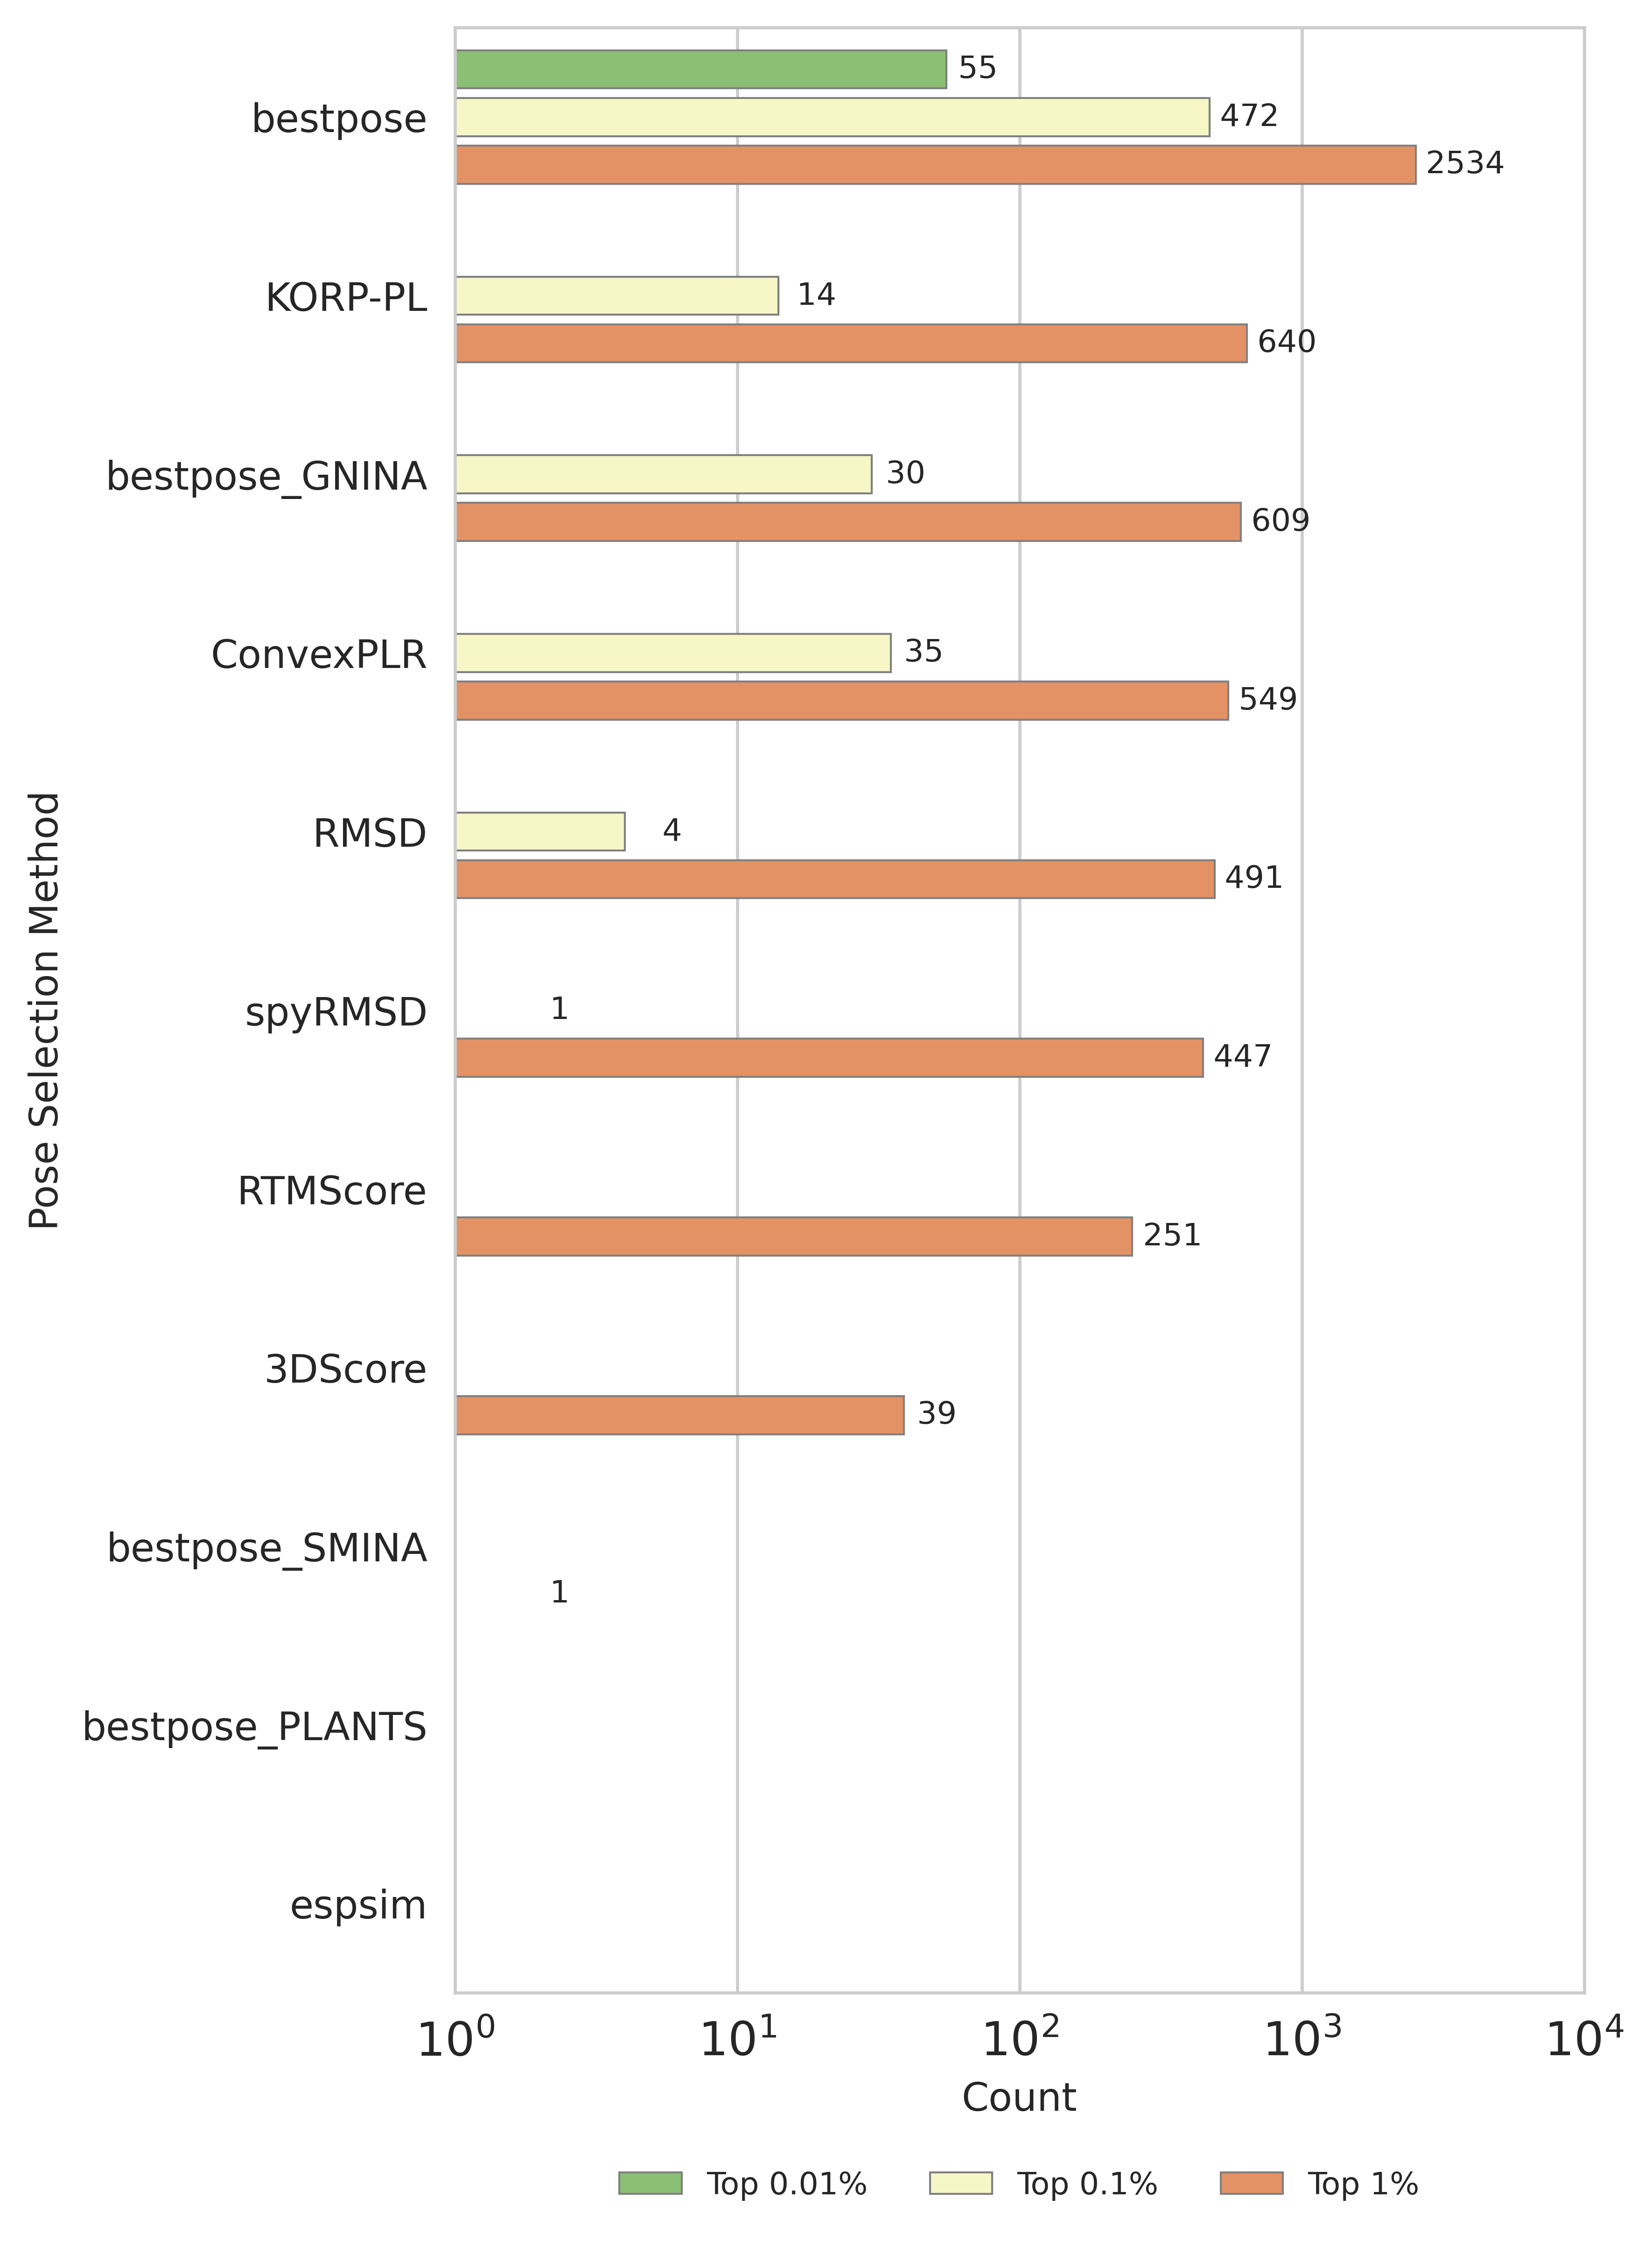

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Clustering",
    hue="Percentile",
    data=combined_dude_clustering_df,
    order=sorted_dude_combined_clustering_df["Clustering"].unique(),
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")
plt.xlim(1, 10000)

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Pose Selection Method")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [16]:
# Function to split the 'scoring' column and count occurrences
def count_sf_functions(df):
    dude_scoring_functions = df["scoring"].str.split("_", expand=True).stack()
    return dude_scoring_functions.value_counts(dropna=False).fillna(0)


# Count occurrences in both subsets
dude_scoring_counts_1 = count_sf_functions(dude_top_1_percent)
dude_scoring_counts_01 = count_sf_functions(dude_top_01_percent)
dude_scoring_counts_001 = count_sf_functions(dude_top_001_percent)

# Convert counts to DataFrame for plotting
dude_scoring_df_1 = dude_scoring_counts_1.reset_index()
dude_scoring_df_1.columns = ["Scoring Function", "Count"]
dude_scoring_df_01 = dude_scoring_counts_01.reset_index()
dude_scoring_df_01.columns = ["Scoring Function", "Count"]
dude_scoring_df_001 = dude_scoring_counts_001.reset_index()
dude_scoring_df_001.columns = ["Scoring Function", "Count"]

# Combine for comparison in one plot
dude_scoring_df_1["Percentile"] = "Top 1%"
dude_scoring_df_01["Percentile"] = "Top 0.1%"
dude_scoring_df_001["Percentile"] = "Top 0.01%"
combined_dude_scoring_df = pd.concat([dude_scoring_df_001, dude_scoring_df_01, dude_scoring_df_1]).reset_index(
    drop=True
)

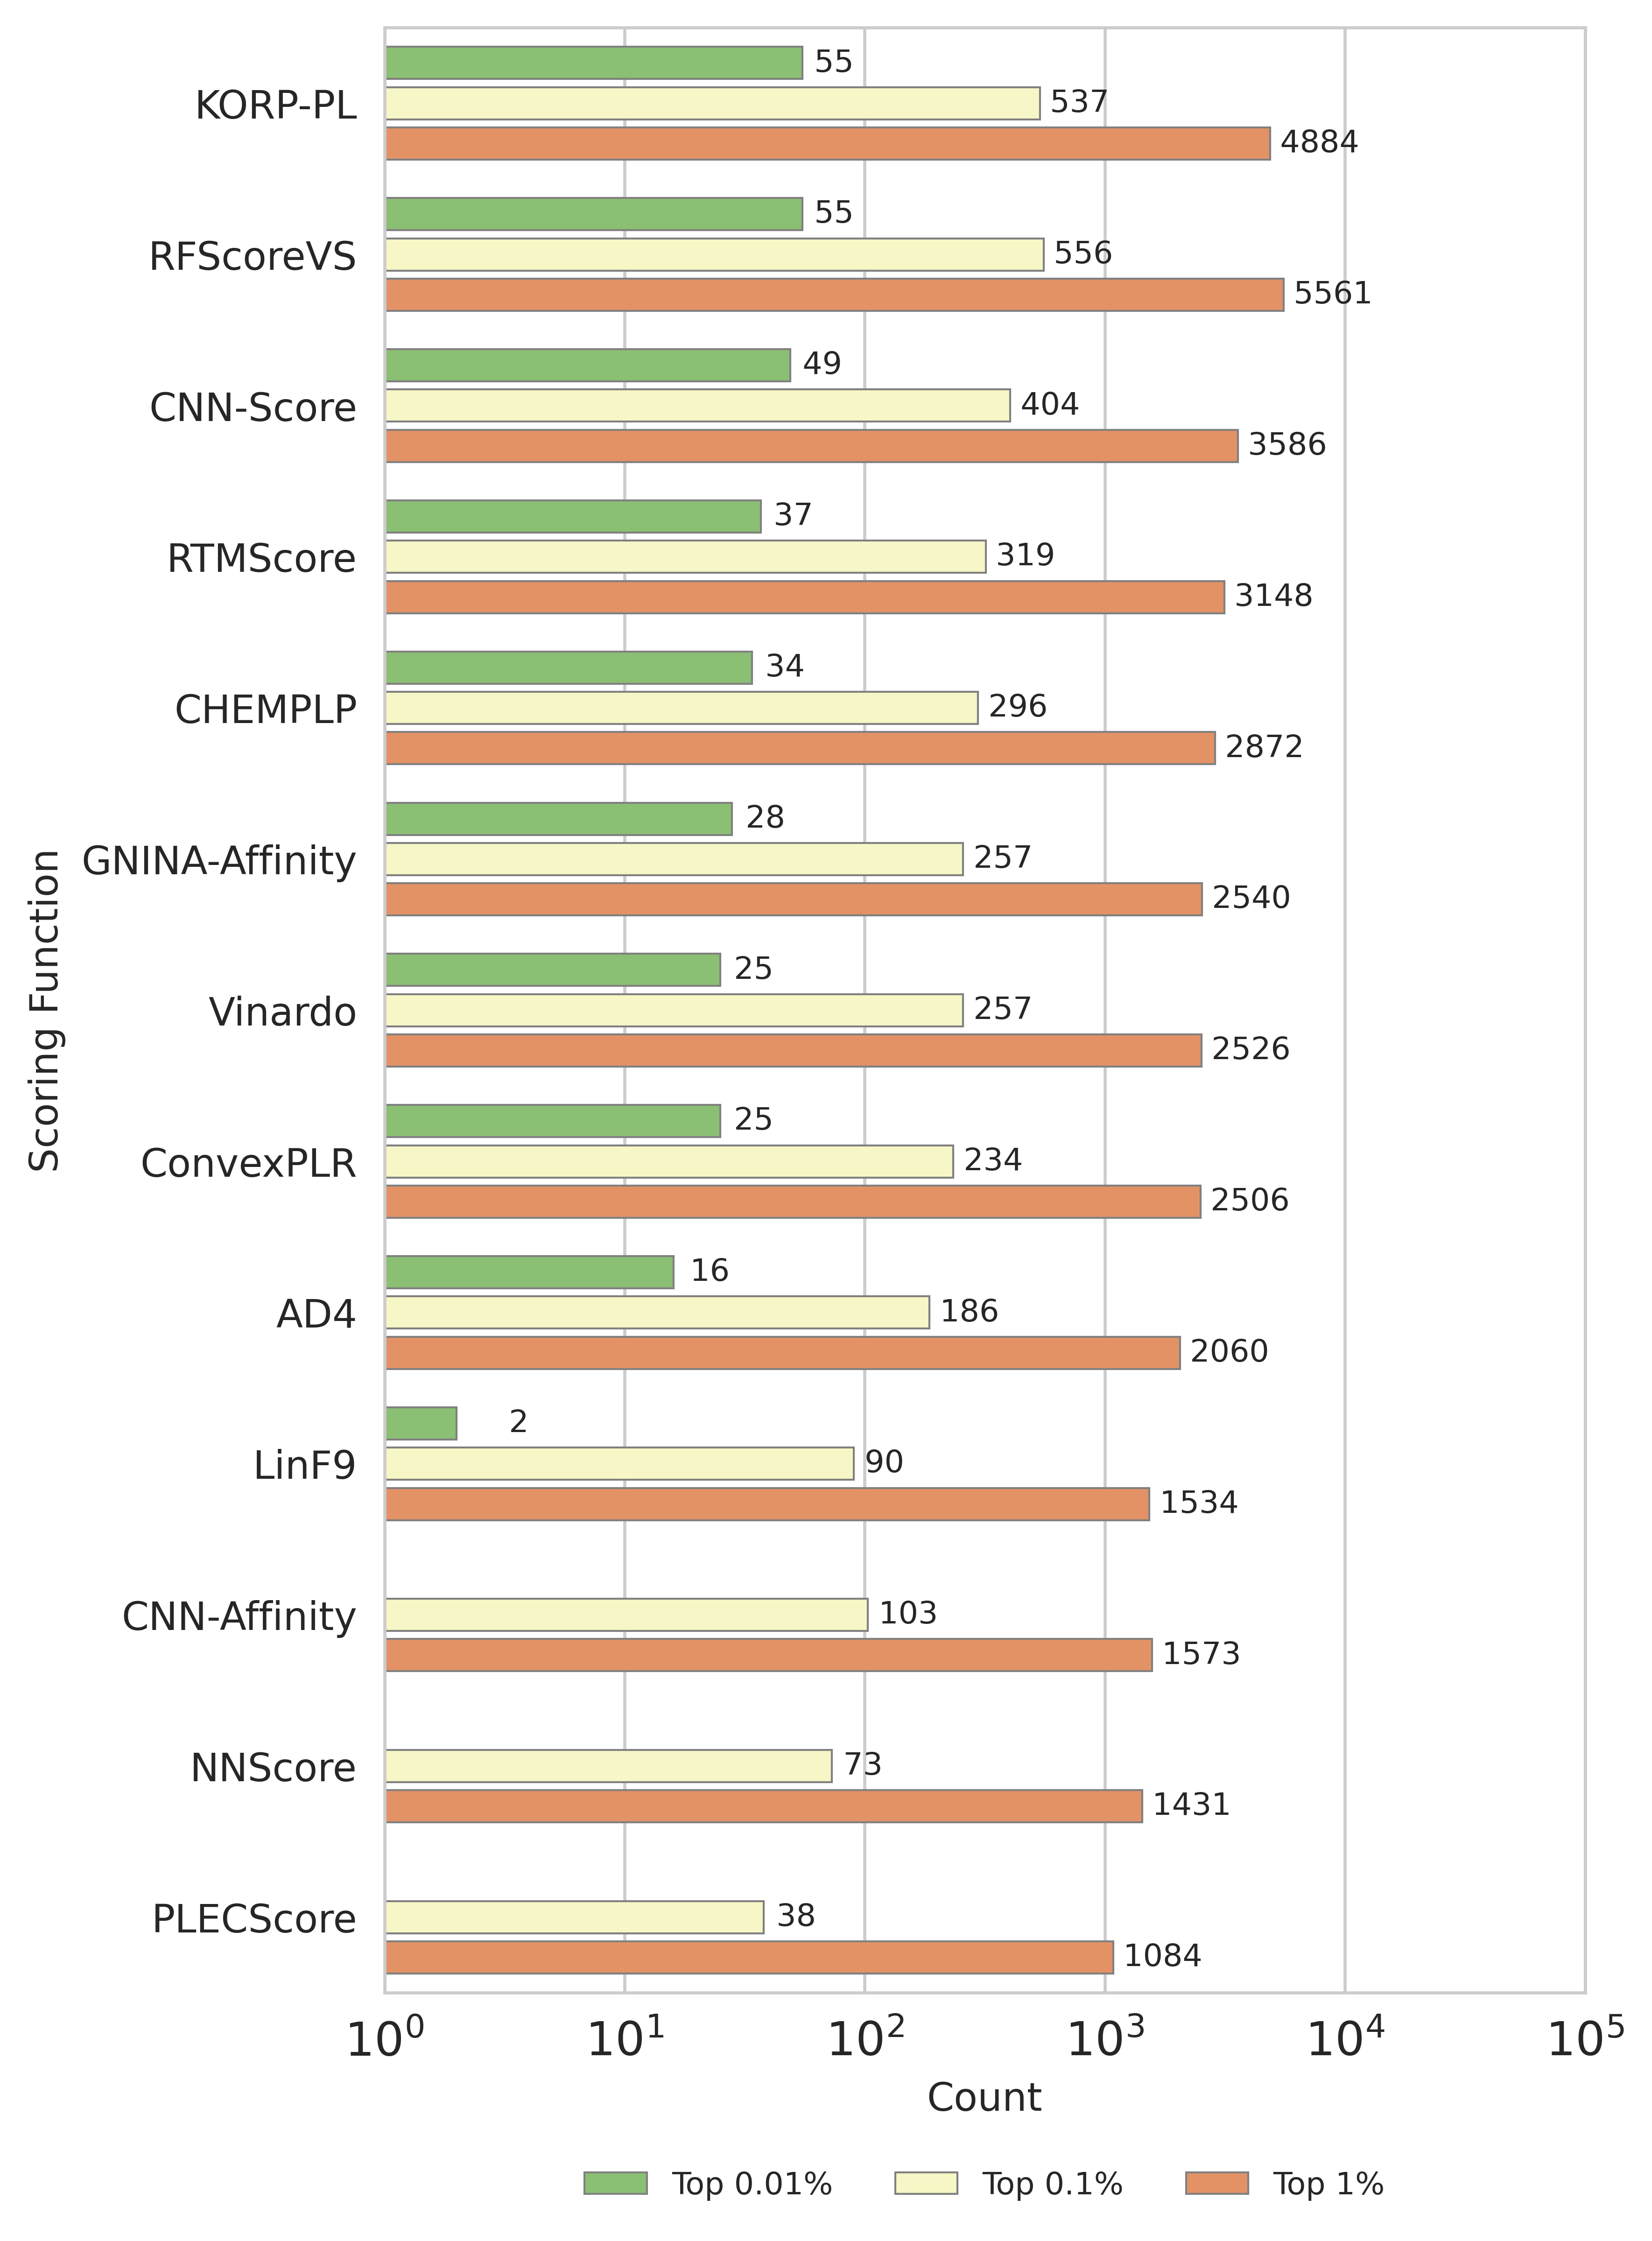

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Scoring Function",
    hue="Percentile",
    data=combined_dude_scoring_df,
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Scoring Function")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 100000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [18]:
def get_number_of_scoring_functions(df):
    numbers = df["scoring"].apply(lambda x: str(x.count("_") + 1) if "_" in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)


# Count occurrences in both subsets
dude_scoringnumber_counts_1 = get_number_of_scoring_functions(dude_top_1_percent)
dude_scoringnumber_counts_01 = get_number_of_scoring_functions(dude_top_01_percent)
dude_scoringnumber_counts_001 = get_number_of_scoring_functions(dude_top_001_percent)

# Convert counts to DataFrame for plotting
dude_scoringnumber_df_1 = dude_scoringnumber_counts_1.reset_index()
dude_scoringnumber_df_1.columns = ["Amount of Scoring Functions", "Count"]
dude_scoringnumber_df_01 = dude_scoringnumber_counts_01.reset_index()
dude_scoringnumber_df_01.columns = ["Amount of Scoring Functions", "Count"]
dude_scoringnumber_df_001 = dude_scoringnumber_counts_001.reset_index()
dude_scoringnumber_df_001.columns = ["Amount of Scoring Functions", "Count"]

# Combine for comparison in one plot
dude_scoringnumber_df_1["Percentile"] = "Top 1%"
dude_scoringnumber_df_01["Percentile"] = "Top 0.1%"
dude_scoringnumber_df_001["Percentile"] = "Top 0.01%"
combined_dude_scoringnumber_df = pd.concat(
    [dude_scoringnumber_df_001, dude_scoringnumber_df_01, dude_scoringnumber_df_1]
).reset_index(drop=True)

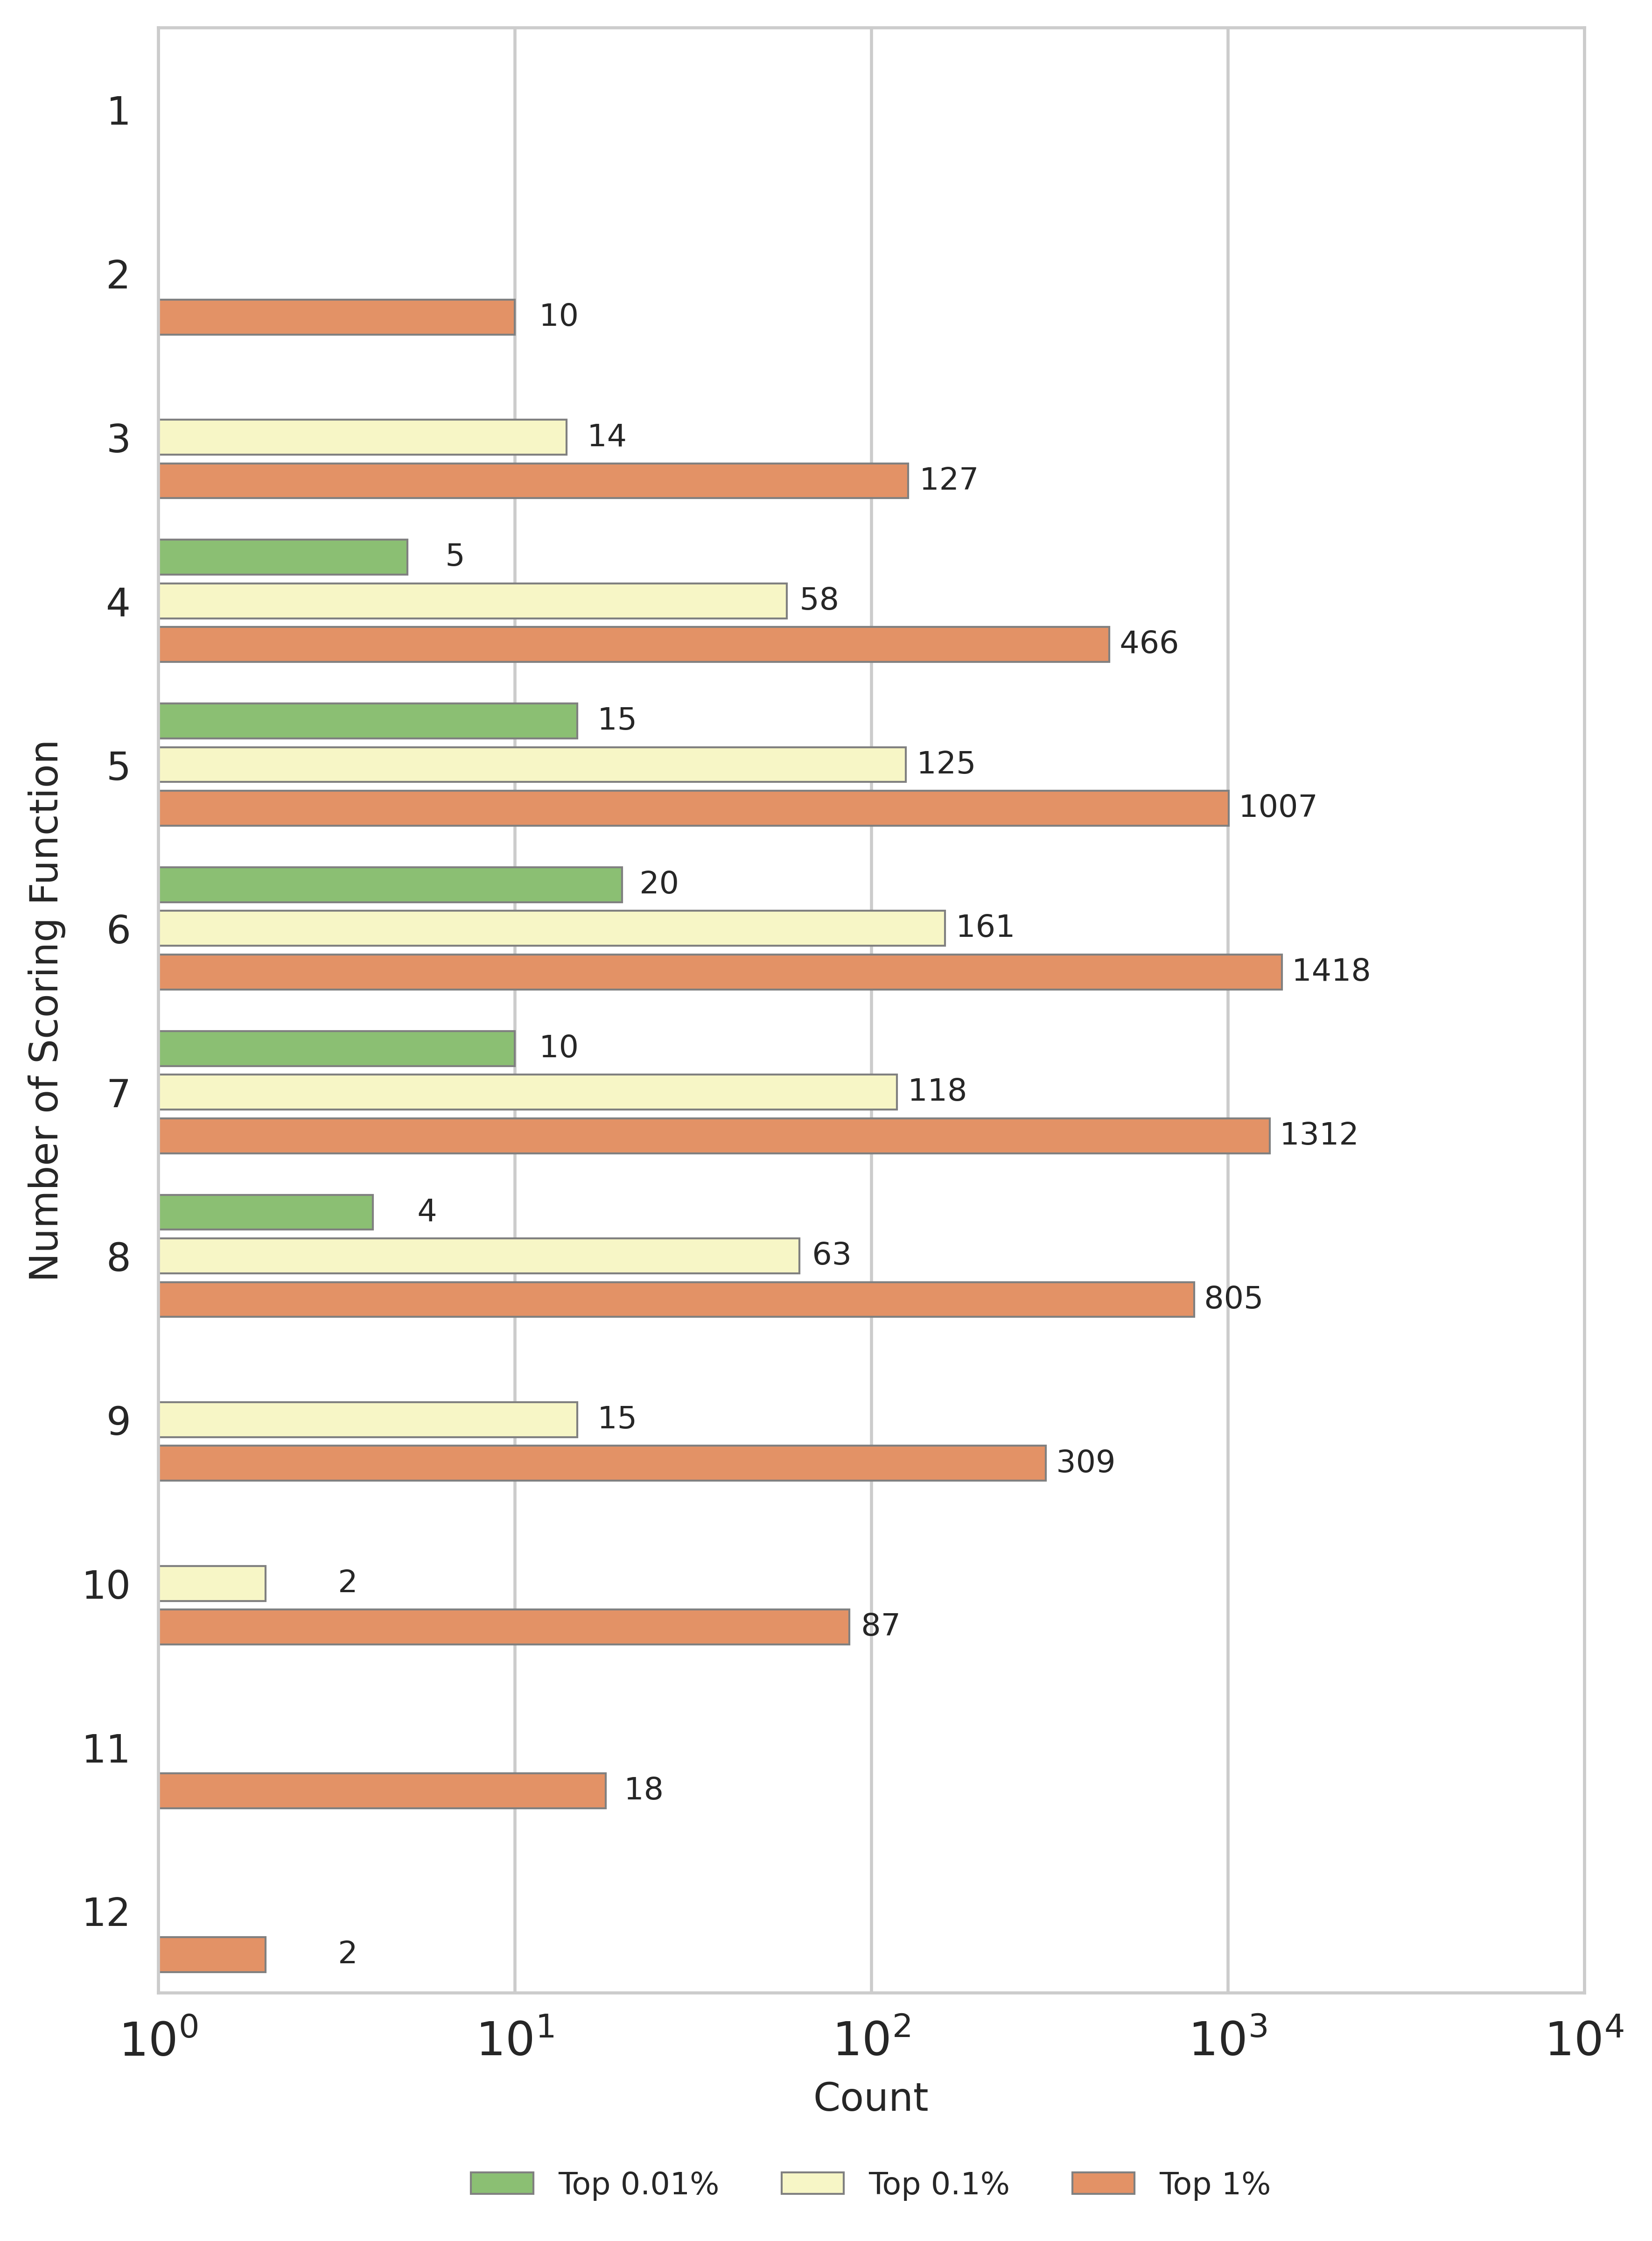

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Amount of Scoring Functions",
    hue="Percentile",
    data=combined_dude_scoringnumber_df,
    order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"],
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Number of Scoring Function")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 10000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [20]:
# Define your data for EF at 1%
litpcba_sf_data_ef1 = pd.read_csv("./Lit-PCBA_RESULTS/results_dockm8_EF_1%.csv")
litpcba_sf_data_ef1["consensus"].fillna("None", inplace=True)
litpcba_sf_data_ef1["Average"] = litpcba_sf_data_ef1.iloc[:, 4:].mean(axis=1)
litpcba_sf_data_ef1.sort_values("Average", ascending=False)
litpcba_top_1_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.01), "Average")
litpcba_top_01_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.001), "Average")
litpcba_top_001_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.0001), "Average")

In [21]:
expected_consensus_value = list(set(litpcba_sf_data_ef1["consensus"]))
# Count occurrences in 'consensus' for both subsets
litpcba_consensus_counts_1 = litpcba_top_1_percent["consensus"].value_counts(dropna=False).fillna(0)
litpcba_consensus_counts_01 = litpcba_top_01_percent["consensus"].value_counts(dropna=False).fillna(0)
litpcba_consensus_counts_001 = litpcba_top_001_percent["consensus"].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
litpcba_consensus_df_1 = litpcba_consensus_counts_1.reset_index()
litpcba_consensus_df_1.columns = ["Consensus", "Count"]
litpcba_consensus_df_01 = litpcba_consensus_counts_01.reset_index()
litpcba_consensus_df_01.columns = ["Consensus", "Count"]
litpcba_consensus_df_001 = litpcba_consensus_counts_001.reset_index()
litpcba_consensus_df_001.columns = ["Consensus", "Count"]

# Concatenate the DataFrames
combined_litpcba_consensus_df = pd.concat(
    [
        litpcba_consensus_df_001.assign(Percentile="Top 0.01%"),
        litpcba_consensus_df_01.assign(Percentile="Top 0.1%"),
        litpcba_consensus_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_litpcba_consensus_df["PercentileRank"] = combined_litpcba_consensus_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_litpcba_combined_consensus_df = combined_litpcba_consensus_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed_consensus
sorted_litpcba_combined_consensus_df.drop(columns=["PercentileRank"], inplace=True)

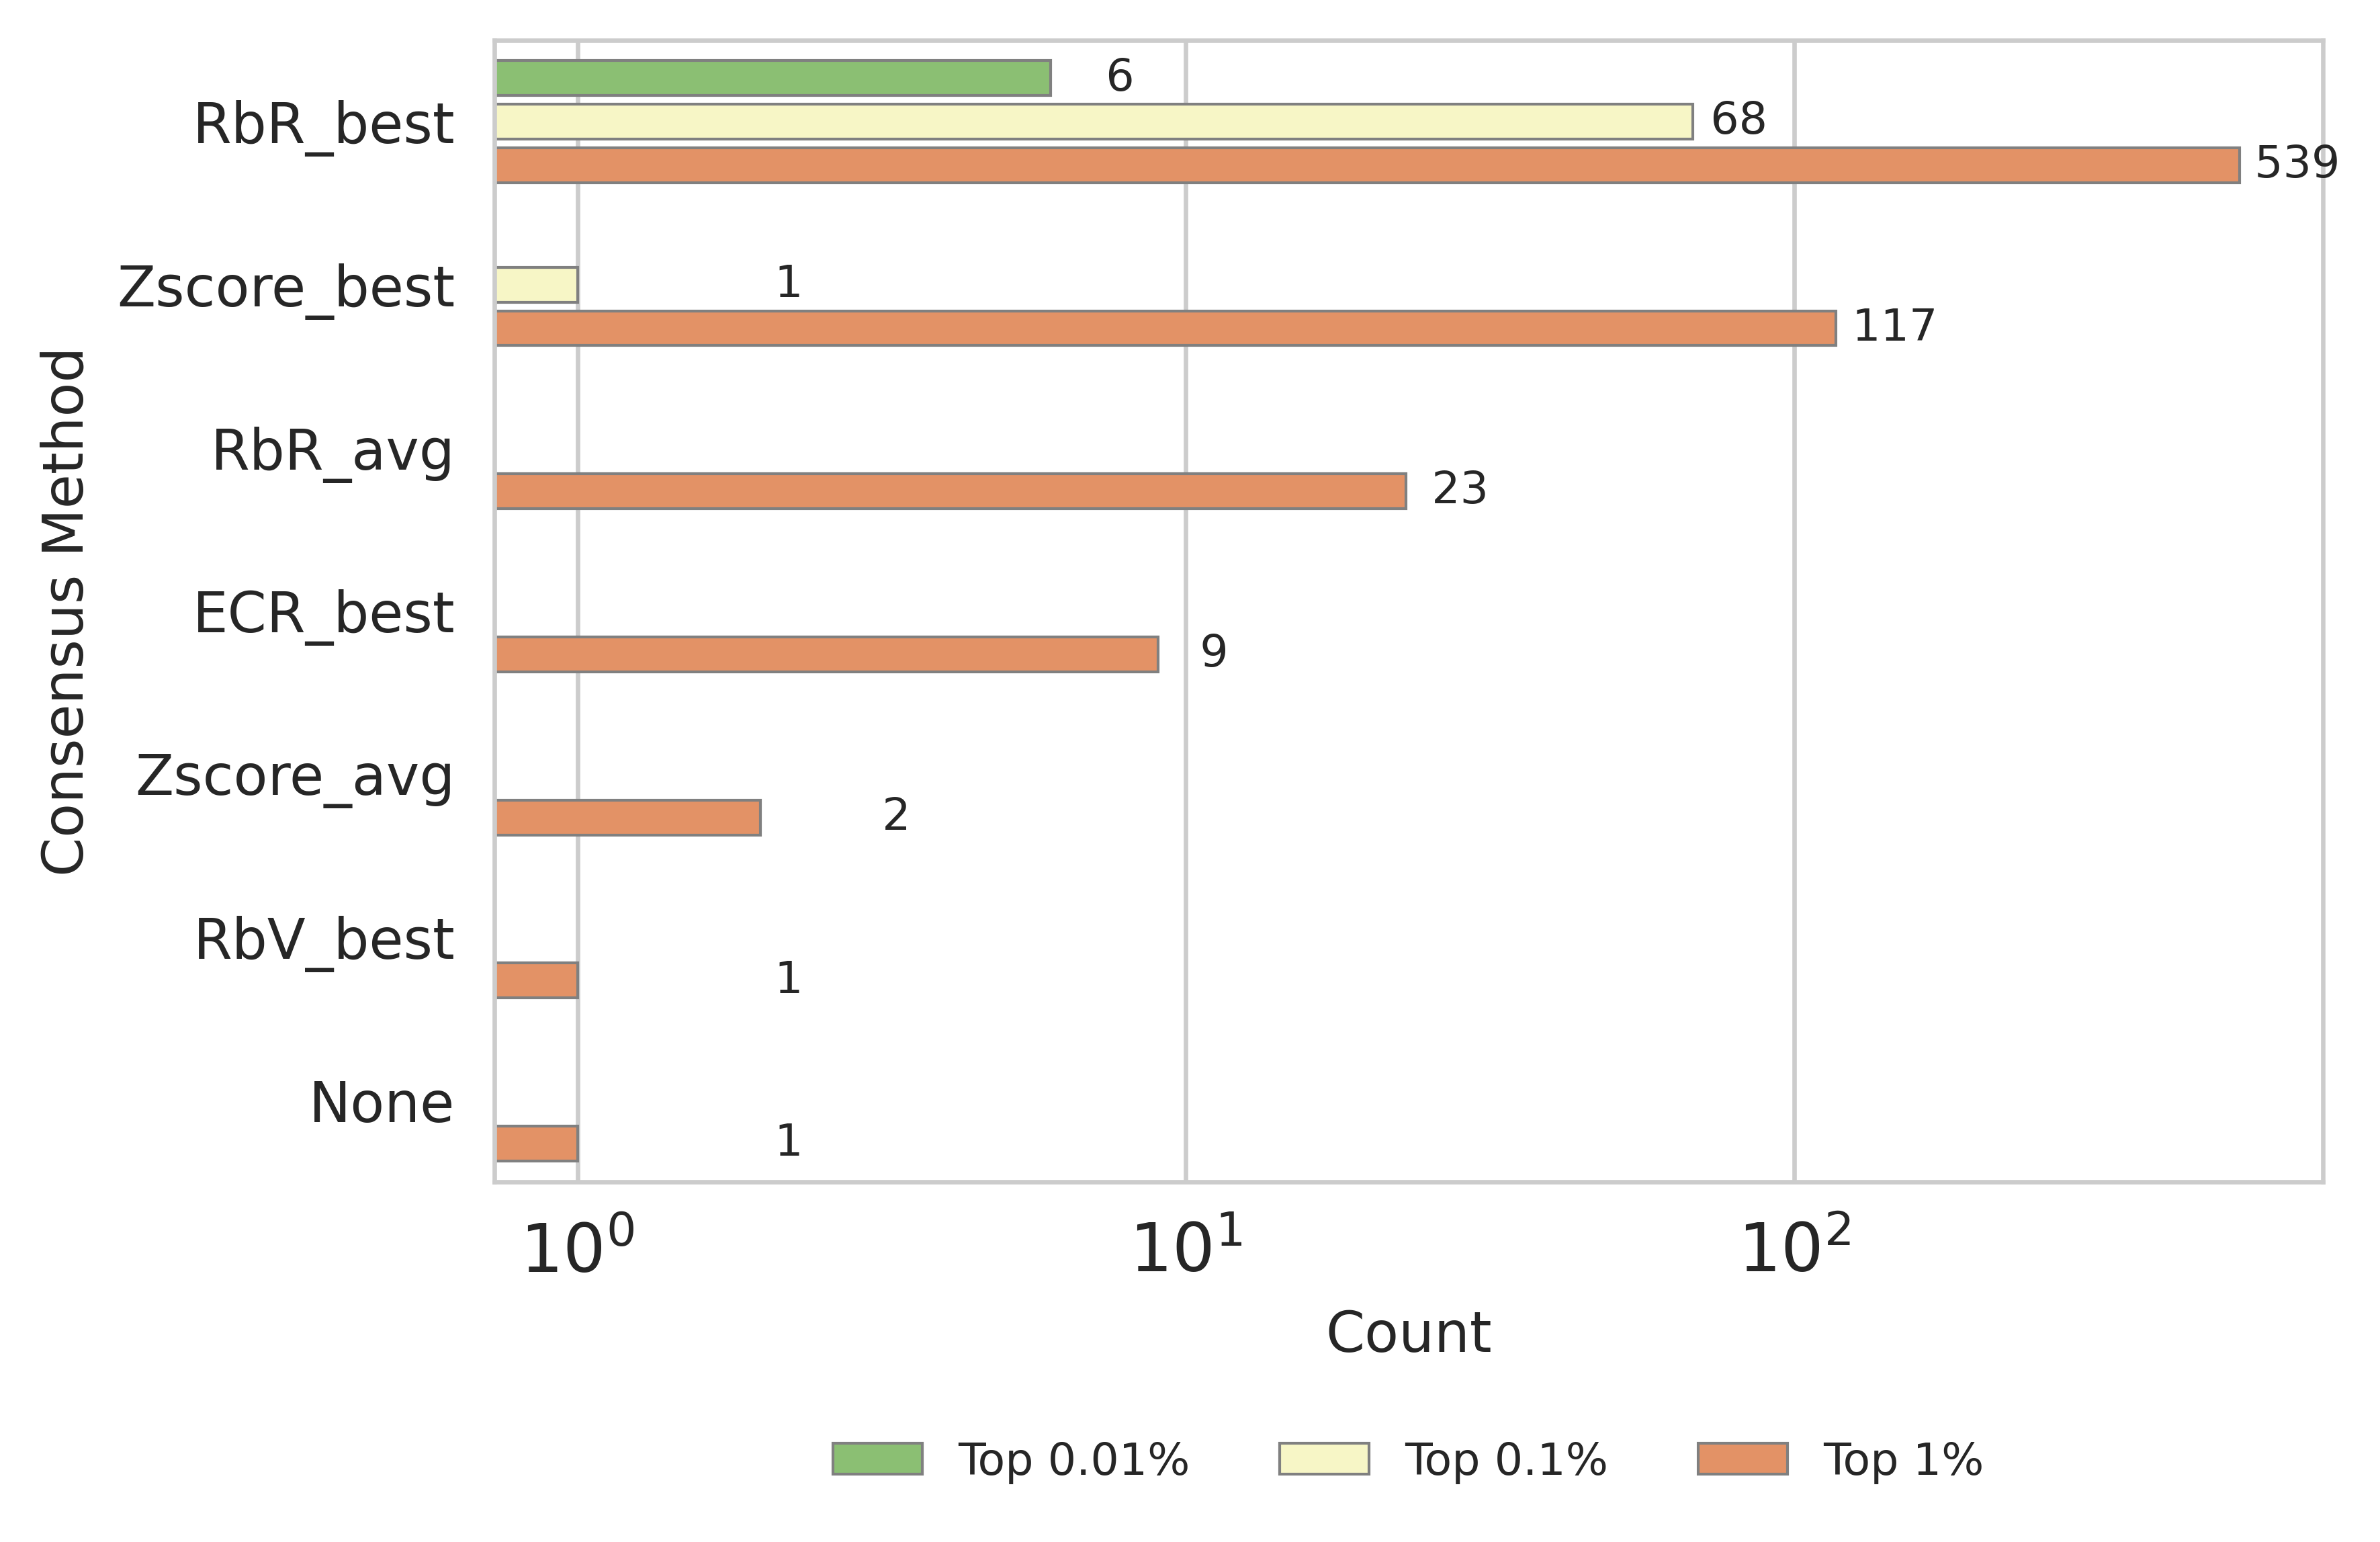

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Consensus",
    hue="Percentile",
    data=combined_litpcba_consensus_df,
    order=sorted_litpcba_combined_consensus_df["Consensus"].unique(),
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Consensus Method")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [23]:
expected_clustering_value = list(set(litpcba_sf_data_ef1["clustering"]))
# Count occurrences in 'consensus' for both subsets
litpcba_clustering_counts_1 = (
    litpcba_top_1_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
litpcba_clustering_counts_01 = (
    litpcba_top_01_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)
litpcba_clustering_counts_001 = (
    litpcba_top_001_percent["clustering"]
    .value_counts()
    .reindex(expected_clustering_value, fill_value=0)
    .sort_values(ascending=False)
)

# Convert counts to DataFrame for plotting
litpcba_clustering_df_1 = litpcba_clustering_counts_1.reset_index()
litpcba_clustering_df_1.columns = ["Clustering", "Count"]
litpcba_clustering_df_01 = litpcba_clustering_counts_01.reset_index()
litpcba_clustering_df_01.columns = ["Clustering", "Count"]
litpcba_clustering_df_001 = litpcba_clustering_counts_001.reset_index()
litpcba_clustering_df_001.columns = ["Clustering", "Count"]

combined_litpcba_clustering_df = pd.concat(
    [
        litpcba_clustering_df_001.assign(Percentile="Top 0.01%"),
        litpcba_clustering_df_01.assign(Percentile="Top 0.1%"),
        litpcba_clustering_df_1.assign(Percentile="Top 1%"),
    ]
).reset_index(drop=True)

# Define custom order for percentile sorting
percentile_order = {"Top 0.01%": 3, "Top 0.1%": 2, "Top 1%": 1}
combined_litpcba_clustering_df["PercentileRank"] = combined_litpcba_clustering_df["Percentile"].map(percentile_order)

# Sort by Percentile first (based on custom order), then by Count descending
sorted_litpcba_combined_clustering_df = combined_litpcba_clustering_df.sort_values(
    by=["PercentileRank", "Count"], ascending=[True, False]
)

# Drop the helper 'PercentileRank' column if no longer needed
sorted_litpcba_combined_clustering_df.drop(columns=["PercentileRank"], inplace=True)

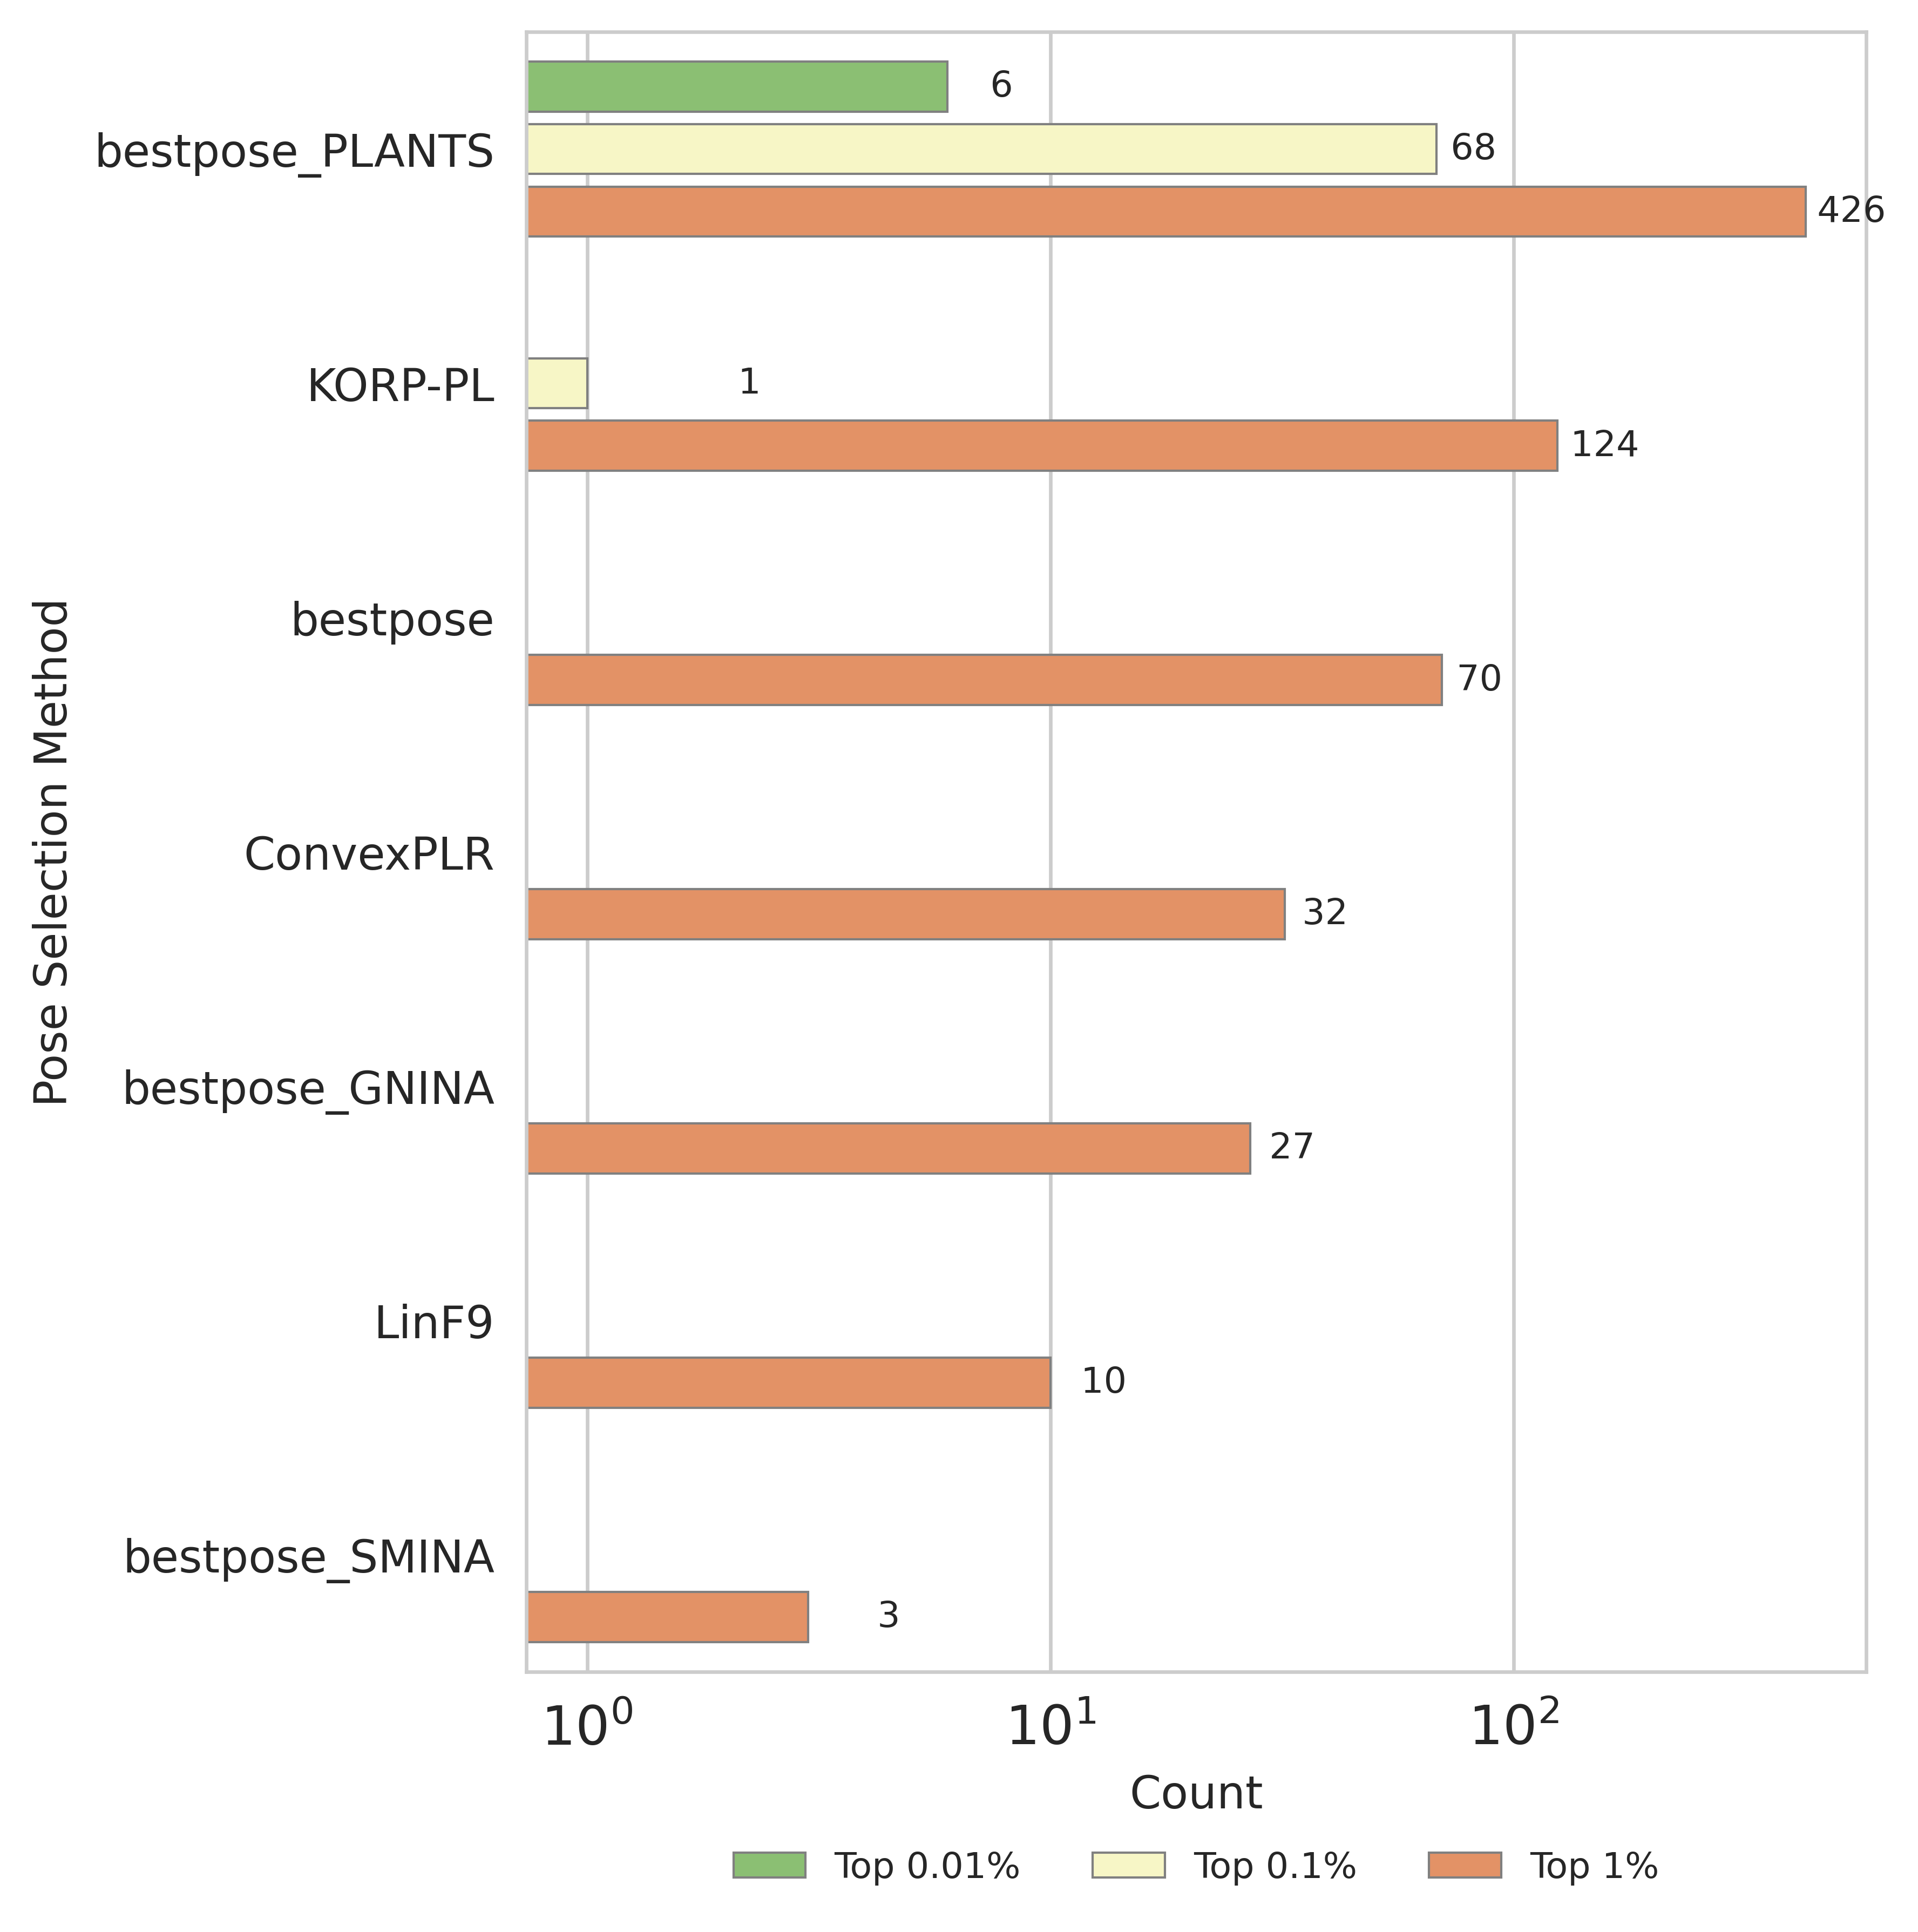

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Clustering",
    hue="Percentile",
    data=combined_litpcba_clustering_df,
    order=sorted_litpcba_combined_clustering_df["Clustering"].unique(),
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Pose Selection Method")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [25]:
# Function to split the 'scoring' column and count occurrences
def count_sf_functions(df):
    litpcba_scoring_functions = df["scoring"].str.split("_", expand=True).stack()
    return litpcba_scoring_functions.value_counts(dropna=False).fillna(0)


# Count occurrences in both subsets
litpcba_scoring_counts_1 = count_sf_functions(litpcba_top_1_percent)
litpcba_scoring_counts_01 = count_sf_functions(litpcba_top_01_percent)
litpcba_scoring_counts_001 = count_sf_functions(litpcba_top_001_percent)

# Convert counts to DataFrame for plotting
litpcba_scoring_df_1 = litpcba_scoring_counts_1.reset_index()
litpcba_scoring_df_1.columns = ["Scoring Function", "Count"]
litpcba_scoring_df_01 = litpcba_scoring_counts_01.reset_index()
litpcba_scoring_df_01.columns = ["Scoring Function", "Count"]
litpcba_scoring_df_001 = litpcba_scoring_counts_001.reset_index()
litpcba_scoring_df_001.columns = ["Scoring Function", "Count"]

# Combine for comparison in one plot
litpcba_scoring_df_1["Percentile"] = "Top 1%"
litpcba_scoring_df_01["Percentile"] = "Top 0.1%"
litpcba_scoring_df_001["Percentile"] = "Top 0.01%"
combined_litpcba_scoring_df = pd.concat(
    [litpcba_scoring_df_001, litpcba_scoring_df_01, litpcba_scoring_df_1]
).reset_index(drop=True)

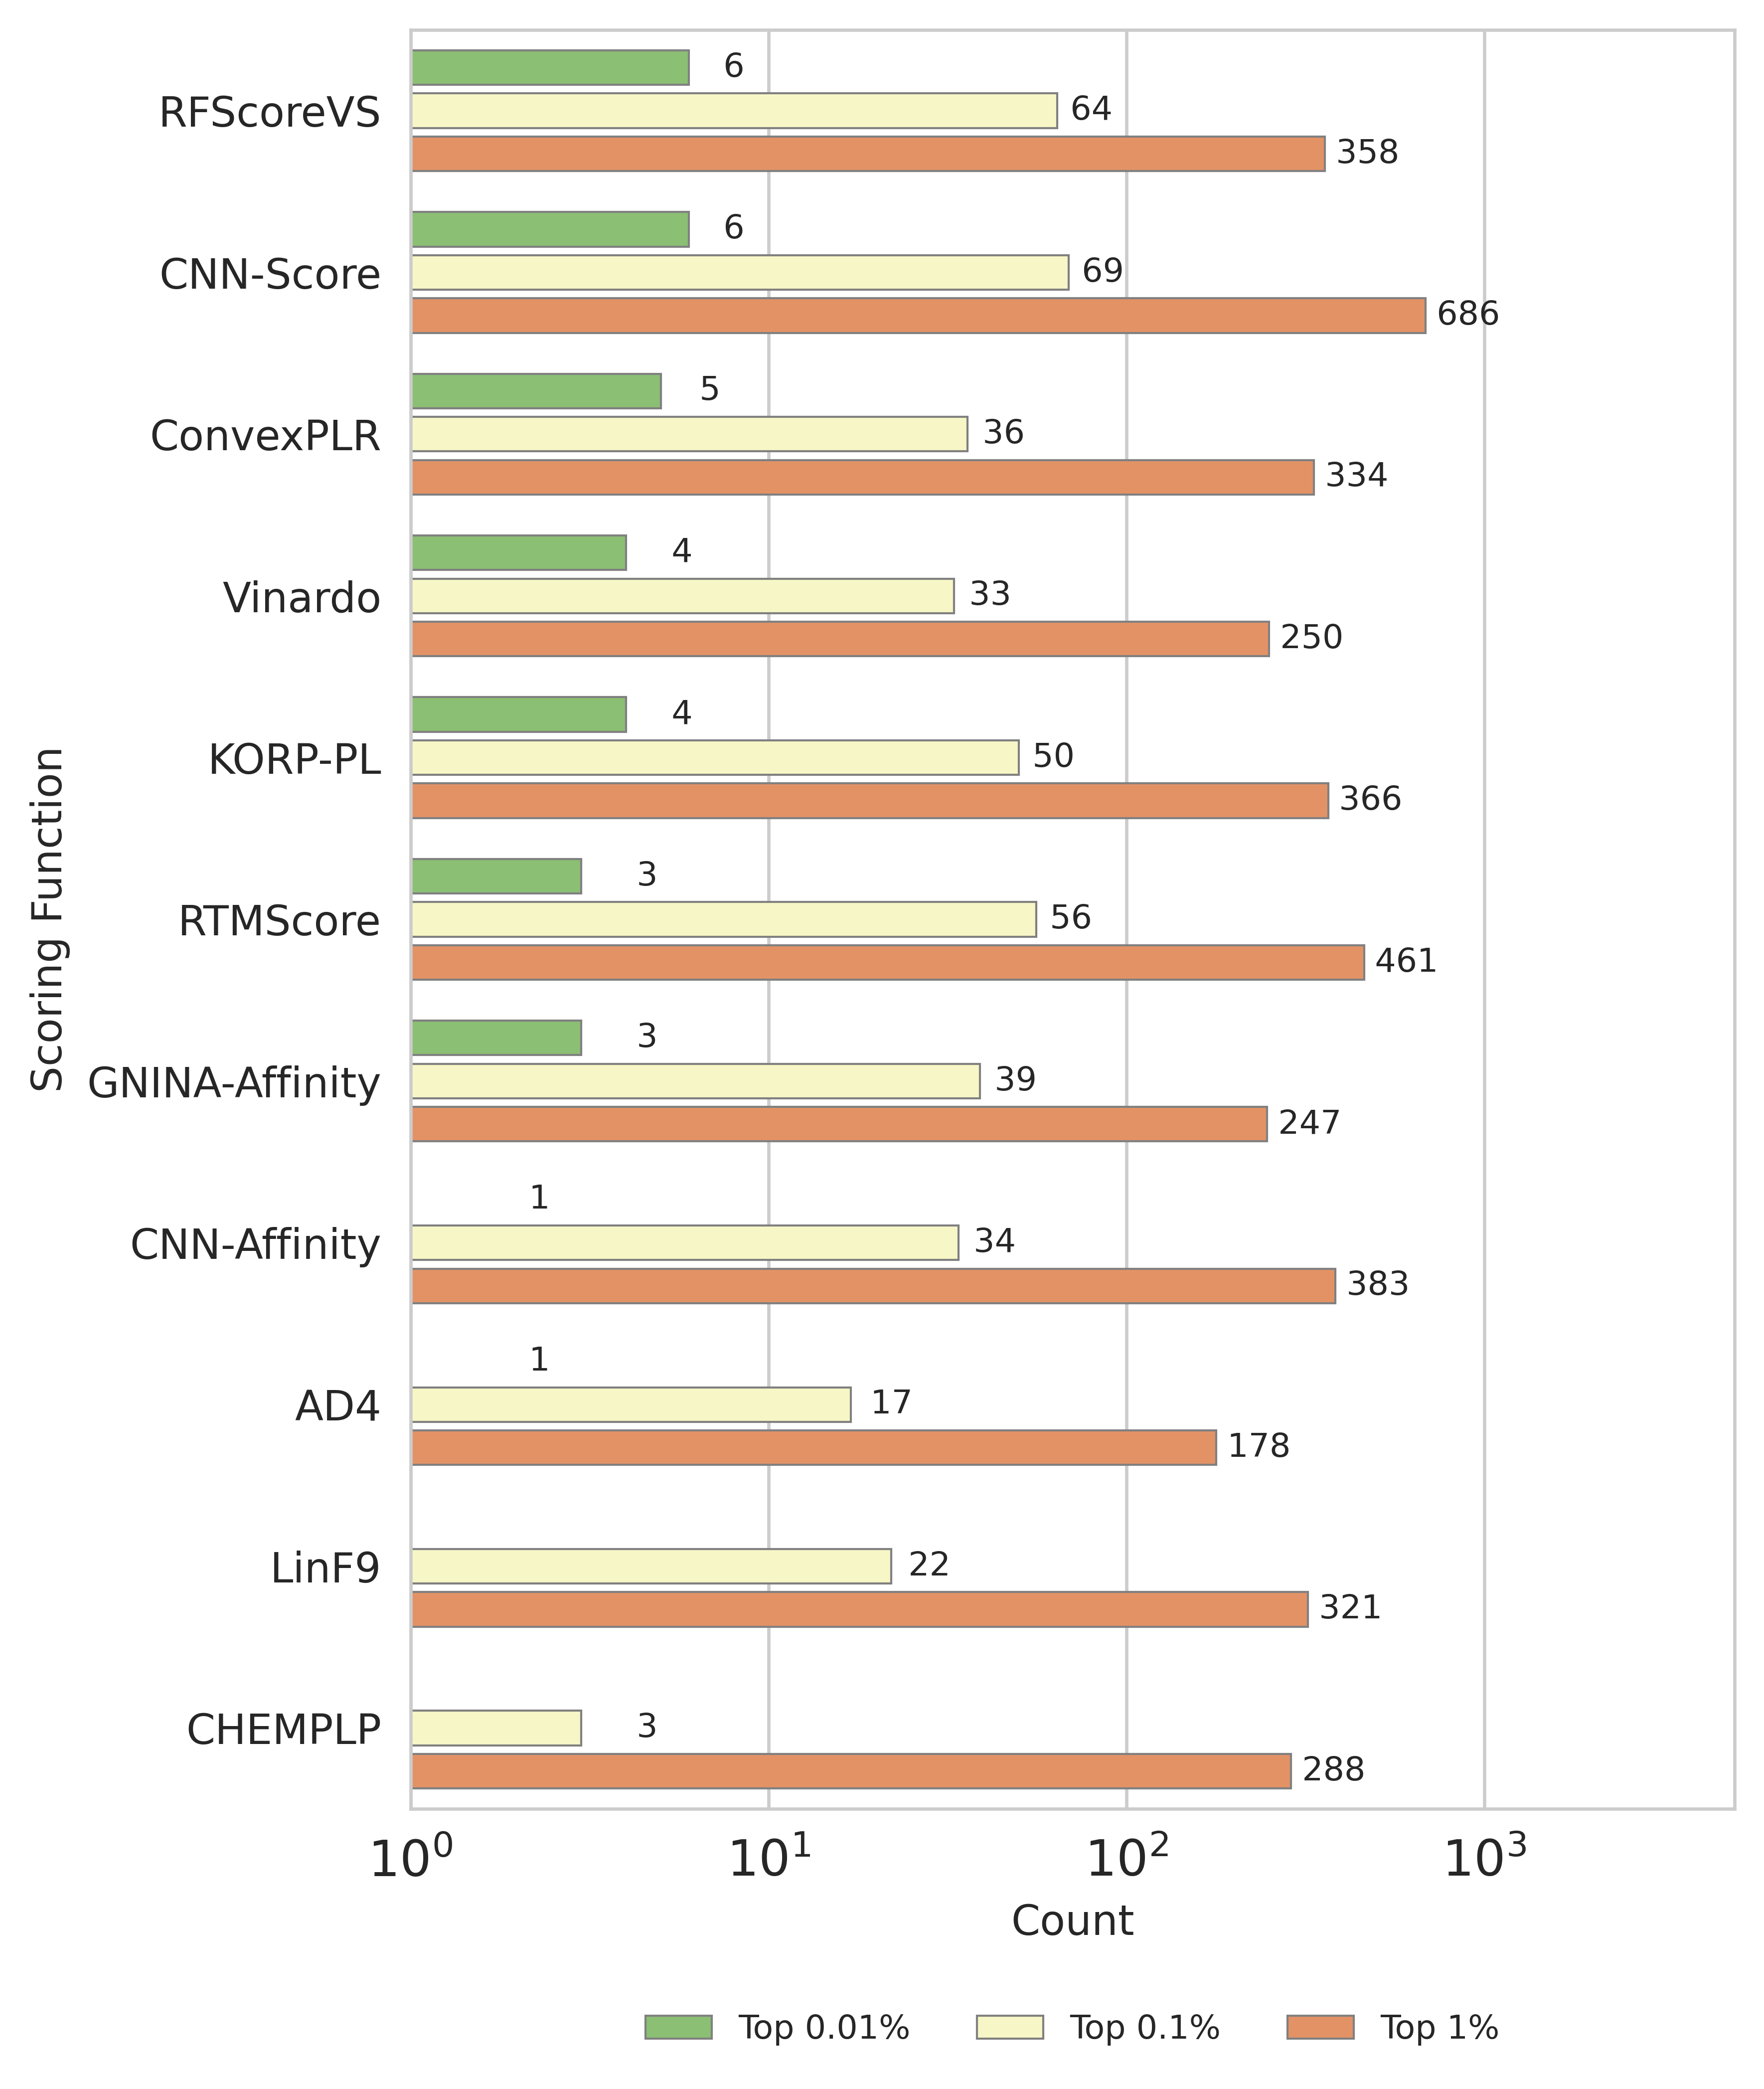

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 7), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Scoring Function",
    hue="Percentile",
    data=combined_litpcba_scoring_df,
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Scoring Function")
plt.xticks(fontsize=12)
plt.xlim(1, 5000)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

In [27]:
def get_number_of_scoring_functions(df):
    numbers = df["scoring"].apply(lambda x: str(x.count("_") + 1) if "_" in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)


# Count occurrences in both subsets
litpcba_scoringnumber_counts_1 = get_number_of_scoring_functions(litpcba_top_1_percent)
litpcba_scoringnumber_counts_01 = get_number_of_scoring_functions(litpcba_top_01_percent)
litpcba_scoringnumber_counts_001 = get_number_of_scoring_functions(litpcba_top_001_percent)

# Convert counts to DataFrame for plotting
litpcba_scoringnumber_df_1 = litpcba_scoringnumber_counts_1.reset_index()
litpcba_scoringnumber_df_1.columns = ["Amount of Scoring Functions", "Count"]
litpcba_scoringnumber_df_01 = litpcba_scoringnumber_counts_01.reset_index()
litpcba_scoringnumber_df_01.columns = ["Amount of Scoring Functions", "Count"]
litpcba_scoringnumber_df_001 = litpcba_scoringnumber_counts_001.reset_index()
litpcba_scoringnumber_df_001.columns = ["Amount of Scoring Functions", "Count"]

# Combine for comparison in one plot
litpcba_scoringnumber_df_1["Percentile"] = "Top 1%"
litpcba_scoringnumber_df_01["Percentile"] = "Top 0.1%"
litpcba_scoringnumber_df_001["Percentile"] = "Top 0.01%"
combined_litpcba_scoringnumber_df = pd.concat(
    [litpcba_scoringnumber_df_001, litpcba_scoringnumber_df_01, litpcba_scoringnumber_df_1]
).reset_index(drop=True)

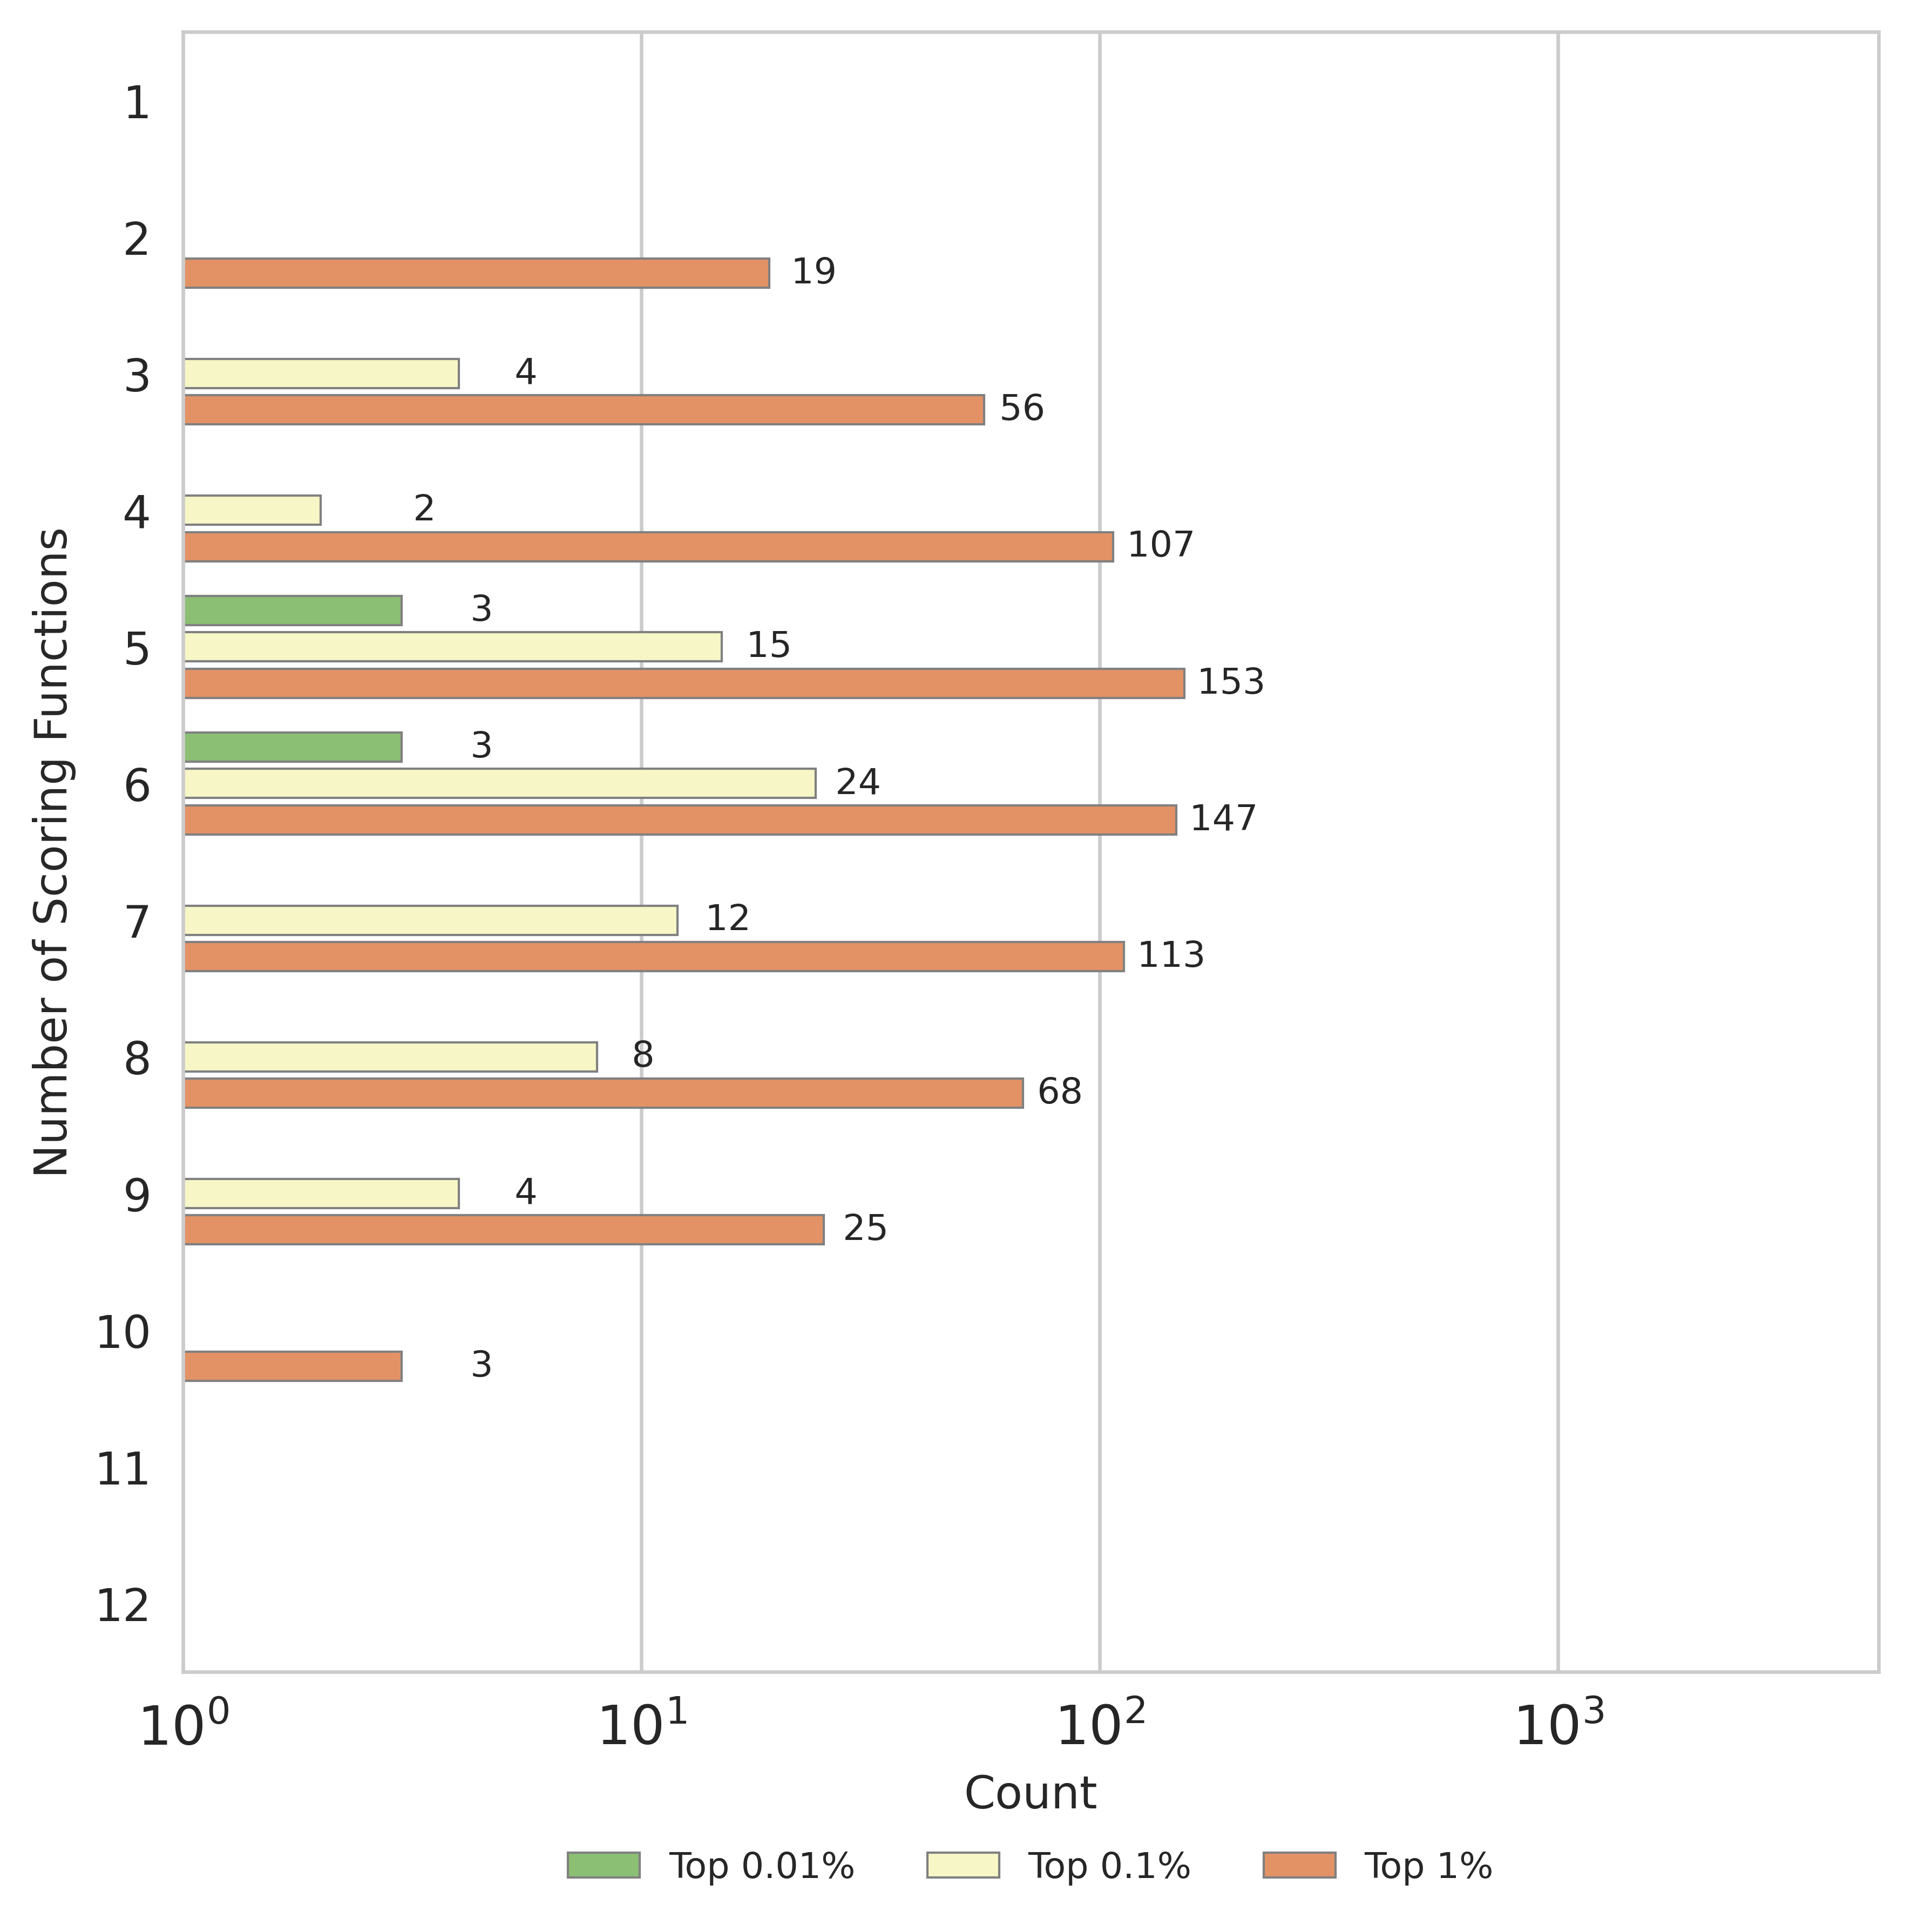

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6), dpi=600)

# Plotting the count data
ax = sns.barplot(
    x="Count",
    y="Amount of Scoring Functions",
    hue="Percentile",
    data=combined_litpcba_scoringnumber_df,
    order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"],
    palette="RdYlGn_r",
    width=0.8,
    gap=0.2,
    edgecolor="grey",
    linewidth=0.5,
)
plt.xscale("log")

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, " {:1.0f}".format(width), ha="left", va="center", fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel("Count")
plt.ylabel("Number of Scoring Functions")
plt.xticks(fontsize=12)
plt.legend(loc="lower center", fontsize=8, frameon=False, ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.xlim(1, 5000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()

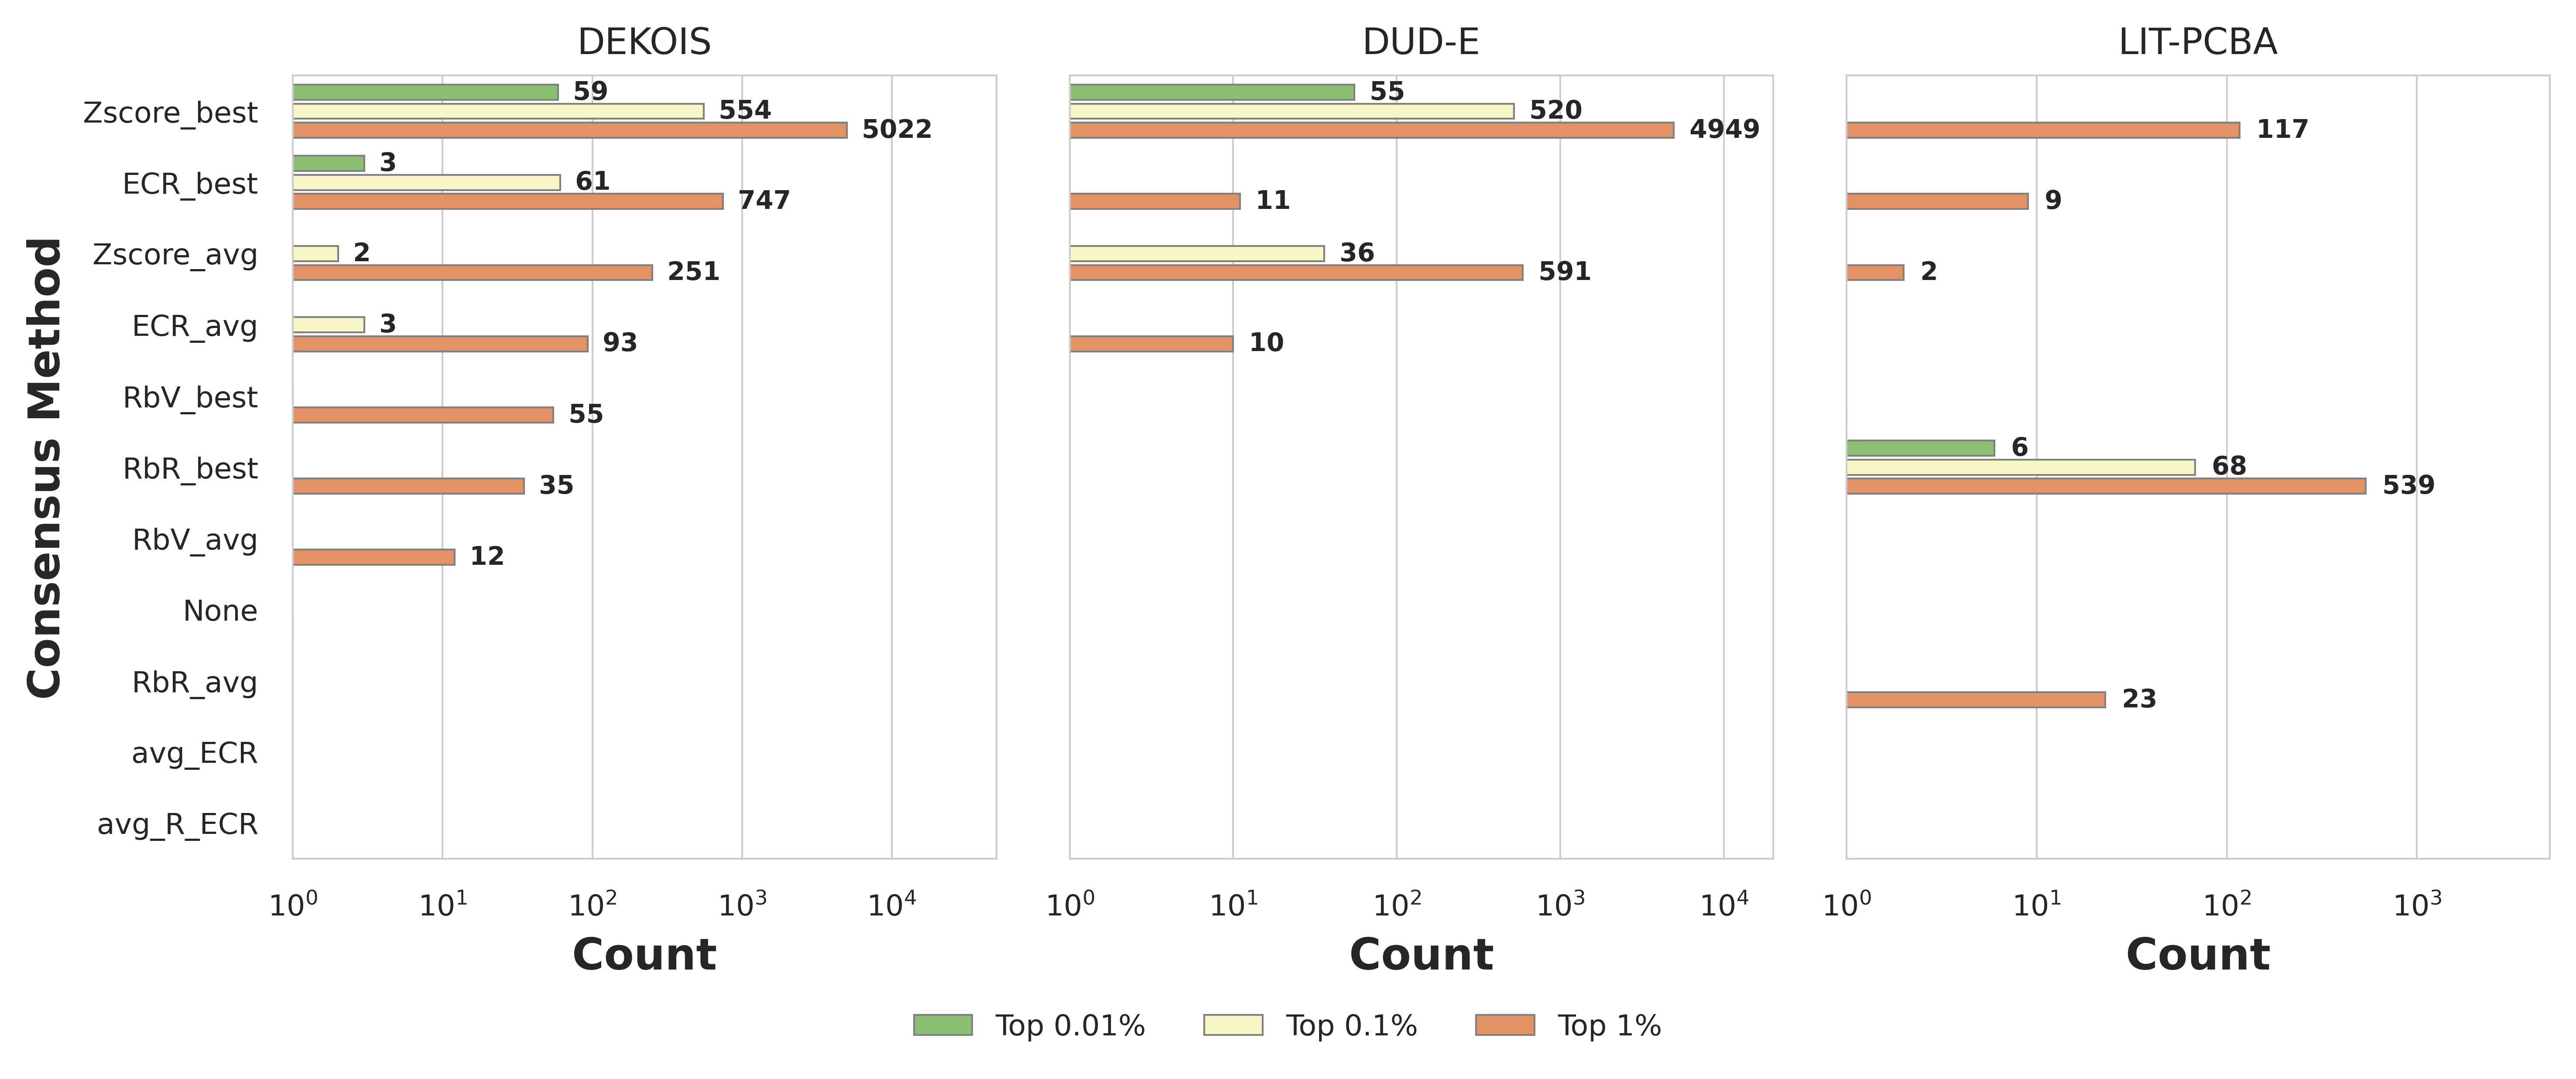

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_consensus_df, combined_dude_consensus_df, combined_litpcba_consensus_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(1, 50000), (1, 20000), (1, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Consensus",
        hue="Percentile",
        data=data,
        order=sorted_dekois_combined_consensus_df["Consensus"].unique(),
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="grey",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 1:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold")  # Make x-axis label bold
    ax.set_ylabel("Consensus Method", fontweight="bold")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

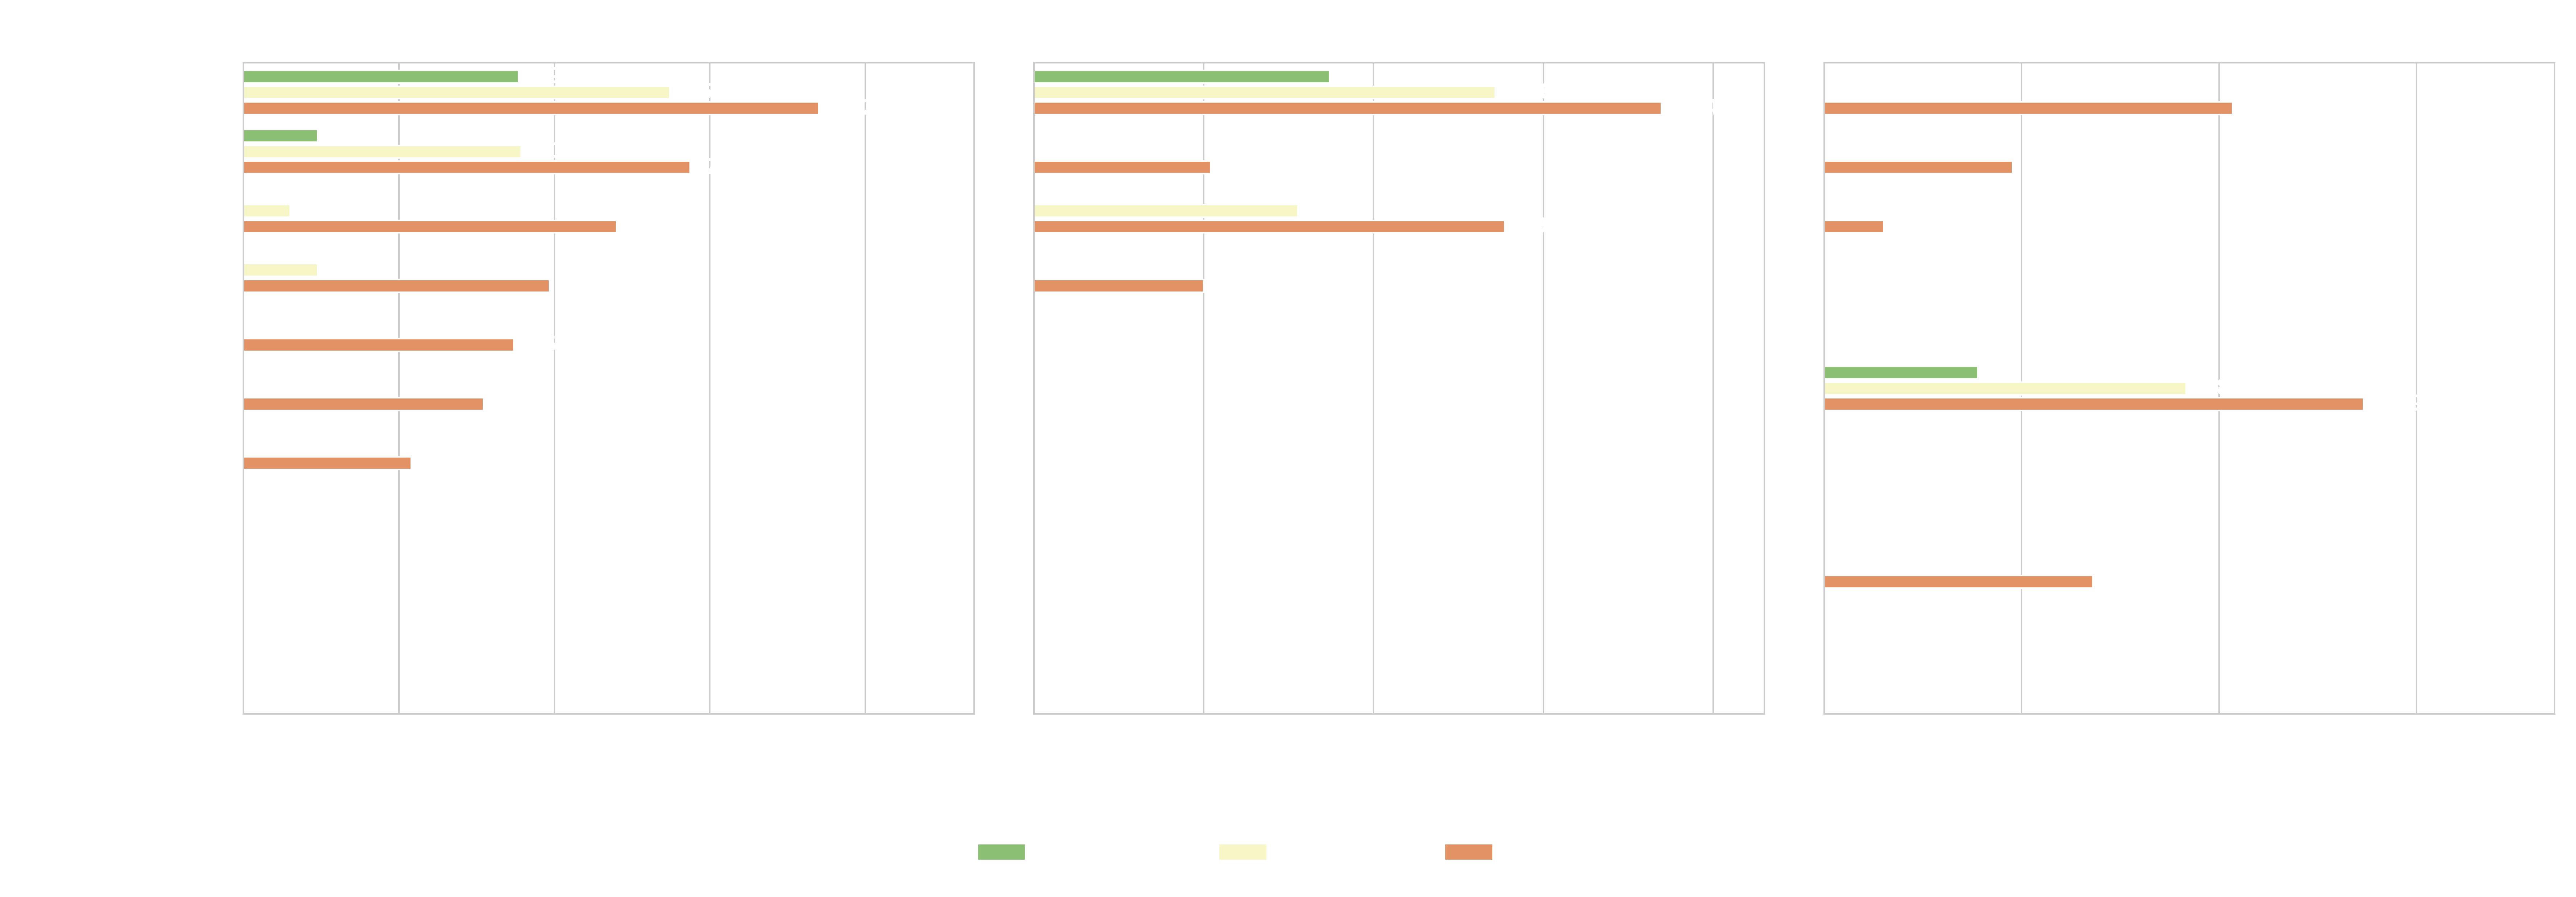

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_consensus_df, combined_dude_consensus_df, combined_litpcba_consensus_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(1, 50000), (1, 20000), (1, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Consensus",
        hue="Percentile",
        data=data,
        order=sorted_dekois_combined_consensus_df["Consensus"].unique(),
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="white",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 1:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
                color="white",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold", color="white")  # Make x-axis label bold
    ax.set_ylabel("Consensus Method", fontweight="bold", color="white")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10, fontweight="bold", color="white")  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8, colors="white")
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
legend = fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

for text in legend.get_texts():
    text.set_color("white")

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_consensus_methods_counts_dark.png", transparent=True, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/1669684807.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/1669684807.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/1669684807.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


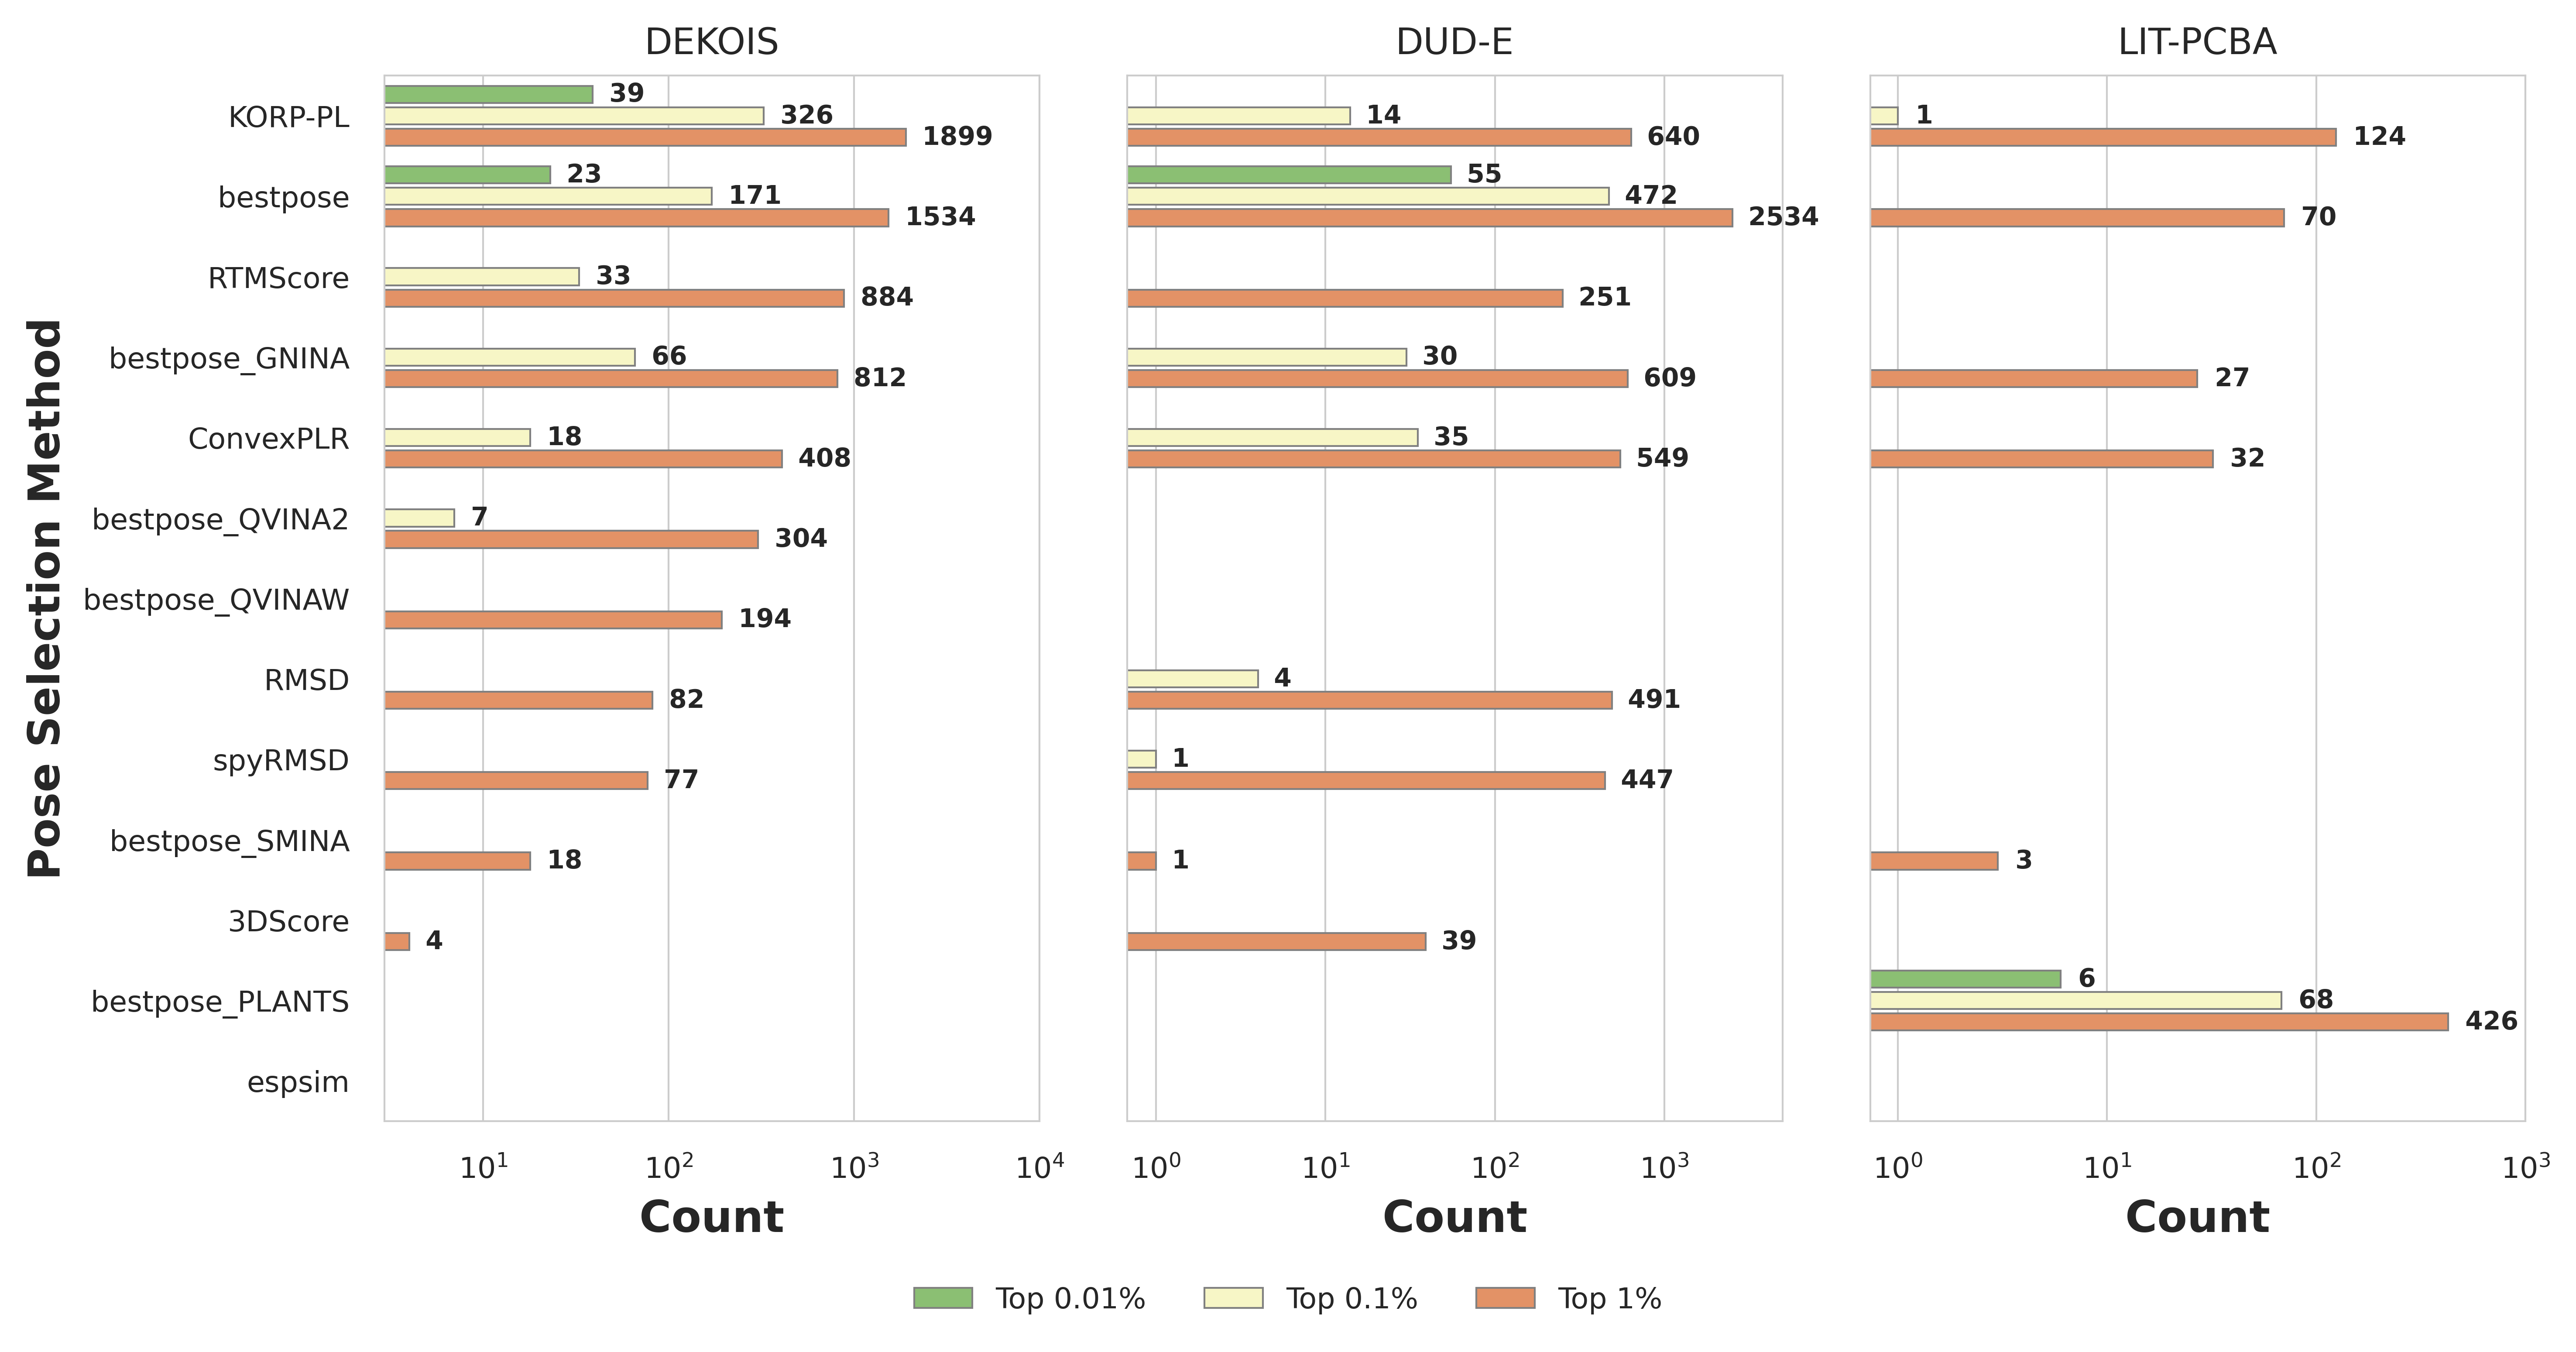

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_clustering_df, combined_dude_clustering_df, combined_litpcba_clustering_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 5000), (0, 1000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Clustering",
        hue="Percentile",
        data=data,
        order=sorted_dekois_combined_clustering_df["Clustering"].unique(),
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="grey",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold")  # Make x-axis label bold
    ax.set_ylabel("Pose Selection Method", fontweight="bold")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/2983443256.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/2983443256.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/2983443256.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


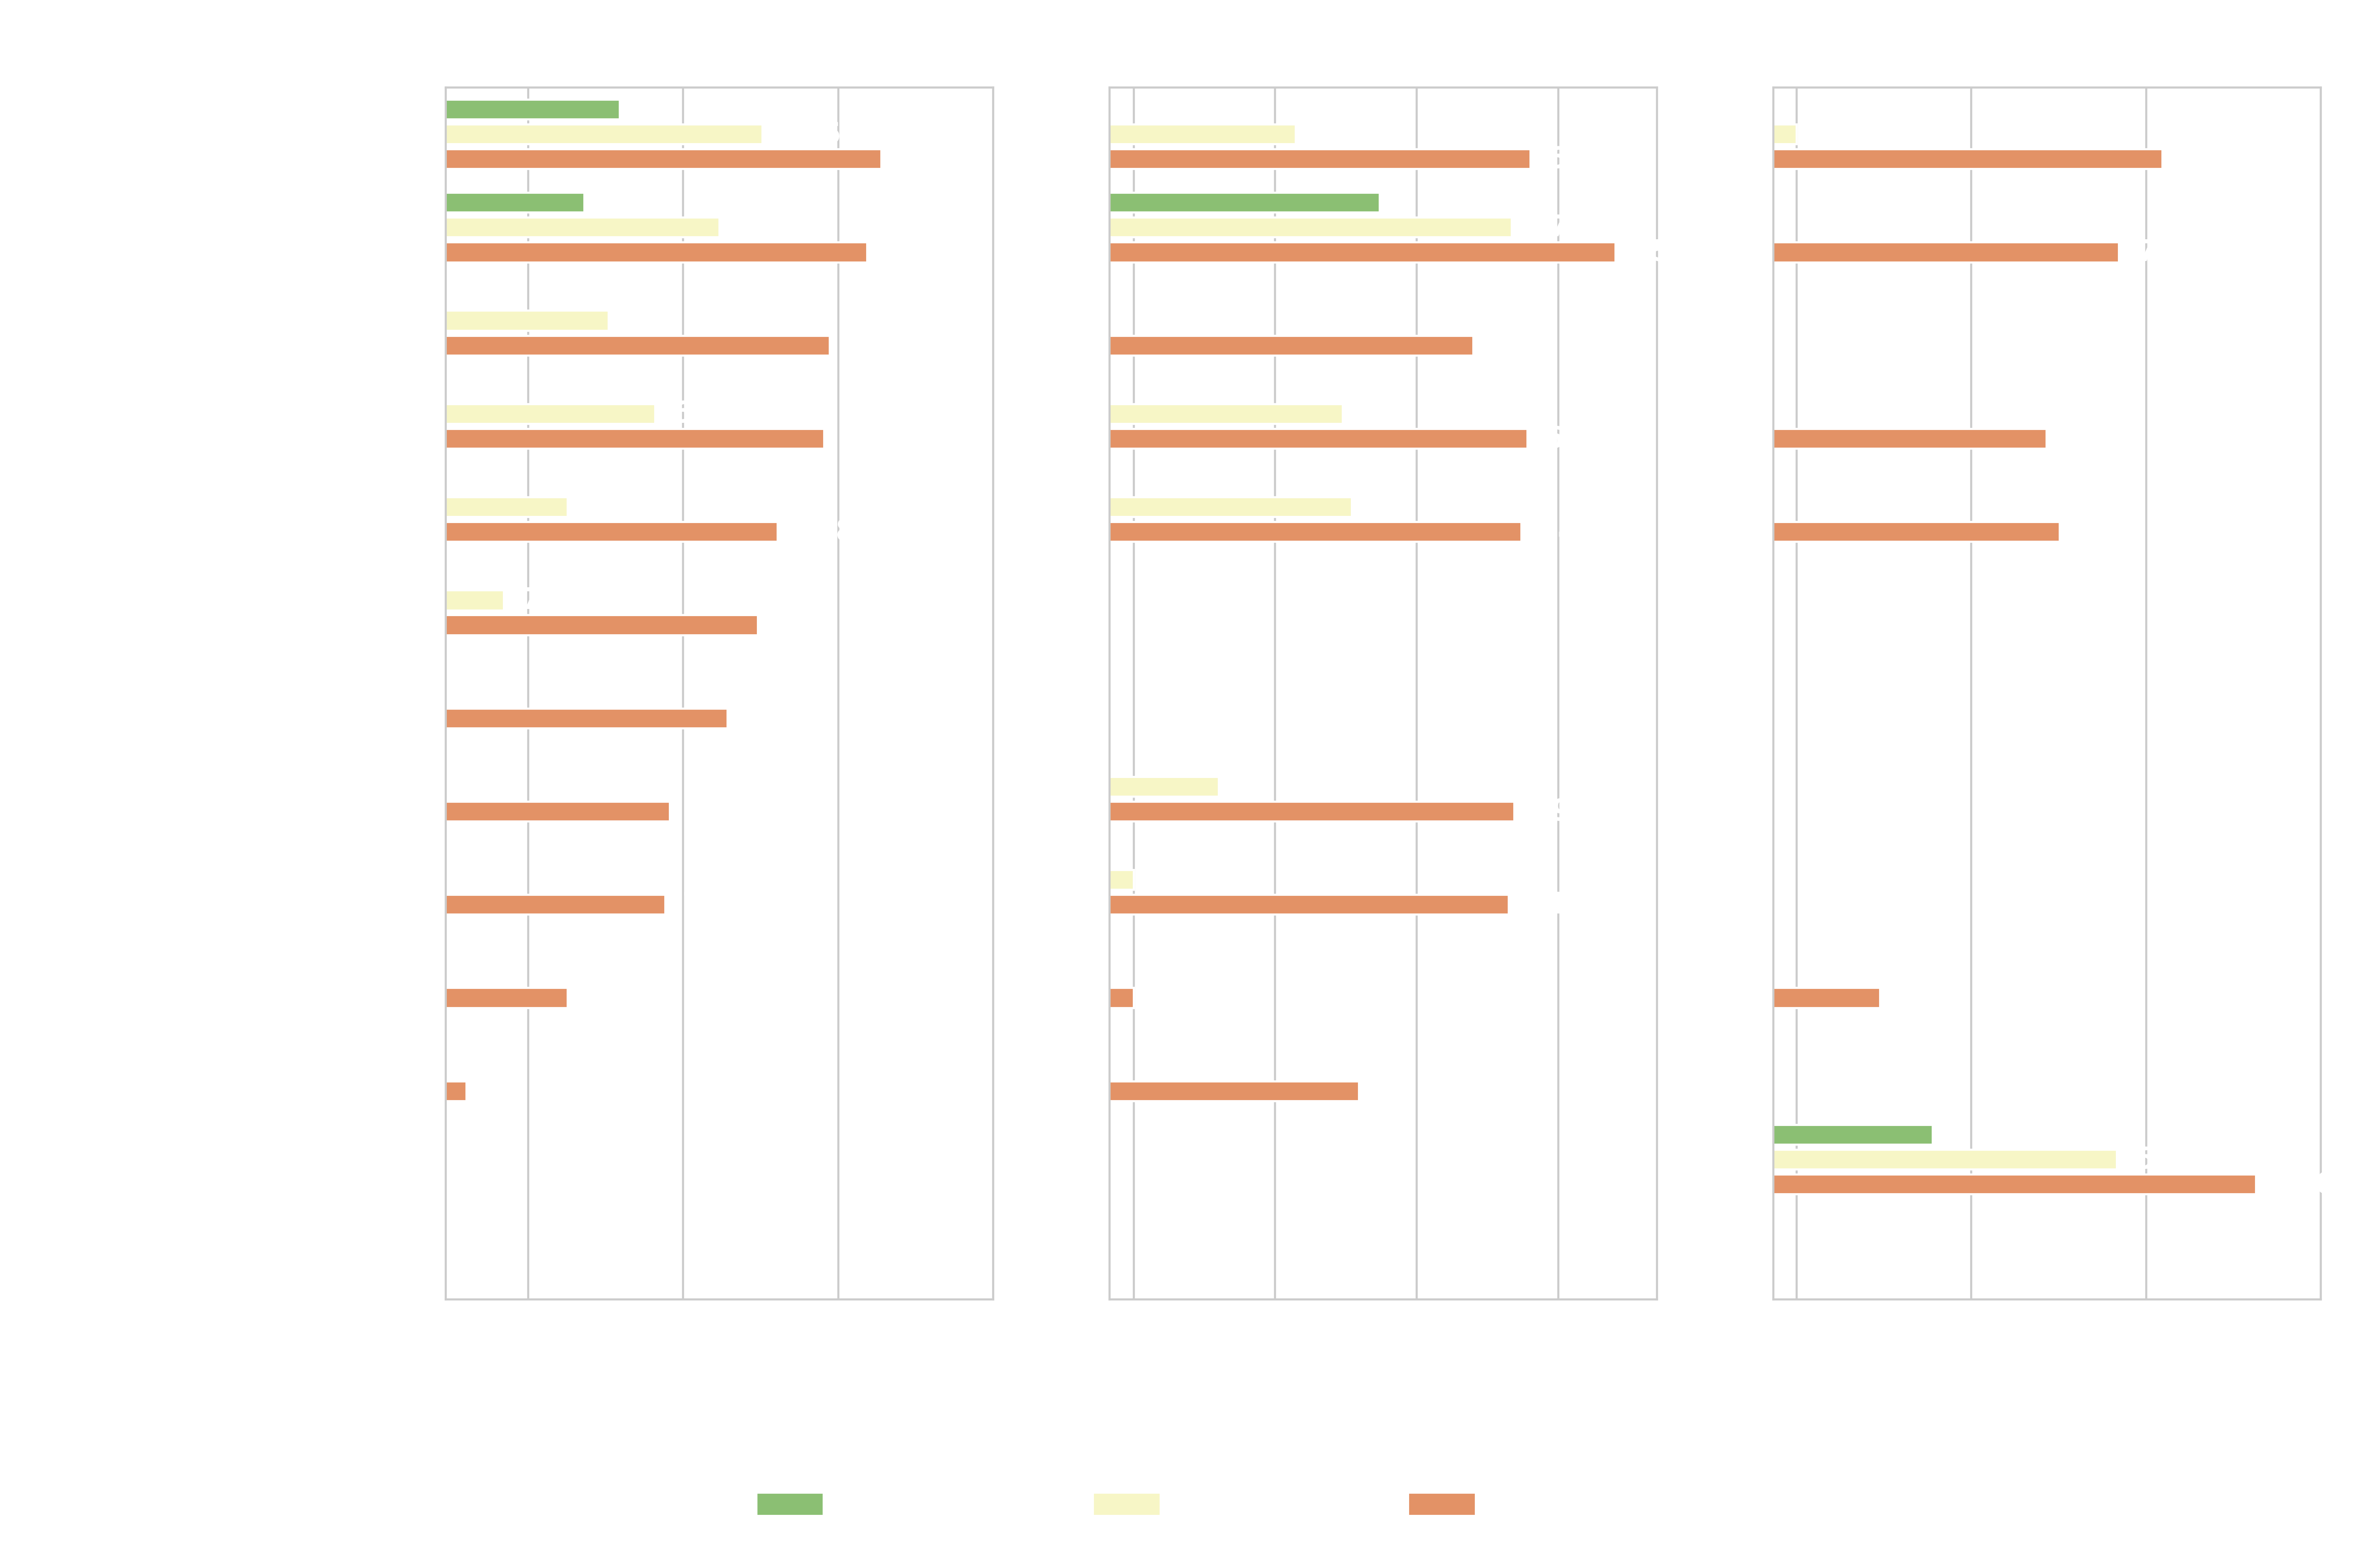

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 5), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_clustering_df, combined_dude_clustering_df, combined_litpcba_clustering_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 5000), (0, 1000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Clustering",
        hue="Percentile",
        data=data,
        order=sorted_dekois_combined_clustering_df["Clustering"].unique(),
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="white",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
                color="white",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold", color="white")  # Make x-axis label bold
    ax.set_ylabel("Pose Selection Method", fontweight="bold", color="white")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10, fontweight="bold", color="white")  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8, colors="white")
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
legend = fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

for text in legend.get_texts():
    text.set_color("white")

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_clustering_methods_counts_dark.png", transparent=True, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


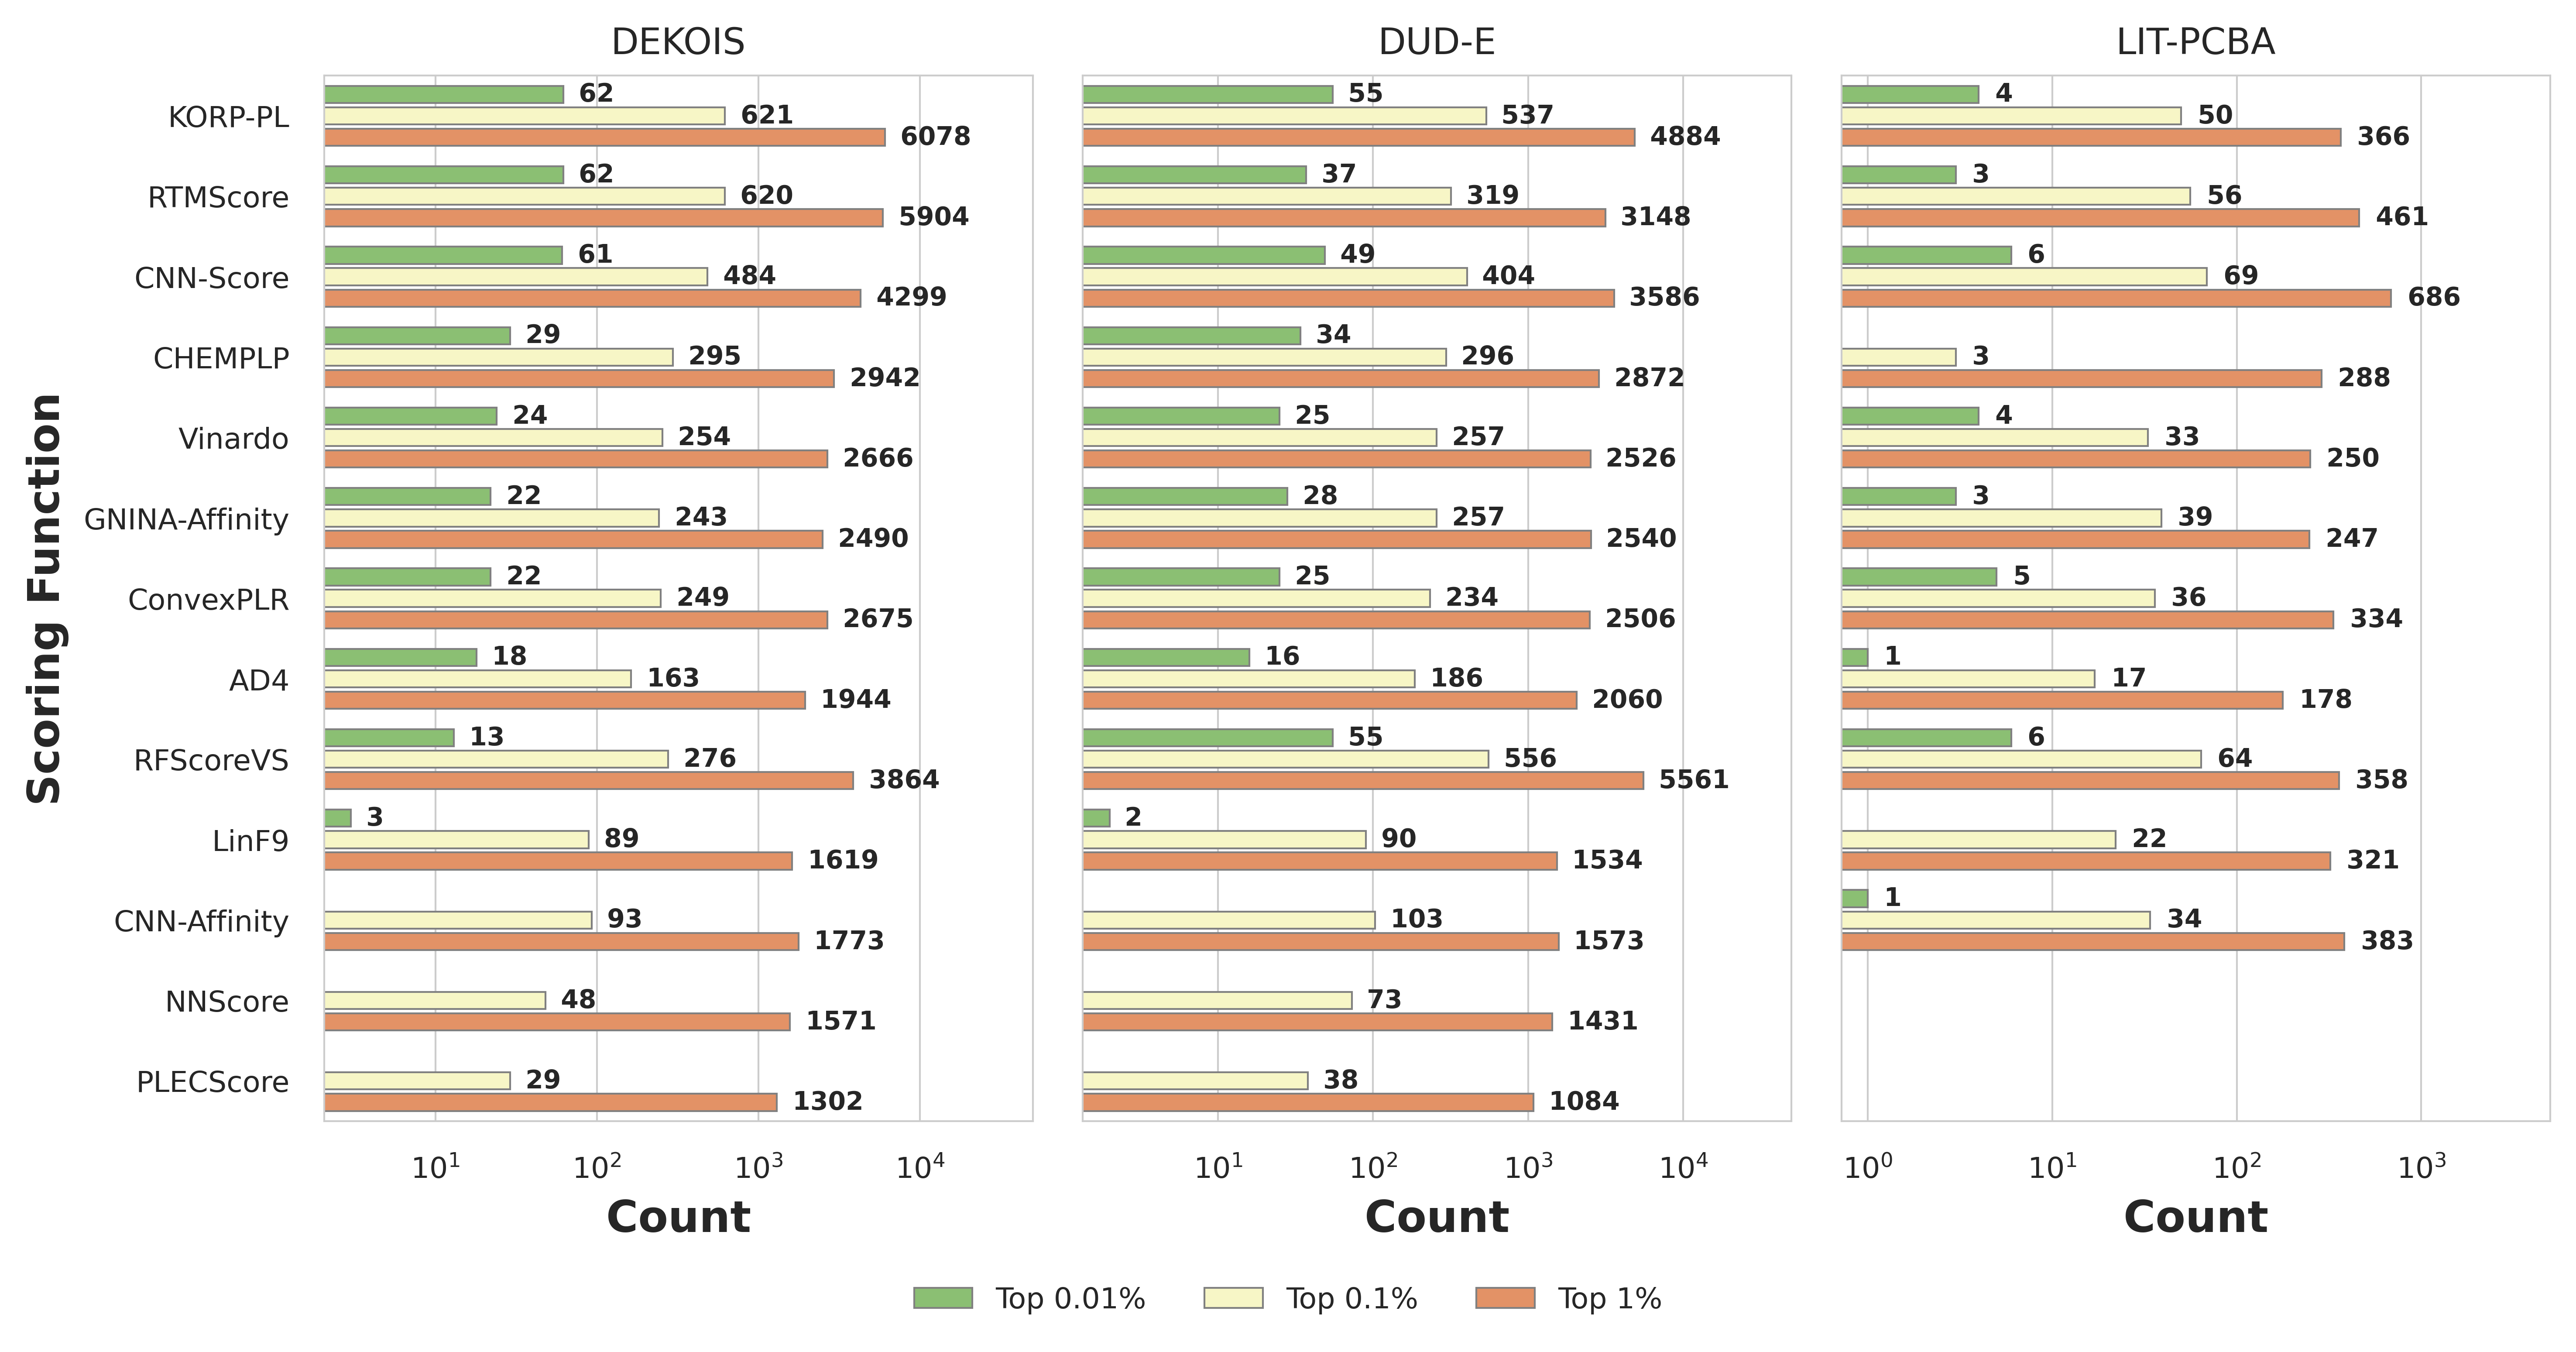

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {"axes.grid": True, "grid.linewidth": 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoring_df, combined_dude_scoring_df, combined_litpcba_scoring_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 50000), (0, 50000), (0, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Scoring Function",
        hue="Percentile",
        data=data,
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="grey",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold")  # Make x-axis label bold
    ax.set_ylabel("Scoring Function", fontweight="bold")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/758417562.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/758417562.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/758417562.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


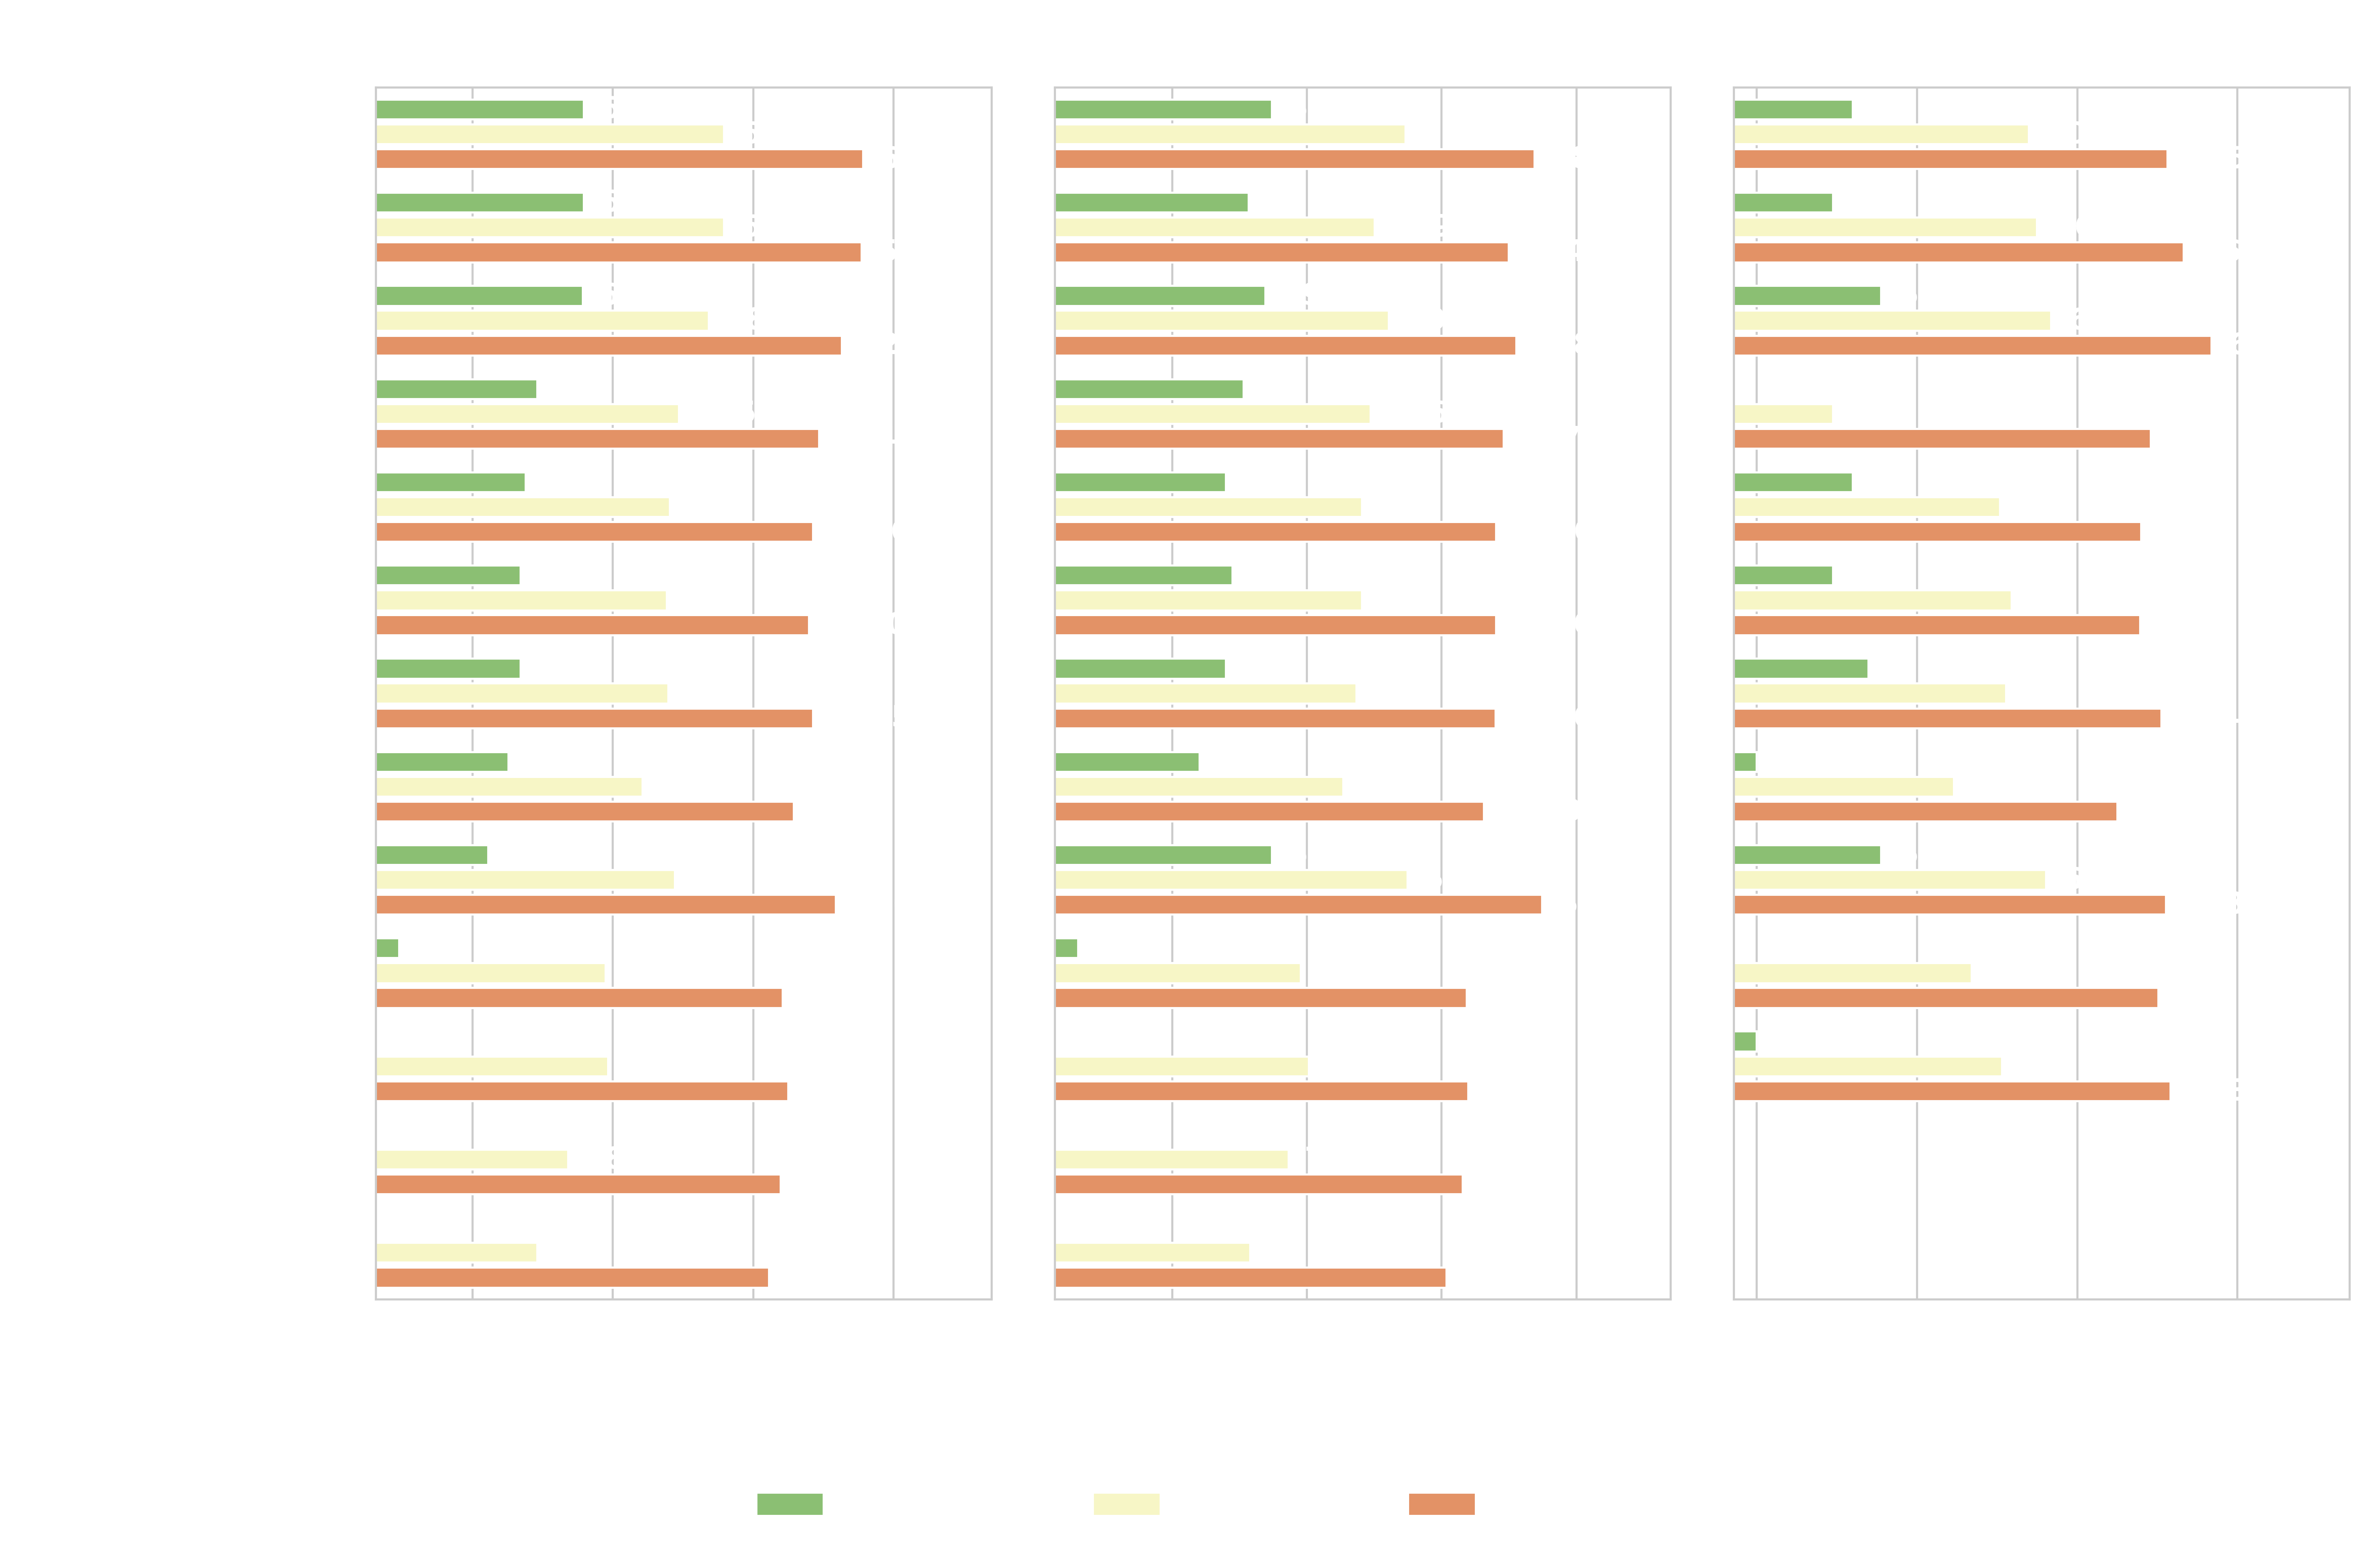

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {"axes.grid": True, "grid.linewidth": 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoring_df, combined_dude_scoring_df, combined_litpcba_scoring_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 50000), (0, 50000), (0, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Scoring Function",
        hue="Percentile",
        data=data,
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="white",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
                color="white",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold", color="white")  # Make x-axis label bold
    ax.set_ylabel("Scoring Function", fontweight="bold", color="white")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10, fontweight="bold", color="white")  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8, colors="white")
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
legend = fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

for text in legend.get_texts():
    text.set_color("white")

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_methods_counts_dark.png", transparent=True, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


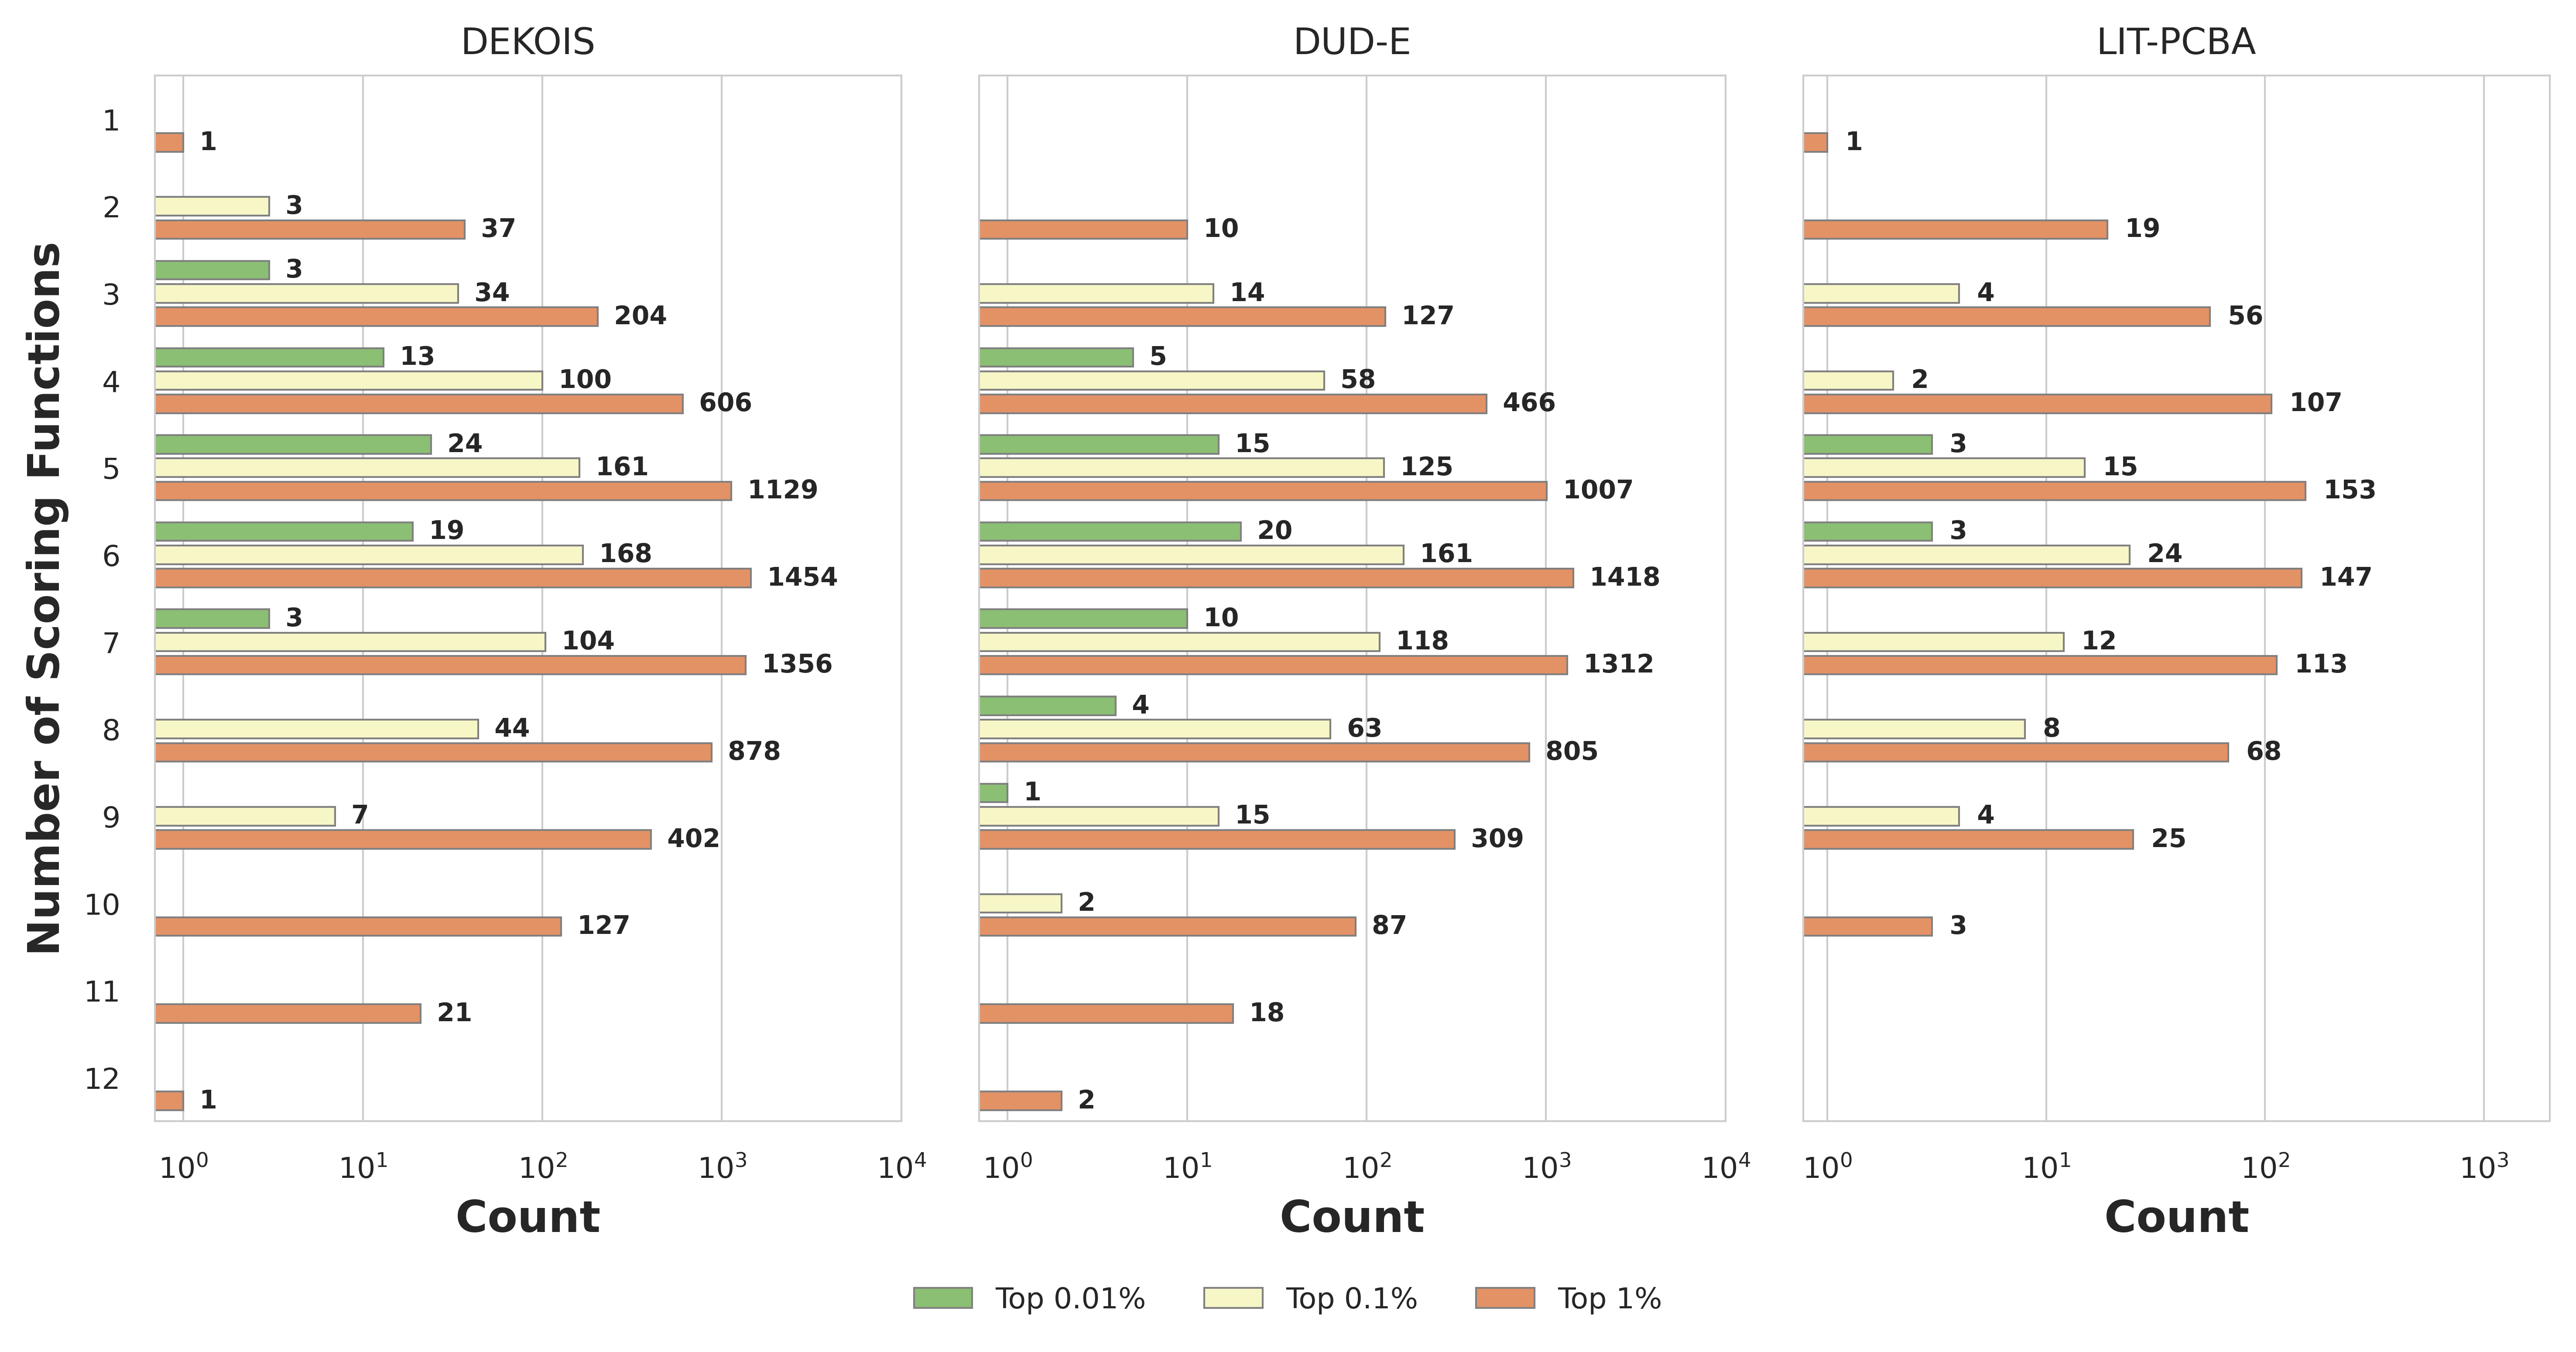

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {"axes.grid": True, "grid.linewidth": 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoringnumber_df, combined_dude_scoringnumber_df, combined_litpcba_scoringnumber_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 10000), (0, 2000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Amount of Scoring Functions",
        hue="Percentile",
        data=data,
        order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"],
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="grey",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold")  # Make x-axis label bold
    ax.set_ylabel("Number of Scoring Functions", fontweight="bold")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()

/tmp/ipykernel_132895/853340929.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/853340929.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_132895/853340929.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


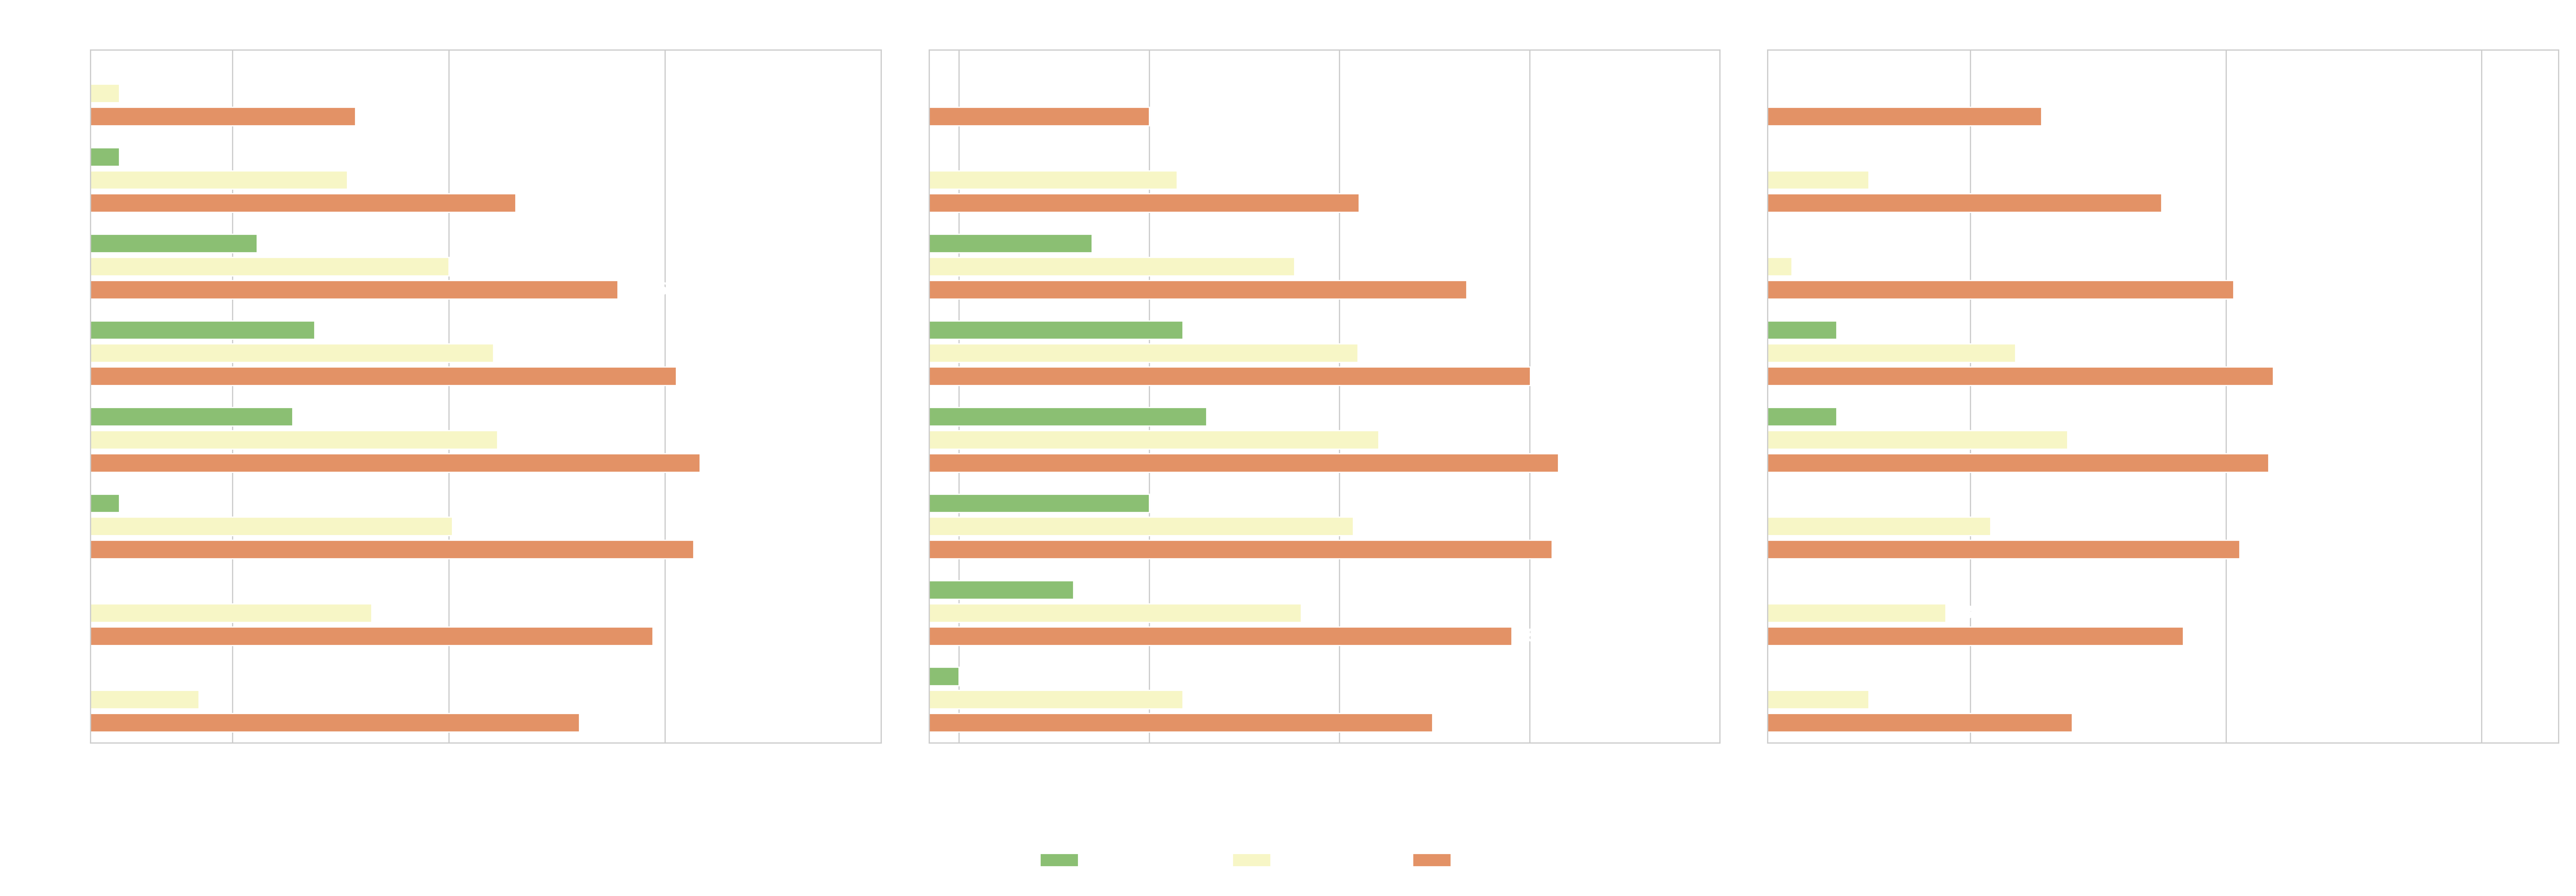

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {"axes.grid": True, "grid.linewidth": 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoringnumber_df, combined_dude_scoringnumber_df, combined_litpcba_scoringnumber_df]
dataset_names = ["DEKOIS", "DUD-E", "LIT-PCBA"]

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 10000), (0, 2000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x="Count",
        y="Amount of Scoring Functions",
        hue="Percentile",
        data=data,
        order=["2", "3", "4", "5", "6", "7", "8", "9"],
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor="white",
        linewidth=0.5,
        ax=axes[i],  # Use the appropriate subplot
    )
    ax.set_xscale("log")

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1 * width,
                p.get_y() + p.get_height() / 2,
                " {:1.0f}".format(width),
                ha="left",
                va="center",
                fontsize=7,
                fontweight="bold",
                color="white",
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel("Count", fontweight="bold", color="white")  # Make x-axis label bold
    ax.set_ylabel("Number of Scoring Functions", fontweight="bold", color="white")  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10, fontweight="bold", color="white")  # Make subplot title bold
    ax.tick_params(axis="both", labelsize=8, colors="white")
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
legend = fig.legend(
    handles,
    labels,
    loc="lower center",  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04),  # Adjust the position (x, y) as needed
)

for text in legend.get_texts():
    text.set_color("white")

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_number_counts_dark.png", transparent=True, bbox_inches="tight")
plt.show()